# Cleaning - Missing Value

In [5]:
import time
import pymysql
import pandas as pd
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

from scipy.stats import pearsonr
import torch.nn as nn

from sklearn.metrics import mean_squared_error
import json

In [49]:
request = '''
{"dateTimeColumn":"created_at","column":[{"name":"co2_data","type":"DOUBLE"},{"name":"temp_data","type":"DOUBLE"},{"name":"humid_data","type":"DOUBLE"},{"name":"pm10_data","type":"DOUBLE"},{"name":"tvoc_data","type":"DOUBLE"}],"data":[{"date":"2022-05-01 00:05:00","value":{"co2_data":390.0,"pm10_data":10.0,"temp_data":null,"tvoc_data":780.0,"humid_data":26.6}},{"date":"2022-05-01 00:15:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":null,"tvoc_data":785.0,"humid_data":26.5}},{"date":"2022-05-01 00:25:00","value":{"co2_data":389.0,"pm10_data":9.0,"temp_data":null,"tvoc_data":805.0,"humid_data":26.5}},{"date":"2022-05-01 00:35:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":27.6,"tvoc_data":808.0,"humid_data":26.4}},{"date":"2022-05-01 00:45:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":27.6,"tvoc_data":793.0,"humid_data":26.4}},{"date":"2022-05-01 00:55:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":27.6,"tvoc_data":804.0,"humid_data":26.4}},{"date":"2022-05-01 01:05:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":27.6,"tvoc_data":777.0,"humid_data":26.4}},{"date":"2022-05-01 01:15:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":27.7,"tvoc_data":794.0,"humid_data":26.4}},{"date":"2022-05-01 01:25:00","value":{"co2_data":403.0,"pm10_data":8.0,"temp_data":27.7,"tvoc_data":759.0,"humid_data":26.4}},{"date":"2022-05-01 01:35:00","value":{"co2_data":403.0,"pm10_data":9.0,"temp_data":27.7,"tvoc_data":772.0,"humid_data":26.4}},{"date":"2022-05-01 01:45:00","value":{"co2_data":401.0,"pm10_data":8.0,"temp_data":27.7,"tvoc_data":738.0,"humid_data":26.4}},{"date":"2022-05-01 01:55:00","value":{"co2_data":402.0,"pm10_data":8.0,"temp_data":27.7,"tvoc_data":729.0,"humid_data":26.3}},{"date":"2022-05-01 02:05:00","value":{"co2_data":398.0,"pm10_data":8.0,"temp_data":27.8,"tvoc_data":701.0,"humid_data":26.3}},{"date":"2022-05-01 02:15:00","value":{"co2_data":394.0,"pm10_data":8.0,"temp_data":27.8,"tvoc_data":692.0,"humid_data":26.2}},{"date":"2022-05-01 02:25:00","value":{"co2_data":395.0,"pm10_data":7.0,"temp_data":27.8,"tvoc_data":640.0,"humid_data":26.1}},{"date":"2022-05-01 02:35:00","value":{"co2_data":394.0,"pm10_data":7.0,"temp_data":27.8,"tvoc_data":651.0,"humid_data":26.0}},{"date":"2022-05-01 02:45:00","value":{"co2_data":387.0,"pm10_data":7.0,"temp_data":27.8,"tvoc_data":630.0,"humid_data":25.9}},{"date":"2022-05-01 02:55:00","value":{"co2_data":383.0,"pm10_data":7.0,"temp_data":27.8,"tvoc_data":575.0,"humid_data":25.7}},{"date":"2022-05-01 03:05:00","value":{"co2_data":389.0,"pm10_data":6.0,"temp_data":27.9,"tvoc_data":546.0,"humid_data":25.5}},{"date":"2022-05-01 03:15:00","value":{"co2_data":387.0,"pm10_data":7.0,"temp_data":27.9,"tvoc_data":526.0,"humid_data":25.3}},{"date":"2022-05-01 03:25:00","value":{"co2_data":391.0,"pm10_data":6.0,"temp_data":27.9,"tvoc_data":508.0,"humid_data":25.0}},{"date":"2022-05-01 03:35:00","value":{"co2_data":385.0,"pm10_data":5.0,"temp_data":28.0,"tvoc_data":484.0,"humid_data":24.8}},{"date":"2022-05-01 03:45:00","value":{"co2_data":390.0,"pm10_data":6.0,"temp_data":28.0,"tvoc_data":450.0,"humid_data":24.6}},{"date":"2022-05-01 03:55:00","value":{"co2_data":393.0,"pm10_data":5.0,"temp_data":28.0,"tvoc_data":436.0,"humid_data":24.3}},{"date":"2022-05-01 05:05:00","value":{"co2_data":388.0,"pm10_data":4.0,"temp_data":28.1,"tvoc_data":247.0,"humid_data":22.1}},{"date":"2022-05-01 05:15:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":28.0,"tvoc_data":232.0,"humid_data":21.9}},{"date":"2022-05-01 05:25:00","value":{"co2_data":385.0,"pm10_data":4.0,"temp_data":28.0,"tvoc_data":228.0,"humid_data":21.7}},{"date":"2022-05-01 05:35:00","value":{"co2_data":379.0,"pm10_data":4.0,"temp_data":28.0,"tvoc_data":217.0,"humid_data":21.5}},{"date":"2022-05-01 05:45:00","value":{"co2_data":386.0,"pm10_data":5.0,"temp_data":28.0,"tvoc_data":190.0,"humid_data":21.0}},{"date":"2022-05-01 05:55:00","value":{"co2_data":383.0,"pm10_data":4.0,"temp_data":28.0,"tvoc_data":179.0,"humid_data":20.7}},{"date":"2022-05-01 06:05:00","value":{"co2_data":389.0,"pm10_data":4.0,"temp_data":28.0,"tvoc_data":170.0,"humid_data":20.5}},{"date":"2022-05-01 06:15:00","value":{"co2_data":384.0,"pm10_data":3.0,"temp_data":28.0,"tvoc_data":152.0,"humid_data":19.9}},{"date":"2022-05-01 06:25:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":28.0,"tvoc_data":139.0,"humid_data":19.8}},{"date":"2022-05-01 06:35:00","value":{"co2_data":381.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":139.0,"humid_data":19.4}},{"date":"2022-05-01 06:45:00","value":{"co2_data":382.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":127.0,"humid_data":19.1}},{"date":"2022-05-01 06:55:00","value":{"co2_data":382.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":107.0,"humid_data":18.8}},{"date":"2022-05-01 07:05:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":28.0,"tvoc_data":101.0,"humid_data":18.5}},{"date":"2022-05-01 07:15:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":95.0,"humid_data":18.2}},{"date":"2022-05-01 07:25:00","value":{"co2_data":388.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":85.0,"humid_data":18.1}},{"date":"2022-05-01 07:35:00","value":{"co2_data":383.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":79.0,"humid_data":17.7}},{"date":"2022-05-01 07:45:00","value":{"co2_data":390.0,"pm10_data":3.0,"temp_data":27.8,"tvoc_data":80.0,"humid_data":17.7}},{"date":"2022-05-01 07:55:00","value":{"co2_data":384.0,"pm10_data":3.0,"temp_data":27.9,"tvoc_data":72.0,"humid_data":17.5}},{"date":"2022-05-01 08:05:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":27.8,"tvoc_data":68.0,"humid_data":17.2}},{"date":"2022-05-01 08:15:00","value":{"co2_data":382.0,"pm10_data":3.0,"temp_data":27.8,"tvoc_data":67.0,"humid_data":17.2}},{"date":"2022-05-01 08:25:00","value":{"co2_data":390.0,"pm10_data":3.0,"temp_data":27.8,"tvoc_data":67.0,"humid_data":17.2}},{"date":"2022-05-01 08:35:00","value":{"co2_data":393.0,"pm10_data":3.0,"temp_data":27.8,"tvoc_data":75.0,"humid_data":17.2}},{"date":"2022-05-01 08:45:00","value":{"co2_data":387.0,"pm10_data":3.0,"temp_data":27.7,"tvoc_data":78.0,"humid_data":17.2}},{"date":"2022-05-01 08:55:00","value":{"co2_data":385.0,"pm10_data":3.0,"temp_data":27.7,"tvoc_data":85.0,"humid_data":17.1}},{"date":"2022-05-01 09:05:00","value":{"co2_data":385.0,"pm10_data":4.0,"temp_data":27.7,"tvoc_data":82.0,"humid_data":17.1}},{"date":"2022-05-01 09:15:00","value":{"co2_data":384.0,"pm10_data":4.0,"temp_data":27.7,"tvoc_data":81.0,"humid_data":17.0}},{"date":"2022-05-01 09:25:00","value":{"co2_data":394.0,"pm10_data":3.0,"temp_data":27.7,"tvoc_data":77.0,"humid_data":17.0}},{"date":"2022-05-01 09:35:00","value":{"co2_data":394.0,"pm10_data":3.0,"temp_data":27.7,"tvoc_data":88.0,"humid_data":17.0}},{"date":"2022-05-01 09:45:00","value":{"co2_data":395.0,"pm10_data":4.0,"temp_data":27.7,"tvoc_data":86.0,"humid_data":17.0}},{"date":"2022-05-01 09:55:00","value":{"co2_data":388.0,"pm10_data":4.0,"temp_data":27.7,"tvoc_data":89.0,"humid_data":17.0}},{"date":"2022-05-01 10:05:00","value":{"co2_data":384.0,"pm10_data":4.0,"temp_data":27.6,"tvoc_data":93.0,"humid_data":17.0}},{"date":"2022-05-01 10:15:00","value":{"co2_data":390.0,"pm10_data":3.0,"temp_data":27.7,"tvoc_data":95.0,"humid_data":17.1}},{"date":"2022-05-01 11:05:00","value":{"co2_data":386.0,"pm10_data":4.0,"temp_data":27.7,"tvoc_data":112.0,"humid_data":17.2}},{"date":"2022-05-01 11:15:00","value":{"co2_data":383.0,"pm10_data":4.0,"temp_data":27.6,"tvoc_data":112.0,"humid_data":17.2}},{"date":"2022-05-01 11:35:00","value":{"co2_data":391.0,"pm10_data":5.0,"temp_data":27.6,"tvoc_data":111.0,"humid_data":17.3}},{"date":"2022-05-01 11:45:00","value":{"co2_data":387.0,"pm10_data":5.0,"temp_data":27.6,"tvoc_data":102.0,"humid_data":17.4}},{"date":"2022-05-01 11:55:00","value":{"co2_data":387.0,"pm10_data":4.0,"temp_data":27.5,"tvoc_data":106.0,"humid_data":17.5}},{"date":"2022-05-01 12:05:00","value":{"co2_data":383.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":116.0,"humid_data":17.5}},{"date":"2022-05-01 12:15:00","value":{"co2_data":385.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":107.0,"humid_data":17.7}},{"date":"2022-05-01 12:25:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":27.5,"tvoc_data":104.0,"humid_data":17.9}},{"date":"2022-05-01 12:35:00","value":{"co2_data":390.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":106.0,"humid_data":17.9}},{"date":"2022-05-01 12:45:00","value":{"co2_data":388.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":108.0,"humid_data":18.1}},{"date":"2022-05-01 12:55:00","value":{"co2_data":392.0,"pm10_data":6.0,"temp_data":27.6,"tvoc_data":118.0,"humid_data":18.1}},{"date":"2022-05-01 13:05:00","value":{"co2_data":383.0,"pm10_data":5.0,"temp_data":27.6,"tvoc_data":128.0,"humid_data":18.2}},{"date":"2022-05-01 13:15:00","value":{"co2_data":383.0,"pm10_data":4.0,"temp_data":27.5,"tvoc_data":129.0,"humid_data":18.3}},{"date":"2022-05-01 13:25:00","value":{"co2_data":385.0,"pm10_data":6.0,"temp_data":27.5,"tvoc_data":138.0,"humid_data":18.4}},{"date":"2022-05-01 13:35:00","value":{"co2_data":389.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":146.0,"humid_data":18.6}},{"date":"2022-05-01 13:45:00","value":{"co2_data":388.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":148.0,"humid_data":18.6}},{"date":"2022-05-01 13:55:00","value":{"co2_data":389.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":153.0,"humid_data":18.6}},{"date":"2022-05-01 14:05:00","value":{"co2_data":380.0,"pm10_data":5.0,"temp_data":27.4,"tvoc_data":169.0,"humid_data":18.8}},{"date":"2022-05-01 14:15:00","value":{"co2_data":385.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":173.0,"humid_data":18.8}},{"date":"2022-05-01 14:25:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":27.5,"tvoc_data":176.0,"humid_data":18.9}},{"date":"2022-05-01 14:35:00","value":{"co2_data":384.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":188.0,"humid_data":19.0}},{"date":"2022-05-01 14:45:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":27.6,"tvoc_data":194.0,"humid_data":19.0}},{"date":"2022-05-01 14:55:00","value":{"co2_data":388.0,"pm10_data":6.0,"temp_data":27.6,"tvoc_data":212.0,"humid_data":19.2}},{"date":"2022-05-01 15:05:00","value":{"co2_data":387.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":217.0,"humid_data":19.2}},{"date":"2022-05-01 15:15:00","value":{"co2_data":388.0,"pm10_data":5.0,"temp_data":27.5,"tvoc_data":208.0,"humid_data":19.3}},{"date":"2022-05-01 15:25:00","value":{"co2_data":384.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":220.0,"humid_data":19.4}},{"date":"2022-05-01 15:35:00","value":{"co2_data":383.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":225.0,"humid_data":19.6}},{"date":"2022-05-01 15:45:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":232.0,"humid_data":19.7}},{"date":"2022-05-01 15:55:00","value":{"co2_data":388.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":234.0,"humid_data":19.7}},{"date":"2022-05-01 16:05:00","value":{"co2_data":394.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":243.0,"humid_data":19.8}},{"date":"2022-05-01 16:15:00","value":{"co2_data":387.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":243.0,"humid_data":20.0}},{"date":"2022-05-01 16:25:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":269.0,"humid_data":20.1}},{"date":"2022-05-01 16:35:00","value":{"co2_data":390.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":258.0,"humid_data":20.1}},{"date":"2022-05-01 17:05:00","value":{"co2_data":394.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":307.0,"humid_data":20.2}},{"date":"2022-05-01 17:26:00","value":{"co2_data":391.0,"pm10_data":7.0,"temp_data":27.5,"tvoc_data":312.0,"humid_data":20.4}},{"date":"2022-05-01 17:36:00","value":{"co2_data":392.0,"pm10_data":7.0,"temp_data":27.5,"tvoc_data":324.0,"humid_data":20.5}},{"date":"2022-05-01 17:46:00","value":{"co2_data":383.0,"pm10_data":6.0,"temp_data":27.5,"tvoc_data":333.0,"humid_data":20.6}},{"date":"2022-05-01 17:56:00","value":{"co2_data":386.0,"pm10_data":7.0,"temp_data":27.5,"tvoc_data":337.0,"humid_data":20.7}},{"date":"2022-05-01 18:06:00","value":{"co2_data":384.0,"pm10_data":7.0,"temp_data":27.5,"tvoc_data":340.0,"humid_data":20.7}},{"date":"2022-05-01 18:16:00","value":{"co2_data":394.0,"pm10_data":7.0,"temp_data":27.4,"tvoc_data":345.0,"humid_data":20.8}},{"date":"2022-05-01 18:26:00","value":{"co2_data":393.0,"pm10_data":6.0,"temp_data":27.4,"tvoc_data":362.0,"humid_data":20.9}},{"date":"2022-05-01 18:36:00","value":{"co2_data":385.0,"pm10_data":7.0,"temp_data":27.4,"tvoc_data":384.0,"humid_data":21.1}},{"date":"2022-05-01 18:46:00","value":{"co2_data":393.0,"pm10_data":7.0,"temp_data":27.4,"tvoc_data":394.0,"humid_data":21.1}},{"date":"2022-05-01 18:56:00","value":{"co2_data":398.0,"pm10_data":7.0,"temp_data":27.4,"tvoc_data":383.0,"humid_data":21.2}},{"date":"2022-05-01 19:06:00","value":{"co2_data":390.0,"pm10_data":7.0,"temp_data":27.3,"tvoc_data":409.0,"humid_data":21.4}},{"date":"2022-05-01 19:16:00","value":{"co2_data":391.0,"pm10_data":7.0,"temp_data":27.3,"tvoc_data":390.0,"humid_data":21.5}},{"date":"2022-05-01 19:26:00","value":{"co2_data":391.0,"pm10_data":7.0,"temp_data":27.3,"tvoc_data":405.0,"humid_data":21.5}},{"date":"2022-05-01 19:36:00","value":{"co2_data":400.0,"pm10_data":8.0,"temp_data":27.3,"tvoc_data":412.0,"humid_data":21.6}},{"date":"2022-05-01 19:46:00","value":{"co2_data":385.0,"pm10_data":7.0,"temp_data":27.3,"tvoc_data":400.0,"humid_data":21.7}},{"date":"2022-05-01 19:56:00","value":{"co2_data":386.0,"pm10_data":7.0,"temp_data":27.3,"tvoc_data":427.0,"humid_data":21.9}},{"date":"2022-05-01 20:06:00","value":{"co2_data":391.0,"pm10_data":8.0,"temp_data":27.3,"tvoc_data":428.0,"humid_data":21.8}},{"date":"2022-05-01 20:16:00","value":{"co2_data":389.0,"pm10_data":8.0,"temp_data":27.3,"tvoc_data":436.0,"humid_data":22.0}},{"date":"2022-05-01 20:26:00","value":{"co2_data":398.0,"pm10_data":8.0,"temp_data":27.2,"tvoc_data":461.0,"humid_data":22.1}},{"date":"2022-05-01 20:36:00","value":{"co2_data":398.0,"pm10_data":8.0,"temp_data":27.2,"tvoc_data":438.0,"humid_data":22.1}},{"date":"2022-05-01 20:46:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":456.0,"humid_data":22.3}},{"date":"2022-05-01 20:56:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":472.0,"humid_data":22.3}},{"date":"2022-05-01 21:06:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":27.2,"tvoc_data":457.0,"humid_data":22.5}},{"date":"2022-05-01 21:16:00","value":{"co2_data":387.0,"pm10_data":8.0,"temp_data":27.2,"tvoc_data":481.0,"humid_data":22.4}},{"date":"2022-05-01 21:26:00","value":{"co2_data":395.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":473.0,"humid_data":22.6}},{"date":"2022-05-01 21:36:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":485.0,"humid_data":22.6}},{"date":"2022-05-01 21:46:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":494.0,"humid_data":22.6}},{"date":"2022-05-01 21:56:00","value":{"co2_data":392.0,"pm10_data":9.0,"temp_data":27.3,"tvoc_data":501.0,"humid_data":22.6}},{"date":"2022-05-01 22:06:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":27.3,"tvoc_data":508.0,"humid_data":22.6}},{"date":"2022-05-01 22:16:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":27.3,"tvoc_data":504.0,"humid_data":22.7}},{"date":"2022-05-01 22:26:00","value":{"co2_data":395.0,"pm10_data":9.0,"temp_data":27.4,"tvoc_data":511.0,"humid_data":22.7}},{"date":"2022-05-01 22:36:00","value":{"co2_data":392.0,"pm10_data":9.0,"temp_data":27.4,"tvoc_data":509.0,"humid_data":22.7}},{"date":"2022-05-01 22:46:00","value":{"co2_data":388.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":522.0,"humid_data":22.8}},{"date":"2022-05-01 23:36:00","value":{"co2_data":429.0,"pm10_data":26.0,"temp_data":26.1,"tvoc_data":332.0,"humid_data":28.4}},{"date":"2022-05-01 23:46:00","value":{"co2_data":452.0,"pm10_data":21.0,"temp_data":26.4,"tvoc_data":517.0,"humid_data":27.8}},{"date":"2022-05-01 23:56:00","value":{"co2_data":453.0,"pm10_data":23.0,"temp_data":26.5,"tvoc_data":521.0,"humid_data":27.6}},{"date":"2022-05-02 00:06:00","value":{"co2_data":447.0,"pm10_data":20.0,"temp_data":26.6,"tvoc_data":514.0,"humid_data":27.6}},{"date":"2022-05-02 00:16:00","value":{"co2_data":447.0,"pm10_data":19.0,"temp_data":26.6,"tvoc_data":506.0,"humid_data":27.4}},{"date":"2022-05-02 00:26:00","value":{"co2_data":448.0,"pm10_data":19.0,"temp_data":26.7,"tvoc_data":545.0,"humid_data":27.4}},{"date":"2022-05-02 00:36:00","value":{"co2_data":445.0,"pm10_data":20.0,"temp_data":26.7,"tvoc_data":563.0,"humid_data":27.3}},{"date":"2022-05-02 00:46:00","value":{"co2_data":440.0,"pm10_data":18.0,"temp_data":26.6,"tvoc_data":489.0,"humid_data":27.3}},{"date":"2022-05-02 00:56:00","value":{"co2_data":447.0,"pm10_data":18.0,"temp_data":26.7,"tvoc_data":515.0,"humid_data":27.0}},{"date":"2022-05-02 01:06:00","value":{"co2_data":454.0,"pm10_data":16.0,"temp_data":26.8,"tvoc_data":642.0,"humid_data":26.8}},{"date":"2022-05-02 01:16:00","value":{"co2_data":474.0,"pm10_data":15.0,"temp_data":26.9,"tvoc_data":597.0,"humid_data":26.6}},{"date":"2022-05-02 01:26:00","value":{"co2_data":476.0,"pm10_data":17.0,"temp_data":27.0,"tvoc_data":570.0,"humid_data":26.3}},{"date":"2022-05-02 01:36:00","value":{"co2_data":460.0,"pm10_data":15.0,"temp_data":27.0,"tvoc_data":508.0,"humid_data":26.0}},{"date":"2022-05-02 01:46:00","value":{"co2_data":null,"pm10_data":13.0,"temp_data":27.0,"tvoc_data":449.0,"humid_data":25.7}},{"date":"2022-05-02 01:56:00","value":{"co2_data":438.0,"pm10_data":15.0,"temp_data":27.0,"tvoc_data":455.0,"humid_data":25.7}},{"date":"2022-05-02 02:06:00","value":{"co2_data":441.0,"pm10_data":14.0,"temp_data":27.0,"tvoc_data":445.0,"humid_data":25.2}},{"date":"2022-05-02 02:16:00","value":{"co2_data":448.0,"pm10_data":13.0,"temp_data":27.1,"tvoc_data":461.0,"humid_data":24.9}},{"date":"2022-05-02 02:26:00","value":{"co2_data":451.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":409.0,"humid_data":24.4}},{"date":"2022-05-02 02:36:00","value":{"co2_data":447.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":381.0,"humid_data":null}},{"date":"2022-05-02 02:46:00","value":{"co2_data":443.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":324.0,"humid_data":23.7}},{"date":"2022-05-02 02:56:00","value":{"co2_data":437.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":351.0,"humid_data":23.3}},{"date":"2022-05-02 03:06:00","value":{"co2_data":448.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":354.0,"humid_data":23.0}},{"date":"2022-05-02 03:16:00","value":{"co2_data":447.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":450.0,"humid_data":22.8}},{"date":"2022-05-02 03:26:00","value":{"co2_data":472.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":561.0,"humid_data":23.2}},{"date":"2022-05-02 03:36:00","value":{"co2_data":484.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":583.0,"humid_data":23.3}},{"date":"2022-05-02 03:46:00","value":{"co2_data":496.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":701.0,"humid_data":23.6}},{"date":"2022-05-02 03:56:00","value":{"co2_data":502.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":758.0,"humid_data":23.8}},{"date":"2022-05-02 04:06:00","value":{"co2_data":499.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":777.0,"humid_data":23.5}},{"date":"2022-05-02 04:16:00","value":{"co2_data":484.0,"pm10_data":10.0,"temp_data":27.3,"tvoc_data":650.0,"humid_data":22.9}},{"date":"2022-05-02 04:26:00","value":{"co2_data":475.0,"pm10_data":9.0,"temp_data":27.3,"tvoc_data":455.0,"humid_data":22.0}},{"date":"2022-05-02 04:36:00","value":{"co2_data":447.0,"pm10_data":9.0,"temp_data":27.2,"tvoc_data":296.0,"humid_data":21.3}},{"date":"2022-05-02 04:46:00","value":{"co2_data":443.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":276.0,"humid_data":20.9}},{"date":"2022-05-02 04:56:00","value":{"co2_data":440.0,"pm10_data":8.0,"temp_data":27.4,"tvoc_data":230.0,"humid_data":20.9}},{"date":"2022-05-02 05:56:00","value":{"co2_data":415.0,"pm10_data":8.0,"temp_data":27.4,"tvoc_data":152.0,"humid_data":18.4}},{"date":"2022-05-02 06:06:00","value":{"co2_data":411.0,"pm10_data":8.0,"temp_data":27.4,"tvoc_data":137.0,"humid_data":18.3}},{"date":"2022-05-02 06:16:00","value":{"co2_data":411.0,"pm10_data":8.0,"temp_data":27.4,"tvoc_data":128.0,"humid_data":18.5}},{"date":"2022-05-02 06:26:00","value":{"co2_data":415.0,"pm10_data":9.0,"temp_data":27.4,"tvoc_data":128.0,"humid_data":18.9}},{"date":"2022-05-02 06:36:00","value":{"co2_data":417.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":110.0,"humid_data":19.5}},{"date":"2022-05-02 06:46:00","value":{"co2_data":436.0,"pm10_data":9.0,"temp_data":27.4,"tvoc_data":133.0,"humid_data":19.7}},{"date":"2022-05-02 06:56:00","value":{"co2_data":428.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":151.0,"humid_data":19.9}},{"date":"2022-05-02 07:06:00","value":{"co2_data":429.0,"pm10_data":11.0,"temp_data":27.4,"tvoc_data":148.0,"humid_data":20.0}},{"date":"2022-05-02 07:16:00","value":{"co2_data":426.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":139.0,"humid_data":19.9}},{"date":"2022-05-02 07:26:00","value":{"co2_data":428.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":144.0,"humid_data":19.9}},{"date":"2022-05-02 07:36:00","value":{"co2_data":430.0,"pm10_data":10.0,"temp_data":27.3,"tvoc_data":138.0,"humid_data":19.8}},{"date":"2022-05-02 07:46:00","value":{"co2_data":428.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":144.0,"humid_data":20.0}},{"date":"2022-05-02 07:56:00","value":{"co2_data":424.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":121.0,"humid_data":19.7}},{"date":"2022-05-02 08:06:00","value":{"co2_data":424.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":131.0,"humid_data":19.9}},{"date":"2022-05-02 08:16:00","value":{"co2_data":427.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":138.0,"humid_data":19.9}},{"date":"2022-05-02 08:26:00","value":{"co2_data":433.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":135.0,"humid_data":20.0}},{"date":"2022-05-02 08:36:00","value":{"co2_data":447.0,"pm10_data":11.0,"temp_data":27.7,"tvoc_data":137.0,"humid_data":19.7}},{"date":"2022-05-02 08:46:00","value":{"co2_data":453.0,"pm10_data":9.0,"temp_data":27.8,"tvoc_data":156.0,"humid_data":19.7}},{"date":"2022-05-02 08:56:00","value":{"co2_data":444.0,"pm10_data":9.0,"temp_data":27.9,"tvoc_data":175.0,"humid_data":19.6}},{"date":"2022-05-02 09:06:00","value":{"co2_data":441.0,"pm10_data":9.0,"temp_data":27.9,"tvoc_data":185.0,"humid_data":19.7}},{"date":"2022-05-02 09:16:00","value":{"co2_data":440.0,"pm10_data":10.0,"temp_data":27.9,"tvoc_data":188.0,"humid_data":19.7}},{"date":"2022-05-02 09:26:00","value":{"co2_data":441.0,"pm10_data":9.0,"temp_data":27.8,"tvoc_data":203.0,"humid_data":19.7}},{"date":"2022-05-02 09:36:00","value":{"co2_data":444.0,"pm10_data":10.0,"temp_data":27.8,"tvoc_data":207.0,"humid_data":19.8}},{"date":"2022-05-02 09:46:00","value":{"co2_data":432.0,"pm10_data":10.0,"temp_data":27.8,"tvoc_data":222.0,"humid_data":19.8}},{"date":"2022-05-02 09:56:00","value":{"co2_data":428.0,"pm10_data":9.0,"temp_data":27.8,"tvoc_data":237.0,"humid_data":19.9}},{"date":"2022-05-02 10:06:00","value":{"co2_data":430.0,"pm10_data":9.0,"temp_data":27.8,"tvoc_data":238.0,"humid_data":19.9}},{"date":"2022-05-02 10:16:00","value":{"co2_data":430.0,"pm10_data":10.0,"temp_data":27.8,"tvoc_data":244.0,"humid_data":19.9}},{"date":"2022-05-02 10:26:00","value":{"co2_data":436.0,"pm10_data":9.0,"temp_data":27.8,"tvoc_data":251.0,"humid_data":19.9}},{"date":"2022-05-02 10:36:00","value":{"co2_data":429.0,"pm10_data":9.0,"temp_data":27.7,"tvoc_data":246.0,"humid_data":20.0}},{"date":"2022-05-02 10:46:00","value":{"co2_data":420.0,"pm10_data":10.0,"temp_data":27.7,"tvoc_data":250.0,"humid_data":20.0}},{"date":"2022-05-02 10:56:00","value":{"co2_data":423.0,"pm10_data":9.0,"temp_data":27.6,"tvoc_data":243.0,"humid_data":20.0}},{"date":"2022-05-02 11:56:00","value":{"co2_data":406.0,"pm10_data":10.0,"temp_data":27.5,"tvoc_data":221.0,"humid_data":20.3}},{"date":"2022-05-02 12:06:00","value":{"co2_data":407.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":221.0,"humid_data":20.3}},{"date":"2022-05-02 12:16:00","value":{"co2_data":405.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":222.0,"humid_data":20.3}},{"date":"2022-05-02 12:26:00","value":{"co2_data":410.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":223.0,"humid_data":20.4}},{"date":"2022-05-02 12:36:00","value":{"co2_data":407.0,"pm10_data":11.0,"temp_data":27.4,"tvoc_data":227.0,"humid_data":20.5}},{"date":"2022-05-02 12:46:00","value":{"co2_data":400.0,"pm10_data":10.0,"temp_data":27.4,"tvoc_data":234.0,"humid_data":20.5}},{"date":"2022-05-02 12:56:00","value":{"co2_data":410.0,"pm10_data":9.0,"temp_data":27.4,"tvoc_data":238.0,"humid_data":20.6}},{"date":"2022-05-02 13:06:00","value":{"co2_data":408.0,"pm10_data":10.0,"temp_data":27.3,"tvoc_data":245.0,"humid_data":20.6}},{"date":"2022-05-02 13:16:00","value":{"co2_data":405.0,"pm10_data":10.0,"temp_data":27.3,"tvoc_data":250.0,"humid_data":20.6}},{"date":"2022-05-02 13:26:00","value":{"co2_data":406.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":287.0,"humid_data":20.7}},{"date":"2022-05-02 13:36:00","value":{"co2_data":405.0,"pm10_data":10.0,"temp_data":27.3,"tvoc_data":309.0,"humid_data":20.8}},{"date":"2022-05-02 13:46:00","value":{"co2_data":405.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":349.0,"humid_data":20.9}},{"date":"2022-05-02 13:56:00","value":{"co2_data":410.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":374.0,"humid_data":20.9}},{"date":"2022-05-02 14:06:00","value":{"co2_data":416.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":408.0,"humid_data":21.0}},{"date":"2022-05-02 14:16:00","value":{"co2_data":406.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":451.0,"humid_data":21.1}},{"date":"2022-05-02 14:26:00","value":{"co2_data":406.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":488.0,"humid_data":21.1}},{"date":"2022-05-02 14:36:00","value":{"co2_data":413.0,"pm10_data":11.0,"temp_data":27.1,"tvoc_data":554.0,"humid_data":21.2}},{"date":"2022-05-02 14:46:00","value":{"co2_data":414.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":582.0,"humid_data":21.3}},{"date":"2022-05-02 14:56:00","value":{"co2_data":410.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":581.0,"humid_data":21.4}},{"date":"2022-05-02 15:06:00","value":{"co2_data":410.0,"pm10_data":11.0,"temp_data":27.1,"tvoc_data":624.0,"humid_data":21.4}},{"date":"2022-05-02 15:16:00","value":{"co2_data":414.0,"pm10_data":11.0,"temp_data":27.1,"tvoc_data":659.0,"humid_data":21.4}},{"date":"2022-05-02 15:26:00","value":{"co2_data":418.0,"pm10_data":10.0,"temp_data":27.1,"tvoc_data":668.0,"humid_data":21.5}},{"date":"2022-05-02 15:36:00","value":{"co2_data":417.0,"pm10_data":11.0,"temp_data":27.1,"tvoc_data":732.0,"humid_data":21.6}},{"date":"2022-05-02 15:46:00","value":{"co2_data":409.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":749.0,"humid_data":21.7}},{"date":"2022-05-02 15:56:00","value":{"co2_data":419.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":778.0,"humid_data":21.7}},{"date":"2022-05-02 16:06:00","value":{"co2_data":425.0,"pm10_data":10.0,"temp_data":27.2,"tvoc_data":783.0,"humid_data":21.7}},{"date":"2022-05-02 16:16:00","value":{"co2_data":422.0,"pm10_data":11.0,"temp_data":27.2,"tvoc_data":803.0,"humid_data":21.8}},{"date":"2022-05-02 16:26:00","value":{"co2_data":423.0,"pm10_data":12.0,"temp_data":27.2,"tvoc_data":804.0,"humid_data":21.8}},{"date":"2022-05-02 16:36:00","value":{"co2_data":424.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":806.0,"humid_data":21.9}},{"date":"2022-05-02 16:46:00","value":{"co2_data":421.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":838.0,"humid_data":21.9}},{"date":"2022-05-02 16:56:00","value":{"co2_data":414.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":848.0,"humid_data":21.9}},{"date":"2022-05-02 17:06:00","value":{"co2_data":421.0,"pm10_data":13.0,"temp_data":27.3,"tvoc_data":842.0,"humid_data":22.1}},{"date":"2022-05-02 17:16:00","value":{"co2_data":424.0,"pm10_data":11.0,"temp_data":27.3,"tvoc_data":848.0,"humid_data":22.1}},{"date":"2022-05-02 18:06:00","value":{"co2_data":427.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":805.0,"humid_data":22.4}},{"date":"2022-05-02 18:16:00","value":{"co2_data":427.0,"pm10_data":13.0,"temp_data":27.3,"tvoc_data":795.0,"humid_data":22.4}},{"date":"2022-05-02 18:26:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":834.0,"humid_data":22.4}},{"date":"2022-05-02 18:36:00","value":{"co2_data":424.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":822.0,"humid_data":22.5}},{"date":"2022-05-02 18:46:00","value":{"co2_data":425.0,"pm10_data":14.0,"temp_data":27.3,"tvoc_data":798.0,"humid_data":22.5}},{"date":"2022-05-02 18:56:00","value":{"co2_data":418.0,"pm10_data":13.0,"temp_data":27.3,"tvoc_data":802.0,"humid_data":22.6}},{"date":"2022-05-02 19:06:00","value":{"co2_data":424.0,"pm10_data":12.0,"temp_data":27.3,"tvoc_data":808.0,"humid_data":22.6}},{"date":"2022-05-02 19:16:00","value":{"co2_data":420.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":776.0,"humid_data":22.6}},{"date":"2022-05-02 19:26:00","value":{"co2_data":415.0,"pm10_data":13.0,"temp_data":27.2,"tvoc_data":781.0,"humid_data":22.7}},{"date":"2022-05-02 19:36:00","value":{"co2_data":417.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":739.0,"humid_data":22.7}},{"date":"2022-05-02 19:46:00","value":{"co2_data":412.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":775.0,"humid_data":22.7}},{"date":"2022-05-02 19:56:00","value":{"co2_data":413.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":764.0,"humid_data":22.8}},{"date":"2022-05-02 20:06:00","value":{"co2_data":412.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":766.0,"humid_data":22.9}},{"date":"2022-05-02 20:16:00","value":{"co2_data":412.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":736.0,"humid_data":22.9}},{"date":"2022-05-02 20:26:00","value":{"co2_data":410.0,"pm10_data":13.0,"temp_data":27.1,"tvoc_data":762.0,"humid_data":23.0}},{"date":"2022-05-02 20:36:00","value":{"co2_data":420.0,"pm10_data":15.0,"temp_data":27.1,"tvoc_data":726.0,"humid_data":23.0}},{"date":"2022-05-02 20:46:00","value":{"co2_data":411.0,"pm10_data":12.0,"temp_data":27.1,"tvoc_data":724.0,"humid_data":23.0}},{"date":"2022-05-02 20:56:00","value":{"co2_data":415.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":727.0,"humid_data":23.0}},{"date":"2022-05-02 21:06:00","value":{"co2_data":419.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":737.0,"humid_data":23.1}},{"date":"2022-05-02 21:16:00","value":{"co2_data":413.0,"pm10_data":15.0,"temp_data":27.1,"tvoc_data":746.0,"humid_data":23.1}},{"date":"2022-05-02 21:26:00","value":{"co2_data":415.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":728.0,"humid_data":23.1}},{"date":"2022-05-02 21:36:00","value":{"co2_data":420.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":728.0,"humid_data":23.1}},{"date":"2022-05-02 21:46:00","value":{"co2_data":416.0,"pm10_data":13.0,"temp_data":27.1,"tvoc_data":738.0,"humid_data":23.1}},{"date":"2022-05-02 21:56:00","value":{"co2_data":423.0,"pm10_data":15.0,"temp_data":27.2,"tvoc_data":735.0,"humid_data":23.0}},{"date":"2022-05-02 22:06:00","value":{"co2_data":421.0,"pm10_data":13.0,"temp_data":27.2,"tvoc_data":754.0,"humid_data":23.1}},{"date":"2022-05-02 22:16:00","value":{"co2_data":417.0,"pm10_data":14.0,"temp_data":27.2,"tvoc_data":747.0,"humid_data":23.1}},{"date":"2022-05-02 22:26:00","value":{"co2_data":415.0,"pm10_data":15.0,"temp_data":27.2,"tvoc_data":774.0,"humid_data":23.1}},{"date":"2022-05-02 22:36:00","value":{"co2_data":421.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":745.0,"humid_data":23.2}},{"date":"2022-05-02 22:46:00","value":{"co2_data":418.0,"pm10_data":14.0,"temp_data":27.1,"tvoc_data":755.0,"humid_data":23.2}},{"date":"2022-05-02 22:56:00","value":{"co2_data":420.0,"pm10_data":13.0,"temp_data":27.1,"tvoc_data":741.0,"humid_data":23.2}},{"date":"2022-05-02 23:06:00","value":{"co2_data":430.0,"pm10_data":17.0,"temp_data":26.9,"tvoc_data":546.0,"humid_data":23.9}},{"date":"2022-05-02 23:16:00","value":{"co2_data":431.0,"pm10_data":19.0,"temp_data":26.6,"tvoc_data":407.0,"humid_data":24.5}},{"date":"2022-05-03 00:16:00","value":{"co2_data":438.0,"pm10_data":19.0,"temp_data":26.4,"tvoc_data":309.0,"humid_data":24.2}},{"date":"2022-05-03 00:26:00","value":{"co2_data":439.0,"pm10_data":17.0,"temp_data":26.4,"tvoc_data":277.0,"humid_data":24.1}},{"date":"2022-05-03 00:36:00","value":{"co2_data":444.0,"pm10_data":18.0,"temp_data":26.4,"tvoc_data":311.0,"humid_data":24.1}},{"date":"2022-05-03 00:46:00","value":{"co2_data":436.0,"pm10_data":18.0,"temp_data":26.4,"tvoc_data":350.0,"humid_data":24.2}},{"date":"2022-05-03 00:56:00","value":{"co2_data":462.0,"pm10_data":16.0,"temp_data":26.6,"tvoc_data":364.0,"humid_data":24.2}},{"date":"2022-05-03 01:06:00","value":{"co2_data":445.0,"pm10_data":16.0,"temp_data":26.5,"tvoc_data":421.0,"humid_data":24.1}},{"date":"2022-05-03 01:16:00","value":{"co2_data":443.0,"pm10_data":17.0,"temp_data":26.5,"tvoc_data":498.0,"humid_data":24.2}},{"date":"2022-05-03 01:26:00","value":{"co2_data":445.0,"pm10_data":17.0,"temp_data":26.5,"tvoc_data":564.0,"humid_data":24.1}},{"date":"2022-05-03 01:36:00","value":{"co2_data":445.0,"pm10_data":17.0,"temp_data":26.5,"tvoc_data":555.0,"humid_data":24.1}},{"date":"2022-05-03 01:46:00","value":{"co2_data":502.0,"pm10_data":17.0,"temp_data":26.6,"tvoc_data":645.0,"humid_data":24.6}},{"date":"2022-05-03 01:56:00","value":{"co2_data":460.0,"pm10_data":16.0,"temp_data":26.6,"tvoc_data":611.0,"humid_data":24.2}},{"date":"2022-05-03 02:06:00","value":{"co2_data":475.0,"pm10_data":15.0,"temp_data":27.0,"tvoc_data":662.0,"humid_data":23.9}},{"date":"2022-05-03 02:16:00","value":{"co2_data":492.0,"pm10_data":15.0,"temp_data":27.3,"tvoc_data":798.0,"humid_data":23.9}},{"date":"2022-05-03 02:26:00","value":{"co2_data":500.0,"pm10_data":15.0,"temp_data":27.6,"tvoc_data":883.0,"humid_data":23.6}},{"date":"2022-05-03 02:36:00","value":{"co2_data":513.0,"pm10_data":14.0,"temp_data":27.8,"tvoc_data":849.0,"humid_data":23.5}},{"date":"2022-05-03 02:46:00","value":{"co2_data":525.0,"pm10_data":14.0,"temp_data":28.0,"tvoc_data":812.0,"humid_data":23.4}},{"date":"2022-05-03 02:56:00","value":{"co2_data":533.0,"pm10_data":13.0,"temp_data":28.1,"tvoc_data":794.0,"humid_data":23.3}},{"date":"2022-05-03 03:06:00","value":{"co2_data":532.0,"pm10_data":14.0,"temp_data":28.2,"tvoc_data":747.0,"humid_data":23.1}},{"date":"2022-05-03 03:16:00","value":{"co2_data":533.0,"pm10_data":13.0,"temp_data":28.4,"tvoc_data":737.0,"humid_data":23.1}},{"date":"2022-05-03 03:37:00","value":{"co2_data":544.0,"pm10_data":13.0,"temp_data":28.4,"tvoc_data":699.0,"humid_data":23.0}},{"date":"2022-05-03 03:47:00","value":{"co2_data":549.0,"pm10_data":12.0,"temp_data":28.6,"tvoc_data":675.0,"humid_data":22.8}},{"date":"2022-05-03 03:57:00","value":{"co2_data":531.0,"pm10_data":13.0,"temp_data":28.6,"tvoc_data":642.0,"humid_data":22.6}},{"date":"2022-05-03 04:07:00","value":{"co2_data":521.0,"pm10_data":12.0,"temp_data":28.5,"tvoc_data":571.0,"humid_data":22.6}},{"date":"2022-05-03 04:17:00","value":{"co2_data":538.0,"pm10_data":12.0,"temp_data":28.6,"tvoc_data":555.0,"humid_data":22.7}},{"date":"2022-05-03 04:27:00","value":{"co2_data":540.0,"pm10_data":12.0,"temp_data":28.7,"tvoc_data":null,"humid_data":22.4}},{"date":"2022-05-03 04:37:00","value":{"co2_data":543.0,"pm10_data":11.0,"temp_data":28.8,"tvoc_data":549.0,"humid_data":22.4}},{"date":"2022-05-03 04:47:00","value":{"co2_data":550.0,"pm10_data":12.0,"temp_data":28.8,"tvoc_data":527.0,"humid_data":22.3}},{"date":"2022-05-03 04:57:00","value":{"co2_data":576.0,"pm10_data":11.0,"temp_data":28.9,"tvoc_data":508.0,"humid_data":22.1}},{"date":"2022-05-04 03:03:00","value":{"co2_data":682.0,"pm10_data":17.0,"temp_data":18.3,"tvoc_data":865.0,"humid_data":42.0}},{"date":"2022-05-04 03:13:00","value":{"co2_data":676.0,"pm10_data":18.0,"temp_data":null,"tvoc_data":1049.0,"humid_data":42.4}},{"date":"2022-05-04 03:23:00","value":{"co2_data":686.0,"pm10_data":21.0,"temp_data":18.6,"tvoc_data":1153.0,"humid_data":42.6}},{"date":"2022-05-04 03:33:00","value":{"co2_data":687.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":1064.0,"humid_data":44.0}},{"date":"2022-05-04 03:43:00","value":{"co2_data":773.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":1004.0,"humid_data":44.5}},{"date":"2022-05-04 03:53:00","value":{"co2_data":758.0,"pm10_data":23.0,"temp_data":18.6,"tvoc_data":851.0,"humid_data":44.5}},{"date":"2022-05-04 04:03:00","value":{"co2_data":700.0,"pm10_data":24.0,"temp_data":18.6,"tvoc_data":335.0,"humid_data":43.1}},{"date":"2022-05-04 04:13:00","value":{"co2_data":666.0,"pm10_data":23.0,"temp_data":18.5,"tvoc_data":225.0,"humid_data":43.0}},{"date":"2022-05-04 04:23:00","value":{"co2_data":643.0,"pm10_data":21.0,"temp_data":18.4,"tvoc_data":83.0,"humid_data":42.6}},{"date":"2022-05-04 04:33:00","value":{"co2_data":603.0,"pm10_data":21.0,"temp_data":18.3,"tvoc_data":36.0,"humid_data":42.6}},{"date":"2022-05-04 04:43:00","value":{"co2_data":575.0,"pm10_data":21.0,"temp_data":18.3,"tvoc_data":2.0,"humid_data":42.1}},{"date":"2022-05-04 04:53:00","value":{"co2_data":525.0,"pm10_data":21.0,"temp_data":18.4,"tvoc_data":0.0,"humid_data":41.5}},{"date":"2022-05-04 05:03:00","value":{"co2_data":502.0,"pm10_data":22.0,"temp_data":18.4,"tvoc_data":0.0,"humid_data":41.3}},{"date":"2022-05-04 05:23:00","value":{"co2_data":471.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":21.0,"humid_data":41.1}},{"date":"2022-05-04 05:33:00","value":{"co2_data":460.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":41.2}},{"date":"2022-05-04 05:43:00","value":{"co2_data":433.0,"pm10_data":25.0,"temp_data":18.8,"tvoc_data":0.0,"humid_data":40.7}},{"date":"2022-05-04 05:53:00","value":{"co2_data":413.0,"pm10_data":27.0,"temp_data":18.7,"tvoc_data":0.0,"humid_data":40.6}},{"date":"2022-05-04 06:03:00","value":{"co2_data":393.0,"pm10_data":25.0,"temp_data":18.9,"tvoc_data":0.0,"humid_data":40.0}},{"date":"2022-05-04 06:13:00","value":{"co2_data":388.0,"pm10_data":27.0,"temp_data":19.0,"tvoc_data":50.0,"humid_data":40.0}},{"date":"2022-05-04 06:23:00","value":{"co2_data":384.0,"pm10_data":27.0,"temp_data":19.1,"tvoc_data":34.0,"humid_data":39.7}},{"date":"2022-05-04 06:33:00","value":{"co2_data":389.0,"pm10_data":26.0,"temp_data":18.9,"tvoc_data":117.0,"humid_data":40.2}},{"date":"2022-05-04 07:53:00","value":{"co2_data":413.0,"pm10_data":21.0,"temp_data":19.1,"tvoc_data":89.0,"humid_data":38.7}},{"date":"2022-05-04 08:03:00","value":{"co2_data":404.0,"pm10_data":21.0,"temp_data":19.1,"tvoc_data":0.0,"humid_data":37.5}},{"date":"2022-05-04 08:13:00","value":{"co2_data":398.0,"pm10_data":19.0,"temp_data":19.1,"tvoc_data":33.0,"humid_data":37.7}},{"date":"2022-05-04 08:23:00","value":{"co2_data":398.0,"pm10_data":20.0,"temp_data":19.1,"tvoc_data":79.0,"humid_data":37.9}},{"date":"2022-05-04 08:33:00","value":{"co2_data":398.0,"pm10_data":19.0,"temp_data":19.0,"tvoc_data":138.0,"humid_data":38.3}},{"date":"2022-05-04 08:43:00","value":{"co2_data":396.0,"pm10_data":18.0,"temp_data":19.0,"tvoc_data":153.0,"humid_data":38.6}},{"date":"2022-05-04 08:53:00","value":{"co2_data":402.0,"pm10_data":18.0,"temp_data":18.9,"tvoc_data":179.0,"humid_data":39.0}},{"date":"2022-05-04 09:03:00","value":{"co2_data":414.0,"pm10_data":17.0,"temp_data":19.0,"tvoc_data":154.0,"humid_data":39.1}},{"date":"2022-05-04 09:13:00","value":{"co2_data":430.0,"pm10_data":16.0,"temp_data":18.9,"tvoc_data":192.0,"humid_data":39.4}},{"date":"2022-05-04 09:23:00","value":{"co2_data":434.0,"pm10_data":15.0,"temp_data":18.9,"tvoc_data":246.0,"humid_data":39.8}},{"date":"2022-05-04 09:33:00","value":{"co2_data":451.0,"pm10_data":15.0,"temp_data":19.0,"tvoc_data":246.0,"humid_data":39.7}},{"date":"2022-05-04 09:43:00","value":{"co2_data":473.0,"pm10_data":16.0,"temp_data":18.9,"tvoc_data":332.0,"humid_data":40.1}},{"date":"2022-05-04 09:53:00","value":{"co2_data":474.0,"pm10_data":15.0,"temp_data":18.8,"tvoc_data":345.0,"humid_data":40.8}},{"date":"2022-05-04 10:03:00","value":{"co2_data":464.0,"pm10_data":15.0,"temp_data":18.7,"tvoc_data":362.0,"humid_data":41.3}},{"date":"2022-05-04 10:13:00","value":{"co2_data":469.0,"pm10_data":14.0,"temp_data":18.6,"tvoc_data":436.0,"humid_data":41.7}},{"date":"2022-05-04 10:23:00","value":{"co2_data":464.0,"pm10_data":15.0,"temp_data":18.5,"tvoc_data":485.0,"humid_data":41.9}},{"date":"2022-05-04 10:33:00","value":{"co2_data":466.0,"pm10_data":13.0,"temp_data":18.5,"tvoc_data":515.0,"humid_data":42.1}},{"date":"2022-05-04 10:43:00","value":{"co2_data":466.0,"pm10_data":15.0,"temp_data":18.4,"tvoc_data":542.0,"humid_data":42.3}},{"date":"2022-05-04 10:53:00","value":{"co2_data":467.0,"pm10_data":15.0,"temp_data":18.3,"tvoc_data":591.0,"humid_data":42.5}},{"date":"2022-05-04 11:03:00","value":{"co2_data":465.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":619.0,"humid_data":42.6}},{"date":"2022-05-04 11:13:00","value":{"co2_data":464.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":658.0,"humid_data":42.7}},{"date":"2022-05-04 11:23:00","value":{"co2_data":464.0,"pm10_data":14.0,"temp_data":18.3,"tvoc_data":708.0,"humid_data":42.9}},{"date":"2022-05-04 11:33:00","value":{"co2_data":462.0,"pm10_data":12.0,"temp_data":18.2,"tvoc_data":779.0,"humid_data":43.0}},{"date":"2022-05-04 11:43:00","value":{"co2_data":null,"pm10_data":13.0,"temp_data":18.2,"tvoc_data":null,"humid_data":43.0}},{"date":"2022-05-04 11:53:00","value":{"co2_data":463.0,"pm10_data":13.0,"temp_data":18.1,"tvoc_data":862.0,"humid_data":43.2}},{"date":"2022-05-04 12:03:00","value":{"co2_data":462.0,"pm10_data":14.0,"temp_data":18.1,"tvoc_data":897.0,"humid_data":43.2}},{"date":"2022-05-04 12:13:00","value":{"co2_data":455.0,"pm10_data":13.0,"temp_data":18.1,"tvoc_data":958.0,"humid_data":43.3}},{"date":"2022-05-04 12:23:00","value":{"co2_data":457.0,"pm10_data":13.0,"temp_data":18.2,"tvoc_data":976.0,"humid_data":43.2}},{"date":"2022-05-04 12:33:00","value":{"co2_data":461.0,"pm10_data":13.0,"temp_data":18.2,"tvoc_data":1013.0,"humid_data":43.2}},{"date":"2022-05-04 13:53:00","value":{"co2_data":447.0,"pm10_data":12.0,"temp_data":18.1,"tvoc_data":1496.0,"humid_data":43.4}},{"date":"2022-05-04 14:03:00","value":{"co2_data":442.0,"pm10_data":13.0,"temp_data":18.1,"tvoc_data":1455.0,"humid_data":43.4}},{"date":"2022-05-04 14:13:00","value":{"co2_data":434.0,"pm10_data":12.0,"temp_data":18.1,"tvoc_data":1584.0,"humid_data":43.5}},{"date":"2022-05-04 14:23:00","value":{"co2_data":440.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":1529.0,"humid_data":43.6}},{"date":"2022-05-04 14:33:00","value":{"co2_data":436.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":1524.0,"humid_data":43.6}},{"date":"2022-05-04 14:43:00","value":{"co2_data":437.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":1628.0,"humid_data":43.6}},{"date":"2022-05-04 14:53:00","value":{"co2_data":429.0,"pm10_data":14.0,"temp_data":18.0,"tvoc_data":1660.0,"humid_data":43.7}},{"date":"2022-05-04 15:03:00","value":{"co2_data":434.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":1679.0,"humid_data":43.8}},{"date":"2022-05-04 15:13:00","value":{"co2_data":424.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":1706.0,"humid_data":43.8}},{"date":"2022-05-04 15:23:00","value":{"co2_data":426.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":1817.0,"humid_data":43.8}},{"date":"2022-05-04 15:33:00","value":{"co2_data":427.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":1787.0,"humid_data":43.9}},{"date":"2022-05-04 15:43:00","value":{"co2_data":429.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":1750.0,"humid_data":43.9}},{"date":"2022-05-04 15:53:00","value":{"co2_data":429.0,"pm10_data":13.0,"temp_data":17.8,"tvoc_data":1856.0,"humid_data":43.9}},{"date":"2022-05-04 16:03:00","value":{"co2_data":429.0,"pm10_data":12.0,"temp_data":17.8,"tvoc_data":1790.0,"humid_data":43.9}},{"date":"2022-05-04 16:13:00","value":{"co2_data":427.0,"pm10_data":13.0,"temp_data":17.8,"tvoc_data":1792.0,"humid_data":43.9}},{"date":"2022-05-04 16:23:00","value":{"co2_data":426.0,"pm10_data":14.0,"temp_data":17.8,"tvoc_data":1810.0,"humid_data":43.9}},{"date":"2022-05-04 16:33:00","value":{"co2_data":426.0,"pm10_data":15.0,"temp_data":17.8,"tvoc_data":1810.0,"humid_data":43.9}},{"date":"2022-05-04 16:43:00","value":{"co2_data":421.0,"pm10_data":14.0,"temp_data":17.8,"tvoc_data":1822.0,"humid_data":43.9}},{"date":"2022-05-04 16:53:00","value":{"co2_data":421.0,"pm10_data":12.0,"temp_data":17.8,"tvoc_data":1863.0,"humid_data":43.9}},{"date":"2022-05-04 17:13:00","value":{"co2_data":423.0,"pm10_data":13.0,"temp_data":17.7,"tvoc_data":1877.0,"humid_data":43.9}},{"date":"2022-05-04 17:23:00","value":{"co2_data":421.0,"pm10_data":14.0,"temp_data":17.8,"tvoc_data":1799.0,"humid_data":43.8}},{"date":"2022-05-04 17:33:00","value":{"co2_data":428.0,"pm10_data":13.0,"temp_data":17.8,"tvoc_data":1859.0,"humid_data":43.8}},{"date":"2022-05-04 17:43:00","value":{"co2_data":420.0,"pm10_data":13.0,"temp_data":17.7,"tvoc_data":1847.0,"humid_data":43.8}},{"date":"2022-05-04 17:53:00","value":{"co2_data":421.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":1822.0,"humid_data":43.7}},{"date":"2022-05-04 18:03:00","value":{"co2_data":419.0,"pm10_data":14.0,"temp_data":17.7,"tvoc_data":1822.0,"humid_data":43.8}},{"date":"2022-05-04 18:13:00","value":{"co2_data":421.0,"pm10_data":13.0,"temp_data":17.7,"tvoc_data":1854.0,"humid_data":43.8}},{"date":"2022-05-04 18:23:00","value":{"co2_data":418.0,"pm10_data":14.0,"temp_data":17.7,"tvoc_data":1843.0,"humid_data":43.7}},{"date":"2022-05-04 18:33:00","value":{"co2_data":412.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":1836.0,"humid_data":43.7}},{"date":"2022-05-04 18:43:00","value":{"co2_data":416.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":1880.0,"humid_data":43.7}},{"date":"2022-05-04 20:03:00","value":{"co2_data":413.0,"pm10_data":12.0,"temp_data":17.6,"tvoc_data":1746.0,"humid_data":43.5}},{"date":"2022-05-04 20:13:00","value":{"co2_data":411.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1776.0,"humid_data":43.5}},{"date":"2022-05-04 20:23:00","value":{"co2_data":409.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1803.0,"humid_data":43.4}},{"date":"2022-05-04 20:33:00","value":{"co2_data":409.0,"pm10_data":12.0,"temp_data":17.6,"tvoc_data":1794.0,"humid_data":43.5}},{"date":"2022-05-04 20:43:00","value":{"co2_data":413.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1787.0,"humid_data":43.5}},{"date":"2022-05-04 20:53:00","value":{"co2_data":403.0,"pm10_data":12.0,"temp_data":17.6,"tvoc_data":1755.0,"humid_data":43.4}},{"date":"2022-05-04 21:03:00","value":{"co2_data":408.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1755.0,"humid_data":43.3}},{"date":"2022-05-04 21:13:00","value":{"co2_data":409.0,"pm10_data":12.0,"temp_data":17.6,"tvoc_data":1808.0,"humid_data":43.3}},{"date":"2022-05-04 21:23:00","value":{"co2_data":402.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1743.0,"humid_data":43.4}},{"date":"2022-05-04 21:33:00","value":{"co2_data":400.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1792.0,"humid_data":43.3}},{"date":"2022-05-04 21:43:00","value":{"co2_data":403.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":1757.0,"humid_data":43.3}},{"date":"2022-05-04 21:53:00","value":{"co2_data":404.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1783.0,"humid_data":43.3}},{"date":"2022-05-04 22:03:00","value":{"co2_data":408.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":1831.0,"humid_data":43.4}},{"date":"2022-05-04 22:13:00","value":{"co2_data":406.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":1843.0,"humid_data":43.4}},{"date":"2022-05-04 22:23:00","value":{"co2_data":405.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1896.0,"humid_data":43.5}},{"date":"2022-05-04 22:33:00","value":{"co2_data":406.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1882.0,"humid_data":43.4}},{"date":"2022-05-04 22:43:00","value":{"co2_data":404.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1974.0,"humid_data":43.5}},{"date":"2022-05-04 22:53:00","value":{"co2_data":409.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":1983.0,"humid_data":43.5}},{"date":"2022-05-04 23:03:00","value":{"co2_data":409.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":2000.0,"humid_data":43.5}},{"date":"2022-05-04 23:13:00","value":{"co2_data":407.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":2138.0,"humid_data":43.6}},{"date":"2022-05-04 23:23:00","value":{"co2_data":406.0,"pm10_data":11.0,"temp_data":null,"tvoc_data":2067.0,"humid_data":43.4}},{"date":"2022-05-04 23:33:00","value":{"co2_data":406.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":2131.0,"humid_data":43.5}},{"date":"2022-05-04 23:43:00","value":{"co2_data":404.0,"pm10_data":11.0,"temp_data":17.7,"tvoc_data":2191.0,"humid_data":43.5}},{"date":"2022-05-04 23:53:00","value":{"co2_data":404.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":2293.0,"humid_data":43.6}},{"date":"2022-05-05 00:03:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2387.0,"humid_data":43.6}},{"date":"2022-05-05 00:13:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2385.0,"humid_data":43.6}},{"date":"2022-05-05 00:23:00","value":{"co2_data":398.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2468.0,"humid_data":43.7}},{"date":"2022-05-05 00:33:00","value":{"co2_data":394.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":2468.0,"humid_data":43.8}},{"date":"2022-05-05 00:43:00","value":{"co2_data":388.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":2551.0,"humid_data":43.8}},{"date":"2022-05-05 00:53:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2475.0,"humid_data":43.8}},{"date":"2022-05-05 01:03:00","value":{"co2_data":389.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2623.0,"humid_data":43.8}},{"date":"2022-05-05 02:03:00","value":{"co2_data":393.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2713.0,"humid_data":43.9}},{"date":"2022-05-05 02:13:00","value":{"co2_data":388.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2828.0,"humid_data":44.0}},{"date":"2022-05-05 02:23:00","value":{"co2_data":392.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":2875.0,"humid_data":44.0}},{"date":"2022-05-05 02:33:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2914.0,"humid_data":44.0}},{"date":"2022-05-05 02:43:00","value":{"co2_data":381.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2821.0,"humid_data":44.0}},{"date":"2022-05-05 02:53:00","value":{"co2_data":387.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2995.0,"humid_data":44.0}},{"date":"2022-05-05 03:03:00","value":{"co2_data":383.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2988.0,"humid_data":44.1}},{"date":"2022-05-05 03:13:00","value":{"co2_data":382.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2879.0,"humid_data":44.0}},{"date":"2022-05-05 03:23:00","value":{"co2_data":387.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2939.0,"humid_data":44.0}},{"date":"2022-05-05 03:33:00","value":{"co2_data":389.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2842.0,"humid_data":44.0}},{"date":"2022-05-05 03:43:00","value":{"co2_data":385.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2941.0,"humid_data":44.1}},{"date":"2022-05-05 03:53:00","value":{"co2_data":387.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2995.0,"humid_data":44.1}},{"date":"2022-05-05 04:03:00","value":{"co2_data":380.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2681.0,"humid_data":44.1}},{"date":"2022-05-05 04:13:00","value":{"co2_data":393.0,"pm10_data":8.0,"temp_data":17.7,"tvoc_data":2757.0,"humid_data":43.8}},{"date":"2022-05-05 04:23:00","value":{"co2_data":401.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3249.0,"humid_data":44.1}},{"date":"2022-05-05 04:33:00","value":{"co2_data":398.0,"pm10_data":8.0,"temp_data":17.7,"tvoc_data":3036.0,"humid_data":43.9}},{"date":"2022-05-05 04:43:00","value":{"co2_data":400.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2847.0,"humid_data":43.9}},{"date":"2022-05-05 04:53:00","value":{"co2_data":398.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2780.0,"humid_data":43.9}},{"date":"2022-05-05 05:03:00","value":{"co2_data":401.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2849.0,"humid_data":44.0}},{"date":"2022-05-05 05:13:00","value":{"co2_data":397.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2958.0,"humid_data":44.0}},{"date":"2022-05-05 05:23:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2884.0,"humid_data":44.1}},{"date":"2022-05-05 05:33:00","value":{"co2_data":402.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2914.0,"humid_data":44.1}},{"date":"2022-05-05 05:43:00","value":{"co2_data":390.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2974.0,"humid_data":44.1}},{"date":"2022-05-05 05:53:00","value":{"co2_data":391.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2865.0,"humid_data":44.1}},{"date":"2022-05-05 06:03:00","value":{"co2_data":393.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2888.0,"humid_data":44.2}},{"date":"2022-05-05 06:13:00","value":{"co2_data":389.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2718.0,"humid_data":44.2}},{"date":"2022-05-05 06:23:00","value":{"co2_data":387.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2976.0,"humid_data":44.2}},{"date":"2022-05-05 06:33:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2778.0,"humid_data":44.2}},{"date":"2022-05-05 06:43:00","value":{"co2_data":386.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2847.0,"humid_data":44.2}},{"date":"2022-05-05 06:53:00","value":{"co2_data":388.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":2828.0,"humid_data":44.3}},{"date":"2022-05-05 07:03:00","value":{"co2_data":384.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2965.0,"humid_data":44.3}},{"date":"2022-05-05 07:13:00","value":{"co2_data":385.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2771.0,"humid_data":44.4}},{"date":"2022-05-05 08:13:00","value":{"co2_data":379.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":2902.0,"humid_data":44.6}},{"date":"2022-05-05 08:33:00","value":{"co2_data":378.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2985.0,"humid_data":44.6}},{"date":"2022-05-05 08:43:00","value":{"co2_data":379.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2891.0,"humid_data":44.6}},{"date":"2022-05-05 08:53:00","value":{"co2_data":380.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2960.0,"humid_data":44.6}},{"date":"2022-05-05 09:03:00","value":{"co2_data":379.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3059.0,"humid_data":44.7}},{"date":"2022-05-05 09:13:00","value":{"co2_data":383.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3153.0,"humid_data":44.7}},{"date":"2022-05-05 09:23:00","value":{"co2_data":382.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3103.0,"humid_data":44.8}},{"date":"2022-05-05 09:33:00","value":{"co2_data":382.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3218.0,"humid_data":44.8}},{"date":"2022-05-05 09:43:00","value":{"co2_data":375.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3384.0,"humid_data":44.8}},{"date":"2022-05-05 09:53:00","value":{"co2_data":383.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3309.0,"humid_data":44.8}},{"date":"2022-05-05 10:03:00","value":{"co2_data":376.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3464.0,"humid_data":44.8}},{"date":"2022-05-05 10:13:00","value":{"co2_data":373.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3665.0,"humid_data":44.9}},{"date":"2022-05-05 10:23:00","value":{"co2_data":369.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3534.0,"humid_data":44.9}},{"date":"2022-05-05 10:33:00","value":{"co2_data":376.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3720.0,"humid_data":44.9}},{"date":"2022-05-05 10:43:00","value":{"co2_data":376.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3590.0,"humid_data":45.0}},{"date":"2022-05-05 10:53:00","value":{"co2_data":374.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3700.0,"humid_data":45.0}},{"date":"2022-05-05 11:13:00","value":{"co2_data":374.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3885.0,"humid_data":45.1}},{"date":"2022-05-05 11:23:00","value":{"co2_data":374.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3710.0,"humid_data":45.1}},{"date":"2022-05-05 11:33:00","value":{"co2_data":370.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3640.0,"humid_data":45.2}},{"date":"2022-05-05 11:43:00","value":{"co2_data":368.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3670.0,"humid_data":45.3}},{"date":"2022-05-05 11:53:00","value":{"co2_data":366.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3449.0,"humid_data":45.5}},{"date":"2022-05-05 12:03:00","value":{"co2_data":367.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3449.0,"humid_data":45.6}},{"date":"2022-05-05 12:13:00","value":{"co2_data":370.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3329.0,"humid_data":45.7}},{"date":"2022-05-05 12:23:00","value":{"co2_data":371.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3324.0,"humid_data":45.8}},{"date":"2022-05-05 12:33:00","value":{"co2_data":374.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3234.0,"humid_data":46.0}},{"date":"2022-05-05 12:43:00","value":{"co2_data":366.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3153.0,"humid_data":46.2}},{"date":"2022-05-05 12:53:00","value":{"co2_data":370.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3083.0,"humid_data":46.2}},{"date":"2022-05-05 13:03:00","value":{"co2_data":376.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":2976.0,"humid_data":46.4}},{"date":"2022-05-05 13:13:00","value":{"co2_data":377.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3001.0,"humid_data":46.5}},{"date":"2022-05-05 13:23:00","value":{"co2_data":380.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":3088.0,"humid_data":46.5}},{"date":"2022-05-05 14:23:00","value":{"co2_data":371.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2995.0,"humid_data":47.0}},{"date":"2022-05-05 14:33:00","value":{"co2_data":374.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":2923.0,"humid_data":47.1}},{"date":"2022-05-05 14:43:00","value":{"co2_data":379.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2930.0,"humid_data":47.2}},{"date":"2022-05-05 14:53:00","value":{"co2_data":382.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2911.0,"humid_data":47.3}},{"date":"2022-05-05 15:03:00","value":{"co2_data":374.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":2881.0,"humid_data":47.2}},{"date":"2022-05-05 15:13:00","value":{"co2_data":372.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":2941.0,"humid_data":47.3}},{"date":"2022-05-05 15:23:00","value":{"co2_data":372.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2879.0,"humid_data":47.4}},{"date":"2022-05-05 15:33:00","value":{"co2_data":379.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2801.0,"humid_data":47.4}},{"date":"2022-05-05 15:43:00","value":{"co2_data":375.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":2849.0,"humid_data":47.5}},{"date":"2022-05-05 15:53:00","value":{"co2_data":380.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":2805.0,"humid_data":47.5}},{"date":"2022-05-05 16:03:00","value":{"co2_data":386.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2803.0,"humid_data":47.6}},{"date":"2022-05-05 16:13:00","value":{"co2_data":388.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2798.0,"humid_data":47.6}},{"date":"2022-05-05 16:23:00","value":{"co2_data":383.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2754.0,"humid_data":47.6}},{"date":"2022-05-05 16:33:00","value":{"co2_data":385.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":2761.0,"humid_data":47.7}},{"date":"2022-05-05 16:43:00","value":{"co2_data":382.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2766.0,"humid_data":47.7}},{"date":"2022-05-05 16:53:00","value":{"co2_data":383.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2759.0,"humid_data":47.7}},{"date":"2022-05-05 17:03:00","value":{"co2_data":388.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2701.0,"humid_data":47.8}},{"date":"2022-05-05 17:13:00","value":{"co2_data":393.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2655.0,"humid_data":47.8}},{"date":"2022-05-05 17:23:00","value":{"co2_data":395.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2690.0,"humid_data":47.8}},{"date":"2022-05-05 17:33:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2674.0,"humid_data":47.8}},{"date":"2022-05-05 17:43:00","value":{"co2_data":387.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2593.0,"humid_data":47.9}},{"date":"2022-05-05 17:53:00","value":{"co2_data":387.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2611.0,"humid_data":47.9}},{"date":"2022-05-05 18:03:00","value":{"co2_data":387.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2591.0,"humid_data":48.0}},{"date":"2022-05-05 18:13:00","value":{"co2_data":390.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2561.0,"humid_data":48.0}},{"date":"2022-05-05 18:23:00","value":{"co2_data":388.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2588.0,"humid_data":48.0}},{"date":"2022-05-05 18:33:00","value":{"co2_data":385.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2498.0,"humid_data":48.0}},{"date":"2022-05-05 18:43:00","value":{"co2_data":384.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2561.0,"humid_data":48.0}},{"date":"2022-05-05 18:53:00","value":{"co2_data":385.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2558.0,"humid_data":48.0}},{"date":"2022-05-05 19:03:00","value":{"co2_data":390.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2496.0,"humid_data":48.0}},{"date":"2022-05-05 19:13:00","value":{"co2_data":384.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2572.0,"humid_data":48.0}},{"date":"2022-05-05 19:23:00","value":{"co2_data":380.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2501.0,"humid_data":48.1}},{"date":"2022-05-05 19:33:00","value":{"co2_data":388.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2505.0,"humid_data":48.1}},{"date":"2022-05-05 19:43:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2544.0,"humid_data":48.1}},{"date":"2022-05-05 20:53:00","value":{"co2_data":386.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2378.0,"humid_data":48.2}},{"date":"2022-05-05 21:03:00","value":{"co2_data":387.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2378.0,"humid_data":48.3}},{"date":"2022-05-05 21:13:00","value":{"co2_data":389.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2378.0,"humid_data":48.3}},{"date":"2022-05-05 21:23:00","value":{"co2_data":388.0,"pm10_data":11.0,"temp_data":17.4,"tvoc_data":2348.0,"humid_data":48.3}},{"date":"2022-05-05 21:33:00","value":{"co2_data":391.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2383.0,"humid_data":48.3}},{"date":"2022-05-05 21:43:00","value":{"co2_data":389.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2447.0,"humid_data":48.3}},{"date":"2022-05-05 21:53:00","value":{"co2_data":384.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2471.0,"humid_data":48.4}},{"date":"2022-05-05 22:03:00","value":{"co2_data":392.0,"pm10_data":10.0,"temp_data":17.3,"tvoc_data":2477.0,"humid_data":48.3}},{"date":"2022-05-05 22:13:00","value":{"co2_data":393.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2519.0,"humid_data":48.5}},{"date":"2022-05-05 22:23:00","value":{"co2_data":396.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2597.0,"humid_data":48.5}},{"date":"2022-05-05 22:33:00","value":{"co2_data":398.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2623.0,"humid_data":48.5}},{"date":"2022-05-05 22:43:00","value":{"co2_data":396.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":2591.0,"humid_data":48.4}},{"date":"2022-05-05 22:53:00","value":{"co2_data":393.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2639.0,"humid_data":48.3}},{"date":"2022-05-05 23:03:00","value":{"co2_data":380.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":2748.0,"humid_data":48.2}},{"date":"2022-05-05 23:13:00","value":{"co2_data":384.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2828.0,"humid_data":48.1}},{"date":"2022-05-05 23:23:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2925.0,"humid_data":48.0}},{"date":"2022-05-05 23:33:00","value":{"co2_data":391.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":2948.0,"humid_data":48.1}},{"date":"2022-05-05 23:43:00","value":{"co2_data":385.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":2990.0,"humid_data":48.0}},{"date":"2022-05-05 23:53:00","value":{"co2_data":378.0,"pm10_data":10.0,"temp_data":17.4,"tvoc_data":3057.0,"humid_data":48.0}},{"date":"2022-05-06 00:03:00","value":{"co2_data":380.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3193.0,"humid_data":47.9}},{"date":"2022-05-06 00:13:00","value":{"co2_data":387.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":2694.0,"humid_data":49.0}},{"date":"2022-05-06 00:23:00","value":{"co2_data":398.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":2895.0,"humid_data":48.5}},{"date":"2022-05-06 00:33:00","value":{"co2_data":397.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":2644.0,"humid_data":48.8}},{"date":"2022-05-06 00:43:00","value":{"co2_data":400.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":2750.0,"humid_data":48.7}},{"date":"2022-05-06 00:53:00","value":{"co2_data":410.0,"pm10_data":9.0,"temp_data":17.7,"tvoc_data":2722.0,"humid_data":48.9}},{"date":"2022-05-06 01:03:00","value":{"co2_data":481.0,"pm10_data":8.0,"temp_data":17.7,"tvoc_data":3735.0,"humid_data":48.3}},{"date":"2022-05-06 01:13:00","value":{"co2_data":469.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":3454.0,"humid_data":48.3}},{"date":"2022-05-06 01:23:00","value":{"co2_data":457.0,"pm10_data":10.0,"temp_data":17.7,"tvoc_data":3259.0,"humid_data":48.5}},{"date":"2022-05-06 01:33:00","value":{"co2_data":444.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3404.0,"humid_data":48.5}},{"date":"2022-05-06 01:43:00","value":{"co2_data":441.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3524.0,"humid_data":48.5}},{"date":"2022-05-06 01:53:00","value":{"co2_data":437.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":3223.0,"humid_data":48.6}},{"date":"2022-05-06 03:03:00","value":{"co2_data":426.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3966.0,"humid_data":48.4}},{"date":"2022-05-06 03:13:00","value":{"co2_data":417.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3785.0,"humid_data":48.4}},{"date":"2022-05-06 03:23:00","value":{"co2_data":414.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4076.0,"humid_data":48.4}},{"date":"2022-05-06 03:33:00","value":{"co2_data":411.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3981.0,"humid_data":48.4}},{"date":"2022-05-06 03:43:00","value":{"co2_data":408.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":4076.0,"humid_data":48.5}},{"date":"2022-05-06 03:53:00","value":{"co2_data":406.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3750.0,"humid_data":null}},{"date":"2022-05-06 04:03:00","value":{"co2_data":414.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":3825.0,"humid_data":48.5}},{"date":"2022-05-06 04:13:00","value":{"co2_data":412.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":3830.0,"humid_data":48.5}},{"date":"2022-05-06 04:23:00","value":{"co2_data":409.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3660.0,"humid_data":48.6}},{"date":"2022-05-06 04:33:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4001.0,"humid_data":48.6}},{"date":"2022-05-06 04:43:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3750.0,"humid_data":48.6}},{"date":"2022-05-06 04:53:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3675.0,"humid_data":48.6}},{"date":"2022-05-06 05:03:00","value":{"co2_data":398.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4141.0,"humid_data":48.5}},{"date":"2022-05-06 05:13:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4021.0,"humid_data":48.5}},{"date":"2022-05-06 05:23:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4061.0,"humid_data":48.5}},{"date":"2022-05-06 05:33:00","value":{"co2_data":397.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":4156.0,"humid_data":48.5}},{"date":"2022-05-06 05:43:00","value":{"co2_data":396.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":4161.0,"humid_data":48.5}},{"date":"2022-05-06 05:53:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":3810.0,"humid_data":48.5}},{"date":"2022-05-06 06:03:00","value":{"co2_data":393.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4196.0,"humid_data":48.5}},{"date":"2022-05-06 06:13:00","value":{"co2_data":397.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3409.0,"humid_data":49.0}},{"date":"2022-05-06 06:23:00","value":{"co2_data":418.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4242.0,"humid_data":48.5}},{"date":"2022-05-06 06:33:00","value":{"co2_data":418.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":3931.0,"humid_data":48.6}},{"date":"2022-05-06 06:43:00","value":{"co2_data":417.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":4021.0,"humid_data":48.6}},{"date":"2022-05-06 06:53:00","value":{"co2_data":416.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3750.0,"humid_data":48.9}},{"date":"2022-05-06 07:13:00","value":{"co2_data":410.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3670.0,"humid_data":48.8}},{"date":"2022-05-06 07:23:00","value":{"co2_data":409.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3750.0,"humid_data":48.8}},{"date":"2022-05-06 07:33:00","value":{"co2_data":414.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3590.0,"humid_data":48.9}},{"date":"2022-05-06 07:43:00","value":{"co2_data":418.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":3665.0,"humid_data":48.8}},{"date":"2022-05-06 07:53:00","value":{"co2_data":410.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4282.0,"humid_data":48.6}},{"date":"2022-05-06 08:03:00","value":{"co2_data":407.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4011.0,"humid_data":48.9}},{"date":"2022-05-06 08:13:00","value":{"co2_data":402.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4141.0,"humid_data":49.0}},{"date":"2022-05-06 09:23:00","value":{"co2_data":404.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":4643.0,"humid_data":48.6}},{"date":"2022-05-06 09:33:00","value":{"co2_data":407.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5014.0,"humid_data":48.7}},{"date":"2022-05-06 09:43:00","value":{"co2_data":398.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5134.0,"humid_data":48.6}},{"date":"2022-05-06 09:53:00","value":{"co2_data":399.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":5084.0,"humid_data":48.6}},{"date":"2022-05-06 10:03:00","value":{"co2_data":400.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":5345.0,"humid_data":48.7}},{"date":"2022-05-06 10:13:00","value":{"co2_data":402.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5450.0,"humid_data":48.6}},{"date":"2022-05-06 10:23:00","value":{"co2_data":402.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5445.0,"humid_data":48.6}},{"date":"2022-05-06 10:33:00","value":{"co2_data":396.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5420.0,"humid_data":48.7}},{"date":"2022-05-06 10:43:00","value":{"co2_data":400.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5460.0,"humid_data":48.7}},{"date":"2022-05-06 10:53:00","value":{"co2_data":397.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5566.0,"humid_data":48.7}},{"date":"2022-05-06 11:03:00","value":{"co2_data":395.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5425.0,"humid_data":48.8}},{"date":"2022-05-06 11:13:00","value":{"co2_data":396.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5400.0,"humid_data":48.9}},{"date":"2022-05-06 11:23:00","value":{"co2_data":397.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5525.0,"humid_data":49.0}},{"date":"2022-05-06 11:33:00","value":{"co2_data":396.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5340.0,"humid_data":49.0}},{"date":"2022-05-06 11:43:00","value":{"co2_data":395.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5410.0,"humid_data":49.0}},{"date":"2022-05-06 11:53:00","value":{"co2_data":401.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5455.0,"humid_data":49.1}},{"date":"2022-05-06 12:03:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5450.0,"humid_data":49.2}},{"date":"2022-05-06 12:13:00","value":{"co2_data":393.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5591.0,"humid_data":49.2}},{"date":"2022-05-06 12:23:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5576.0,"humid_data":49.1}},{"date":"2022-05-06 12:33:00","value":{"co2_data":394.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5500.0,"humid_data":49.3}},{"date":"2022-05-06 12:43:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5505.0,"humid_data":49.3}},{"date":"2022-05-06 12:53:00","value":{"co2_data":391.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5395.0,"humid_data":49.4}},{"date":"2022-05-06 13:03:00","value":{"co2_data":388.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5520.0,"humid_data":49.5}},{"date":"2022-05-06 13:13:00","value":{"co2_data":396.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5571.0,"humid_data":49.5}},{"date":"2022-05-06 13:23:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5560.0,"humid_data":49.6}},{"date":"2022-05-06 13:33:00","value":{"co2_data":393.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5566.0,"humid_data":49.7}},{"date":"2022-05-06 13:43:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5591.0,"humid_data":49.8}},{"date":"2022-05-06 13:53:00","value":{"co2_data":398.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5601.0,"humid_data":49.9}},{"date":"2022-05-06 14:03:00","value":{"co2_data":392.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5510.0,"humid_data":49.9}},{"date":"2022-05-06 14:13:00","value":{"co2_data":394.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5495.0,"humid_data":49.9}},{"date":"2022-05-06 15:43:00","value":{"co2_data":382.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5525.0,"humid_data":50.9}},{"date":"2022-05-06 15:53:00","value":{"co2_data":378.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5455.0,"humid_data":50.9}},{"date":"2022-05-06 16:03:00","value":{"co2_data":384.0,"pm10_data":12.0,"temp_data":17.5,"tvoc_data":5425.0,"humid_data":51.0}},{"date":"2022-05-06 16:13:00","value":{"co2_data":379.0,"pm10_data":12.0,"temp_data":17.5,"tvoc_data":5415.0,"humid_data":51.0}},{"date":"2022-05-06 16:23:00","value":{"co2_data":387.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5485.0,"humid_data":50.9}},{"date":"2022-05-06 16:33:00","value":{"co2_data":385.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5606.0,"humid_data":51.0}},{"date":"2022-05-06 16:43:00","value":{"co2_data":386.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5586.0,"humid_data":51.0}},{"date":"2022-05-06 16:53:00","value":{"co2_data":380.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":5596.0,"humid_data":51.0}},{"date":"2022-05-06 17:03:00","value":{"co2_data":385.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5520.0,"humid_data":51.0}},{"date":"2022-05-06 17:13:00","value":{"co2_data":386.0,"pm10_data":12.0,"temp_data":17.5,"tvoc_data":5510.0,"humid_data":51.2}},{"date":"2022-05-06 17:23:00","value":{"co2_data":395.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5495.0,"humid_data":51.1}},{"date":"2022-05-06 17:33:00","value":{"co2_data":397.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5591.0,"humid_data":51.2}},{"date":"2022-05-06 17:43:00","value":{"co2_data":390.0,"pm10_data":12.0,"temp_data":17.5,"tvoc_data":5661.0,"humid_data":51.1}},{"date":"2022-05-06 17:53:00","value":{"co2_data":386.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5591.0,"humid_data":51.2}},{"date":"2022-05-06 18:03:00","value":{"co2_data":387.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5666.0,"humid_data":51.2}},{"date":"2022-05-06 18:13:00","value":{"co2_data":385.0,"pm10_data":12.0,"temp_data":17.5,"tvoc_data":5701.0,"humid_data":51.1}},{"date":"2022-05-06 18:23:00","value":{"co2_data":381.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5721.0,"humid_data":51.1}},{"date":"2022-05-06 18:33:00","value":{"co2_data":383.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5791.0,"humid_data":51.0}},{"date":"2022-05-06 18:43:00","value":{"co2_data":382.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5856.0,"humid_data":51.1}},{"date":"2022-05-06 18:53:00","value":{"co2_data":384.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5912.0,"humid_data":51.1}},{"date":"2022-05-06 19:03:00","value":{"co2_data":388.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5771.0,"humid_data":51.1}},{"date":"2022-05-06 19:13:00","value":{"co2_data":382.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5897.0,"humid_data":51.1}},{"date":"2022-05-06 19:23:00","value":{"co2_data":381.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6002.0,"humid_data":51.0}},{"date":"2022-05-06 19:33:00","value":{"co2_data":379.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":6017.0,"humid_data":51.1}},{"date":"2022-05-06 19:43:00","value":{"co2_data":373.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":6002.0,"humid_data":51.1}},{"date":"2022-05-06 19:53:00","value":{"co2_data":375.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6002.0,"humid_data":51.1}},{"date":"2022-05-06 20:03:00","value":{"co2_data":374.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6032.0,"humid_data":51.1}},{"date":"2022-05-06 20:13:00","value":{"co2_data":372.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":5942.0,"humid_data":51.2}},{"date":"2022-05-06 20:23:00","value":{"co2_data":379.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5992.0,"humid_data":51.2}},{"date":"2022-05-06 20:33:00","value":{"co2_data":367.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5982.0,"humid_data":51.3}},{"date":"2022-05-06 20:43:00","value":{"co2_data":366.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6092.0,"humid_data":51.2}},{"date":"2022-05-06 20:53:00","value":{"co2_data":372.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6092.0,"humid_data":51.2}},{"date":"2022-05-06 22:13:00","value":{"co2_data":357.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6363.0,"humid_data":51.1}},{"date":"2022-05-06 22:23:00","value":{"co2_data":359.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6428.0,"humid_data":51.3}},{"date":"2022-05-06 22:33:00","value":{"co2_data":368.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6463.0,"humid_data":51.2}},{"date":"2022-05-06 22:43:00","value":{"co2_data":365.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6463.0,"humid_data":51.3}},{"date":"2022-05-06 22:53:00","value":{"co2_data":365.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6468.0,"humid_data":51.2}},{"date":"2022-05-06 23:03:00","value":{"co2_data":364.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6523.0,"humid_data":51.2}},{"date":"2022-05-06 23:13:00","value":{"co2_data":365.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6574.0,"humid_data":51.2}},{"date":"2022-05-06 23:23:00","value":{"co2_data":364.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6483.0,"humid_data":51.3}},{"date":"2022-05-06 23:33:00","value":{"co2_data":367.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6558.0,"humid_data":51.3}},{"date":"2022-05-06 23:43:00","value":{"co2_data":370.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6538.0,"humid_data":51.4}},{"date":"2022-05-06 23:53:00","value":{"co2_data":362.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6483.0,"humid_data":51.5}},{"date":"2022-05-07 00:03:00","value":{"co2_data":362.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6403.0,"humid_data":51.5}},{"date":"2022-05-07 00:13:00","value":{"co2_data":356.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6348.0,"humid_data":51.5}},{"date":"2022-05-07 00:23:00","value":{"co2_data":353.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":6498.0,"humid_data":51.5}},{"date":"2022-05-07 00:33:00","value":{"co2_data":359.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6388.0,"humid_data":51.6}},{"date":"2022-05-07 00:43:00","value":{"co2_data":360.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6353.0,"humid_data":51.7}},{"date":"2022-05-07 00:53:00","value":{"co2_data":361.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6363.0,"humid_data":51.7}},{"date":"2022-05-07 01:03:00","value":{"co2_data":365.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6338.0,"humid_data":51.6}},{"date":"2022-05-07 01:13:00","value":{"co2_data":363.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6428.0,"humid_data":51.5}},{"date":"2022-05-07 01:23:00","value":{"co2_data":361.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6478.0,"humid_data":51.5}},{"date":"2022-05-07 01:33:00","value":{"co2_data":362.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":6538.0,"humid_data":51.5}},{"date":"2022-05-07 01:43:00","value":{"co2_data":361.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6403.0,"humid_data":51.5}},{"date":"2022-05-07 01:53:00","value":{"co2_data":364.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6443.0,"humid_data":51.5}},{"date":"2022-05-07 02:03:00","value":{"co2_data":361.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":6438.0,"humid_data":51.5}},{"date":"2022-05-07 02:13:00","value":{"co2_data":359.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":6473.0,"humid_data":51.5}},{"date":"2022-05-07 02:23:00","value":{"co2_data":357.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":6443.0,"humid_data":51.5}},{"date":"2022-05-07 02:33:00","value":{"co2_data":366.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":6448.0,"humid_data":51.5}},{"date":"2022-05-07 02:43:00","value":{"co2_data":368.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":6518.0,"humid_data":51.4}},{"date":"2022-05-07 02:53:00","value":{"co2_data":374.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6408.0,"humid_data":51.4}},{"date":"2022-05-07 03:03:00","value":{"co2_data":365.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":6438.0,"humid_data":51.4}},{"date":"2022-05-07 03:13:00","value":{"co2_data":370.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":6473.0,"humid_data":51.4}},{"date":"2022-05-07 04:23:00","value":{"co2_data":367.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5310.0,"humid_data":50.6}},{"date":"2022-05-07 04:33:00","value":{"co2_data":368.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4878.0,"humid_data":50.2}},{"date":"2022-05-07 04:43:00","value":{"co2_data":360.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5696.0,"humid_data":50.3}},{"date":"2022-05-07 04:53:00","value":{"co2_data":368.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":5490.0,"humid_data":50.4}},{"date":"2022-05-07 05:03:00","value":{"co2_data":371.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5114.0,"humid_data":50.1}},{"date":"2022-05-07 05:13:00","value":{"co2_data":366.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5385.0,"humid_data":50.0}},{"date":"2022-05-07 05:23:00","value":{"co2_data":361.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5345.0,"humid_data":50.0}},{"date":"2022-05-07 05:33:00","value":{"co2_data":367.0,"pm10_data":7.0,"temp_data":17.5,"tvoc_data":5555.0,"humid_data":49.7}},{"date":"2022-05-07 05:43:00","value":{"co2_data":365.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":5224.0,"humid_data":49.7}},{"date":"2022-05-07 05:53:00","value":{"co2_data":359.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":5295.0,"humid_data":49.6}},{"date":"2022-05-07 06:03:00","value":{"co2_data":365.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":5290.0,"humid_data":49.5}},{"date":"2022-05-07 06:13:00","value":{"co2_data":367.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3971.0,"humid_data":48.3}},{"date":"2022-05-07 06:23:00","value":{"co2_data":365.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":4322.0,"humid_data":48.4}},{"date":"2022-05-07 06:33:00","value":{"co2_data":368.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":4337.0,"humid_data":48.3}},{"date":"2022-05-07 06:43:00","value":{"co2_data":366.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3931.0,"humid_data":47.8}},{"date":"2022-05-07 06:53:00","value":{"co2_data":372.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":4191.0,"humid_data":48.0}},{"date":"2022-05-07 07:03:00","value":{"co2_data":360.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3890.0,"humid_data":47.4}},{"date":"2022-05-07 07:13:00","value":{"co2_data":361.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3640.0,"humid_data":47.2}},{"date":"2022-05-07 07:23:00","value":{"co2_data":361.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3986.0,"humid_data":47.5}},{"date":"2022-05-07 07:33:00","value":{"co2_data":368.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3685.0,"humid_data":47.1}},{"date":"2022-05-07 07:43:00","value":{"co2_data":353.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4181.0,"humid_data":47.4}},{"date":"2022-05-07 07:53:00","value":{"co2_data":365.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4452.0,"humid_data":47.6}},{"date":"2022-05-07 08:03:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4116.0,"humid_data":47.4}},{"date":"2022-05-07 08:13:00","value":{"co2_data":358.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3635.0,"humid_data":46.4}},{"date":"2022-05-07 08:23:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3469.0,"humid_data":46.3}},{"date":"2022-05-07 08:33:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3499.0,"humid_data":46.5}},{"date":"2022-05-07 08:43:00","value":{"co2_data":361.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3901.0,"humid_data":46.6}},{"date":"2022-05-07 08:53:00","value":{"co2_data":361.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3059.0,"humid_data":45.6}},{"date":"2022-05-07 09:03:00","value":{"co2_data":356.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":3680.0,"humid_data":46.5}},{"date":"2022-05-07 09:13:00","value":{"co2_data":357.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3986.0,"humid_data":46.5}},{"date":"2022-05-07 09:23:00","value":{"co2_data":357.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4126.0,"humid_data":46.6}},{"date":"2022-05-07 10:53:00","value":{"co2_data":351.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4196.0,"humid_data":46.7}},{"date":"2022-05-07 11:03:00","value":{"co2_data":351.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4743.0,"humid_data":47.0}},{"date":"2022-05-07 11:13:00","value":{"co2_data":355.0,"pm10_data":4.0,"temp_data":17.6,"tvoc_data":4733.0,"humid_data":47.0}},{"date":"2022-05-07 11:23:00","value":{"co2_data":355.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4863.0,"humid_data":47.1}},{"date":"2022-05-07 11:33:00","value":{"co2_data":356.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4914.0,"humid_data":47.1}},{"date":"2022-05-07 11:43:00","value":{"co2_data":354.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4863.0,"humid_data":47.1}},{"date":"2022-05-07 11:53:00","value":{"co2_data":354.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4919.0,"humid_data":47.2}},{"date":"2022-05-07 12:03:00","value":{"co2_data":360.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4848.0,"humid_data":47.1}},{"date":"2022-05-07 12:13:00","value":{"co2_data":363.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4788.0,"humid_data":47.1}},{"date":"2022-05-07 12:23:00","value":{"co2_data":359.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4843.0,"humid_data":47.1}},{"date":"2022-05-07 12:33:00","value":{"co2_data":363.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4899.0,"humid_data":47.0}},{"date":"2022-05-07 12:43:00","value":{"co2_data":361.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":4858.0,"humid_data":47.1}},{"date":"2022-05-07 12:53:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4522.0,"humid_data":47.0}},{"date":"2022-05-07 13:03:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4678.0,"humid_data":47.0}},{"date":"2022-05-07 13:13:00","value":{"co2_data":363.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4573.0,"humid_data":47.0}},{"date":"2022-05-07 13:23:00","value":{"co2_data":362.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4618.0,"humid_data":47.2}},{"date":"2022-05-07 13:33:00","value":{"co2_data":353.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4512.0,"humid_data":47.1}},{"date":"2022-05-07 13:43:00","value":{"co2_data":357.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4598.0,"humid_data":47.1}},{"date":"2022-05-07 13:53:00","value":{"co2_data":373.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4397.0,"humid_data":47.1}},{"date":"2022-05-07 14:03:00","value":{"co2_data":364.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4342.0,"humid_data":47.1}},{"date":"2022-05-07 14:13:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4347.0,"humid_data":47.1}},{"date":"2022-05-07 14:23:00","value":{"co2_data":367.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4422.0,"humid_data":47.1}},{"date":"2022-05-07 14:33:00","value":{"co2_data":369.0,"pm10_data":7.0,"temp_data":17.5,"tvoc_data":4477.0,"humid_data":47.2}},{"date":"2022-05-07 14:43:00","value":{"co2_data":369.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4482.0,"humid_data":47.0}},{"date":"2022-05-07 14:53:00","value":{"co2_data":369.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4332.0,"humid_data":47.1}},{"date":"2022-05-07 15:03:00","value":{"co2_data":361.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4512.0,"humid_data":47.1}},{"date":"2022-05-07 15:13:00","value":{"co2_data":368.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4628.0,"humid_data":47.2}},{"date":"2022-05-07 15:23:00","value":{"co2_data":358.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4332.0,"humid_data":47.1}},{"date":"2022-05-07 15:33:00","value":{"co2_data":367.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4447.0,"humid_data":47.1}},{"date":"2022-05-07 15:43:00","value":{"co2_data":359.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4432.0,"humid_data":47.2}},{"date":"2022-05-07 17:03:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4337.0,"humid_data":47.4}},{"date":"2022-05-07 17:23:00","value":{"co2_data":363.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4081.0,"humid_data":47.4}},{"date":"2022-05-07 17:33:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4347.0,"humid_data":47.4}},{"date":"2022-05-07 17:43:00","value":{"co2_data":366.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":4422.0,"humid_data":47.5}},{"date":"2022-05-07 17:53:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4357.0,"humid_data":47.5}},{"date":"2022-05-07 18:03:00","value":{"co2_data":372.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4482.0,"humid_data":47.4}},{"date":"2022-05-07 18:13:00","value":{"co2_data":368.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4267.0,"humid_data":47.5}},{"date":"2022-05-07 18:23:00","value":{"co2_data":365.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":4432.0,"humid_data":47.5}},{"date":"2022-05-07 18:33:00","value":{"co2_data":368.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4201.0,"humid_data":47.5}},{"date":"2022-05-07 18:43:00","value":{"co2_data":374.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4467.0,"humid_data":47.5}},{"date":"2022-05-07 18:53:00","value":{"co2_data":377.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4512.0,"humid_data":47.6}},{"date":"2022-05-07 19:03:00","value":{"co2_data":371.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4487.0,"humid_data":47.6}},{"date":"2022-05-07 19:13:00","value":{"co2_data":372.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4377.0,"humid_data":47.6}},{"date":"2022-05-07 19:23:00","value":{"co2_data":364.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4427.0,"humid_data":47.7}},{"date":"2022-05-07 19:33:00","value":{"co2_data":365.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4352.0,"humid_data":47.6}},{"date":"2022-05-07 19:43:00","value":{"co2_data":366.0,"pm10_data":null,"temp_data":17.4,"tvoc_data":4437.0,"humid_data":47.6}},{"date":"2022-05-07 19:53:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4588.0,"humid_data":47.7}},{"date":"2022-05-07 20:03:00","value":{"co2_data":368.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4477.0,"humid_data":47.7}},{"date":"2022-05-07 20:13:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4327.0,"humid_data":47.6}},{"date":"2022-05-07 20:23:00","value":{"co2_data":366.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":4402.0,"humid_data":47.7}},{"date":"2022-05-07 20:33:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4527.0,"humid_data":47.7}},{"date":"2022-05-07 20:43:00","value":{"co2_data":362.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4628.0,"humid_data":47.7}},{"date":"2022-05-07 20:53:00","value":{"co2_data":365.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4613.0,"humid_data":47.7}},{"date":"2022-05-07 21:03:00","value":{"co2_data":362.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4568.0,"humid_data":47.8}},{"date":"2022-05-07 21:13:00","value":{"co2_data":365.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4527.0,"humid_data":47.8}},{"date":"2022-05-07 21:23:00","value":{"co2_data":360.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4497.0,"humid_data":47.8}},{"date":"2022-05-07 21:33:00","value":{"co2_data":360.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":4653.0,"humid_data":47.8}},{"date":"2022-05-07 21:43:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":4583.0,"humid_data":47.6}},{"date":"2022-05-07 21:53:00","value":{"co2_data":364.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4683.0,"humid_data":47.8}},{"date":"2022-05-07 22:03:00","value":{"co2_data":370.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":4392.0,"humid_data":47.7}},{"date":"2022-05-07 23:33:00","value":{"co2_data":372.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4688.0,"humid_data":47.6}},{"date":"2022-05-07 23:43:00","value":{"co2_data":365.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4753.0,"humid_data":47.6}},{"date":"2022-05-07 23:53:00","value":{"co2_data":365.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4984.0,"humid_data":47.7}},{"date":"2022-05-08 00:03:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":5004.0,"humid_data":47.6}},{"date":"2022-05-08 00:13:00","value":{"co2_data":365.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":4914.0,"humid_data":47.6}},{"date":"2022-05-08 00:23:00","value":{"co2_data":368.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":4914.0,"humid_data":47.6}},{"date":"2022-05-08 00:33:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5129.0,"humid_data":47.6}},{"date":"2022-05-08 00:43:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":4984.0,"humid_data":47.5}},{"date":"2022-05-08 00:53:00","value":{"co2_data":373.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5059.0,"humid_data":47.5}},{"date":"2022-05-08 01:03:00","value":{"co2_data":363.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5134.0,"humid_data":47.6}},{"date":"2022-05-08 01:13:00","value":{"co2_data":363.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":5209.0,"humid_data":47.7}},{"date":"2022-05-08 01:23:00","value":{"co2_data":364.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5380.0,"humid_data":47.6}},{"date":"2022-05-08 01:33:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":17.5,"tvoc_data":5270.0,"humid_data":47.6}},{"date":"2022-05-08 01:43:00","value":{"co2_data":367.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5325.0,"humid_data":47.6}},{"date":"2022-05-08 01:53:00","value":{"co2_data":360.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5174.0,"humid_data":47.5}},{"date":"2022-05-08 02:03:00","value":{"co2_data":357.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5450.0,"humid_data":47.6}},{"date":"2022-05-08 02:13:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":5621.0,"humid_data":47.6}},{"date":"2022-05-08 02:23:00","value":{"co2_data":369.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5340.0,"humid_data":47.5}},{"date":"2022-05-08 02:33:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5300.0,"humid_data":47.5}},{"date":"2022-05-08 02:43:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5445.0,"humid_data":47.5}},{"date":"2022-05-08 02:53:00","value":{"co2_data":357.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5606.0,"humid_data":47.6}},{"date":"2022-05-08 03:03:00","value":{"co2_data":354.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5530.0,"humid_data":47.6}},{"date":"2022-05-08 03:13:00","value":{"co2_data":360.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5671.0,"humid_data":47.7}},{"date":"2022-05-08 03:23:00","value":{"co2_data":356.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5696.0,"humid_data":47.6}},{"date":"2022-05-08 03:33:00","value":{"co2_data":359.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5746.0,"humid_data":47.6}},{"date":"2022-05-08 03:43:00","value":{"co2_data":357.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5741.0,"humid_data":47.6}},{"date":"2022-05-08 03:53:00","value":{"co2_data":358.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5841.0,"humid_data":47.6}},{"date":"2022-05-08 04:03:00","value":{"co2_data":359.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5861.0,"humid_data":47.6}},{"date":"2022-05-08 04:13:00","value":{"co2_data":355.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5952.0,"humid_data":47.6}},{"date":"2022-05-08 05:43:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5997.0,"humid_data":47.5}},{"date":"2022-05-08 05:53:00","value":{"co2_data":350.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5987.0,"humid_data":47.5}},{"date":"2022-05-08 06:03:00","value":{"co2_data":357.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5861.0,"humid_data":47.5}},{"date":"2022-05-08 06:13:00","value":{"co2_data":355.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":5861.0,"humid_data":47.5}},{"date":"2022-05-08 06:23:00","value":{"co2_data":352.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5962.0,"humid_data":47.5}},{"date":"2022-05-08 06:33:00","value":{"co2_data":356.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5982.0,"humid_data":47.4}},{"date":"2022-05-08 06:43:00","value":{"co2_data":358.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5992.0,"humid_data":47.4}},{"date":"2022-05-08 06:53:00","value":{"co2_data":353.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5997.0,"humid_data":47.4}},{"date":"2022-05-08 07:03:00","value":{"co2_data":353.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6057.0,"humid_data":47.4}},{"date":"2022-05-08 07:13:00","value":{"co2_data":350.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5952.0,"humid_data":47.4}},{"date":"2022-05-08 07:23:00","value":{"co2_data":352.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":6052.0,"humid_data":47.4}},{"date":"2022-05-08 07:33:00","value":{"co2_data":353.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":5987.0,"humid_data":47.4}},{"date":"2022-05-08 07:43:00","value":{"co2_data":347.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5992.0,"humid_data":47.4}},{"date":"2022-05-08 07:53:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6027.0,"humid_data":47.4}},{"date":"2022-05-08 08:03:00","value":{"co2_data":348.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6102.0,"humid_data":47.3}},{"date":"2022-05-08 08:13:00","value":{"co2_data":348.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6067.0,"humid_data":47.3}},{"date":"2022-05-08 08:23:00","value":{"co2_data":354.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6027.0,"humid_data":47.3}},{"date":"2022-05-08 08:33:00","value":{"co2_data":349.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6067.0,"humid_data":47.2}},{"date":"2022-05-08 08:43:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6012.0,"humid_data":47.3}},{"date":"2022-05-08 08:53:00","value":{"co2_data":352.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5972.0,"humid_data":47.4}},{"date":"2022-05-08 09:03:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5886.0,"humid_data":47.3}},{"date":"2022-05-08 09:13:00","value":{"co2_data":354.0,"pm10_data":5.0,"temp_data":17.4,"tvoc_data":6052.0,"humid_data":47.4}},{"date":"2022-05-08 09:23:00","value":{"co2_data":343.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5992.0,"humid_data":47.4}},{"date":"2022-05-08 09:33:00","value":{"co2_data":343.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6142.0,"humid_data":47.4}},{"date":"2022-05-08 09:43:00","value":{"co2_data":350.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6007.0,"humid_data":47.4}},{"date":"2022-05-08 09:53:00","value":{"co2_data":354.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":6243.0,"humid_data":47.5}},{"date":"2022-05-08 10:03:00","value":{"co2_data":355.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6222.0,"humid_data":47.5}},{"date":"2022-05-08 10:13:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6157.0,"humid_data":47.5}},{"date":"2022-05-08 10:23:00","value":{"co2_data":353.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5942.0,"humid_data":47.4}},{"date":"2022-05-08 10:33:00","value":{"co2_data":350.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":6042.0,"humid_data":47.4}},{"date":"2022-05-08 11:53:00","value":{"co2_data":344.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5967.0,"humid_data":47.6}},{"date":"2022-05-08 12:03:00","value":{"co2_data":350.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5876.0,"humid_data":47.7}},{"date":"2022-05-08 12:13:00","value":{"co2_data":345.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5676.0,"humid_data":47.8}},{"date":"2022-05-08 12:23:00","value":{"co2_data":349.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5886.0,"humid_data":47.9}},{"date":"2022-05-08 12:33:00","value":{"co2_data":349.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5786.0,"humid_data":47.9}},{"date":"2022-05-08 12:43:00","value":{"co2_data":354.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5520.0,"humid_data":48.0}},{"date":"2022-05-08 12:53:00","value":{"co2_data":347.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5360.0,"humid_data":48.0}},{"date":"2022-05-08 13:03:00","value":{"co2_data":341.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5515.0,"humid_data":48.1}},{"date":"2022-05-08 13:13:00","value":{"co2_data":342.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5796.0,"humid_data":48.3}},{"date":"2022-05-08 13:23:00","value":{"co2_data":351.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5606.0,"humid_data":48.2}},{"date":"2022-05-08 13:33:00","value":{"co2_data":341.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5500.0,"humid_data":48.3}},{"date":"2022-05-08 13:43:00","value":{"co2_data":348.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5626.0,"humid_data":48.4}},{"date":"2022-05-08 13:53:00","value":{"co2_data":351.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5400.0,"humid_data":48.4}},{"date":"2022-05-08 14:03:00","value":{"co2_data":342.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5465.0,"humid_data":48.4}},{"date":"2022-05-08 14:13:00","value":{"co2_data":346.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5656.0,"humid_data":48.4}},{"date":"2022-05-08 14:23:00","value":{"co2_data":343.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5450.0,"humid_data":48.4}},{"date":"2022-05-08 14:33:00","value":{"co2_data":348.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5550.0,"humid_data":48.5}},{"date":"2022-05-08 14:43:00","value":{"co2_data":349.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5520.0,"humid_data":48.5}},{"date":"2022-05-08 14:53:00","value":{"co2_data":348.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5771.0,"humid_data":48.6}},{"date":"2022-05-08 15:03:00","value":{"co2_data":347.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5525.0,"humid_data":48.5}},{"date":"2022-05-08 15:13:00","value":{"co2_data":340.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5596.0,"humid_data":48.5}},{"date":"2022-05-08 15:23:00","value":{"co2_data":342.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5761.0,"humid_data":48.5}},{"date":"2022-05-08 15:33:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5751.0,"humid_data":48.6}},{"date":"2022-05-08 15:43:00","value":{"co2_data":347.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5706.0,"humid_data":48.7}},{"date":"2022-05-08 15:53:00","value":{"co2_data":346.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5726.0,"humid_data":48.6}},{"date":"2022-05-08 16:03:00","value":{"co2_data":341.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5897.0,"humid_data":48.7}},{"date":"2022-05-08 16:13:00","value":{"co2_data":342.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5801.0,"humid_data":48.7}},{"date":"2022-05-08 16:23:00","value":{"co2_data":339.0,"pm10_data":4.0,"temp_data":17.3,"tvoc_data":6047.0,"humid_data":48.7}},{"date":"2022-05-08 16:33:00","value":{"co2_data":348.0,"pm10_data":3.0,"temp_data":17.4,"tvoc_data":5716.0,"humid_data":48.7}},{"date":"2022-05-08 16:43:00","value":{"co2_data":338.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":5876.0,"humid_data":48.7}},{"date":"2022-05-08 16:53:00","value":{"co2_data":338.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6047.0,"humid_data":48.9}},{"date":"2022-05-08 17:13:00","value":{"co2_data":343.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":5766.0,"humid_data":48.9}},{"date":"2022-05-08 18:23:00","value":{"co2_data":336.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6142.0,"humid_data":49.1}},{"date":"2022-05-08 18:33:00","value":{"co2_data":342.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6142.0,"humid_data":49.1}},{"date":"2022-05-08 18:43:00","value":{"co2_data":344.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6157.0,"humid_data":49.1}},{"date":"2022-05-08 18:53:00","value":{"co2_data":346.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6122.0,"humid_data":49.1}},{"date":"2022-05-08 19:03:00","value":{"co2_data":344.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6167.0,"humid_data":49.2}},{"date":"2022-05-08 19:13:00","value":{"co2_data":340.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6072.0,"humid_data":49.2}},{"date":"2022-05-08 19:23:00","value":{"co2_data":334.0,"pm10_data":4.0,"temp_data":17.2,"tvoc_data":6228.0,"humid_data":49.2}},{"date":"2022-05-08 19:33:00","value":{"co2_data":335.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6177.0,"humid_data":49.3}},{"date":"2022-05-08 19:43:00","value":{"co2_data":332.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6152.0,"humid_data":49.2}},{"date":"2022-05-08 19:53:00","value":{"co2_data":333.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6137.0,"humid_data":49.1}},{"date":"2022-05-08 20:03:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6273.0,"humid_data":49.2}},{"date":"2022-05-08 20:13:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6253.0,"humid_data":49.2}},{"date":"2022-05-08 20:23:00","value":{"co2_data":331.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6228.0,"humid_data":49.3}},{"date":"2022-05-08 20:33:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6353.0,"humid_data":49.3}},{"date":"2022-05-08 20:43:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6363.0,"humid_data":49.3}},{"date":"2022-05-08 20:53:00","value":{"co2_data":332.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6293.0,"humid_data":49.3}},{"date":"2022-05-08 21:03:00","value":{"co2_data":331.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6438.0,"humid_data":49.4}},{"date":"2022-05-08 21:13:00","value":{"co2_data":331.0,"pm10_data":2.0,"temp_data":17.2,"tvoc_data":6298.0,"humid_data":49.4}},{"date":"2022-05-08 21:23:00","value":{"co2_data":329.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6313.0,"humid_data":49.3}},{"date":"2022-05-08 21:33:00","value":{"co2_data":331.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6383.0,"humid_data":49.4}},{"date":"2022-05-08 21:43:00","value":{"co2_data":328.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6368.0,"humid_data":49.4}},{"date":"2022-05-08 21:53:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6398.0,"humid_data":49.3}},{"date":"2022-05-08 22:03:00","value":{"co2_data":332.0,"pm10_data":3.0,"temp_data":17.1,"tvoc_data":6413.0,"humid_data":49.3}},{"date":"2022-05-08 22:13:00","value":{"co2_data":332.0,"pm10_data":2.0,"temp_data":17.2,"tvoc_data":6373.0,"humid_data":49.3}},{"date":"2022-05-08 22:23:00","value":{"co2_data":null,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6413.0,"humid_data":49.4}},{"date":"2022-05-08 22:33:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.2,"tvoc_data":6232.0,"humid_data":49.3}},{"date":"2022-05-08 22:43:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6222.0,"humid_data":49.3}},{"date":"2022-05-08 22:53:00","value":{"co2_data":335.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6258.0,"humid_data":49.3}},{"date":"2022-05-08 23:03:00","value":{"co2_data":334.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6127.0,"humid_data":49.2}},{"date":"2022-05-08 23:13:00","value":{"co2_data":333.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6072.0,"humid_data":49.2}},{"date":"2022-05-08 23:23:00","value":{"co2_data":336.0,"pm10_data":3.0,"temp_data":17.3,"tvoc_data":6132.0,"humid_data":49.2}},{"date":"2022-05-09 00:33:00","value":{"co2_data":355.0,"pm10_data":4.0,"temp_data":17.4,"tvoc_data":4693.0,"humid_data":49.4}},{"date":"2022-05-09 00:43:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":17.5,"tvoc_data":4858.0,"humid_data":49.2}},{"date":"2022-05-09 00:53:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":4432.0,"humid_data":49.3}},{"date":"2022-05-09 01:03:00","value":{"co2_data":361.0,"pm10_data":5.0,"temp_data":17.6,"tvoc_data":3956.0,"humid_data":49.2}},{"date":"2022-05-09 01:13:00","value":{"co2_data":364.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3264.0,"humid_data":49.1}},{"date":"2022-05-09 01:23:00","value":{"co2_data":376.0,"pm10_data":6.0,"temp_data":17.6,"tvoc_data":3001.0,"humid_data":49.1}},{"date":"2022-05-09 01:33:00","value":{"co2_data":373.0,"pm10_data":7.0,"temp_data":17.7,"tvoc_data":2953.0,"humid_data":49.0}},{"date":"2022-05-09 01:43:00","value":{"co2_data":385.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":3730.0,"humid_data":49.2}},{"date":"2022-05-09 01:53:00","value":{"co2_data":386.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":3015.0,"humid_data":49.4}},{"date":"2022-05-09 02:03:00","value":{"co2_data":392.0,"pm10_data":11.0,"temp_data":17.7,"tvoc_data":3031.0,"humid_data":49.4}},{"date":"2022-05-09 02:13:00","value":{"co2_data":395.0,"pm10_data":13.0,"temp_data":17.7,"tvoc_data":2974.0,"humid_data":49.3}},{"date":"2022-05-09 02:23:00","value":{"co2_data":397.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":2976.0,"humid_data":49.2}},{"date":"2022-05-09 02:33:00","value":{"co2_data":401.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":2868.0,"humid_data":49.3}},{"date":"2022-05-09 02:43:00","value":{"co2_data":400.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":2775.0,"humid_data":49.3}},{"date":"2022-05-09 02:53:00","value":{"co2_data":400.0,"pm10_data":12.0,"temp_data":17.8,"tvoc_data":2674.0,"humid_data":49.2}},{"date":"2022-05-09 03:03:00","value":{"co2_data":403.0,"pm10_data":13.0,"temp_data":17.7,"tvoc_data":2549.0,"humid_data":49.3}},{"date":"2022-05-09 03:13:00","value":{"co2_data":400.0,"pm10_data":14.0,"temp_data":17.7,"tvoc_data":2471.0,"humid_data":49.3}},{"date":"2022-05-09 03:23:00","value":{"co2_data":412.0,"pm10_data":12.0,"temp_data":17.7,"tvoc_data":2281.0,"humid_data":49.1}},{"date":"2022-05-09 03:33:00","value":{"co2_data":407.0,"pm10_data":12.0,"temp_data":17.8,"tvoc_data":2115.0,"humid_data":48.8}},{"date":"2022-05-09 03:43:00","value":{"co2_data":401.0,"pm10_data":11.0,"temp_data":17.8,"tvoc_data":1658.0,"humid_data":48.2}},{"date":"2022-05-09 03:53:00","value":{"co2_data":412.0,"pm10_data":13.0,"temp_data":17.8,"tvoc_data":1792.0,"humid_data":48.2}},{"date":"2022-05-09 04:03:00","value":{"co2_data":437.0,"pm10_data":26.0,"temp_data":17.8,"tvoc_data":3008.0,"humid_data":49.4}},{"date":"2022-05-09 04:13:00","value":{"co2_data":434.0,"pm10_data":28.0,"temp_data":17.8,"tvoc_data":2960.0,"humid_data":49.4}},{"date":"2022-05-09 04:23:00","value":{"co2_data":424.0,"pm10_data":20.0,"temp_data":17.8,"tvoc_data":2609.0,"humid_data":49.2}},{"date":"2022-05-09 04:33:00","value":{"co2_data":432.0,"pm10_data":20.0,"temp_data":17.8,"tvoc_data":2711.0,"humid_data":49.2}},{"date":"2022-05-09 04:43:00","value":{"co2_data":430.0,"pm10_data":17.0,"temp_data":17.8,"tvoc_data":2136.0,"humid_data":49.0}},{"date":"2022-05-09 04:53:00","value":{"co2_data":431.0,"pm10_data":16.0,"temp_data":17.8,"tvoc_data":1979.0,"humid_data":48.3}},{"date":"2022-05-09 05:03:00","value":{"co2_data":429.0,"pm10_data":15.0,"temp_data":17.9,"tvoc_data":1771.0,"humid_data":47.9}},{"date":"2022-05-09 05:13:00","value":{"co2_data":420.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":1312.0,"humid_data":47.2}},{"date":"2022-05-09 05:23:00","value":{"co2_data":420.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":1143.0,"humid_data":46.6}},{"date":"2022-05-09 05:33:00","value":{"co2_data":412.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":1058.0,"humid_data":46.4}},{"date":"2022-05-09 05:43:00","value":{"co2_data":418.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":1263.0,"humid_data":47.1}},{"date":"2022-05-09 05:53:00","value":{"co2_data":419.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":1459.0,"humid_data":47.2}},{"date":"2022-05-09 06:03:00","value":{"co2_data":417.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":1388.0,"humid_data":47.2}},{"date":"2022-05-09 07:03:00","value":{"co2_data":436.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":2531.0,"humid_data":48.4}},{"date":"2022-05-09 07:13:00","value":{"co2_data":445.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":2563.0,"humid_data":48.3}},{"date":"2022-05-09 07:23:00","value":{"co2_data":452.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":2778.0,"humid_data":48.4}},{"date":"2022-05-09 07:33:00","value":{"co2_data":460.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":2708.0,"humid_data":48.4}},{"date":"2022-05-09 07:43:00","value":{"co2_data":447.0,"pm10_data":11.0,"temp_data":18.0,"tvoc_data":2761.0,"humid_data":48.4}},{"date":"2022-05-09 07:53:00","value":{"co2_data":454.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":3004.0,"humid_data":48.5}},{"date":"2022-05-09 08:03:00","value":{"co2_data":470.0,"pm10_data":10.0,"temp_data":17.9,"tvoc_data":3078.0,"humid_data":48.8}},{"date":"2022-05-09 08:23:00","value":{"co2_data":448.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":2932.0,"humid_data":48.5}},{"date":"2022-05-09 08:33:00","value":{"co2_data":447.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":2819.0,"humid_data":48.6}},{"date":"2022-05-09 08:43:00","value":{"co2_data":464.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":2976.0,"humid_data":48.8}},{"date":"2022-05-09 08:53:00","value":{"co2_data":464.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":3158.0,"humid_data":48.9}},{"date":"2022-05-09 09:03:00","value":{"co2_data":466.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":3344.0,"humid_data":49.0}},{"date":"2022-05-09 09:13:00","value":{"co2_data":468.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":3559.0,"humid_data":48.8}},{"date":"2022-05-09 09:23:00","value":{"co2_data":461.0,"pm10_data":10.0,"temp_data":18.1,"tvoc_data":3066.0,"humid_data":48.6}},{"date":"2022-05-09 09:33:00","value":{"co2_data":459.0,"pm10_data":9.0,"temp_data":18.1,"tvoc_data":3133.0,"humid_data":48.6}},{"date":"2022-05-09 09:43:00","value":{"co2_data":477.0,"pm10_data":10.0,"temp_data":18.1,"tvoc_data":3399.0,"humid_data":48.7}},{"date":"2022-05-09 09:53:00","value":{"co2_data":479.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":3815.0,"humid_data":49.0}},{"date":"2022-05-09 10:03:00","value":{"co2_data":514.0,"pm10_data":10.0,"temp_data":18.0,"tvoc_data":4883.0,"humid_data":49.4}},{"date":"2022-05-09 10:13:00","value":{"co2_data":517.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":4984.0,"humid_data":49.5}},{"date":"2022-05-09 10:23:00","value":{"co2_data":507.0,"pm10_data":10.0,"temp_data":17.9,"tvoc_data":4838.0,"humid_data":49.5}},{"date":"2022-05-09 10:33:00","value":{"co2_data":496.0,"pm10_data":9.0,"temp_data":17.9,"tvoc_data":4683.0,"humid_data":49.5}},{"date":"2022-05-09 10:43:00","value":{"co2_data":495.0,"pm10_data":9.0,"temp_data":17.9,"tvoc_data":4698.0,"humid_data":49.6}},{"date":"2022-05-09 10:53:00","value":{"co2_data":487.0,"pm10_data":9.0,"temp_data":17.8,"tvoc_data":4573.0,"humid_data":49.5}},{"date":"2022-05-09 11:03:00","value":{"co2_data":475.0,"pm10_data":9.0,"temp_data":17.8,"tvoc_data":4432.0,"humid_data":49.5}},{"date":"2022-05-09 11:13:00","value":{"co2_data":472.0,"pm10_data":9.0,"temp_data":17.8,"tvoc_data":4362.0,"humid_data":49.5}},{"date":"2022-05-09 11:23:00","value":{"co2_data":479.0,"pm10_data":10.0,"temp_data":17.8,"tvoc_data":4608.0,"humid_data":49.5}},{"date":"2022-05-09 11:33:00","value":{"co2_data":472.0,"pm10_data":9.0,"temp_data":17.8,"tvoc_data":4397.0,"humid_data":49.5}},{"date":"2022-05-09 11:43:00","value":{"co2_data":466.0,"pm10_data":8.0,"temp_data":17.8,"tvoc_data":4337.0,"humid_data":49.5}},{"date":"2022-05-09 11:53:00","value":{"co2_data":463.0,"pm10_data":10.0,"temp_data":17.8,"tvoc_data":4588.0,"humid_data":49.5}},{"date":"2022-05-09 12:03:00","value":{"co2_data":462.0,"pm10_data":10.0,"temp_data":17.8,"tvoc_data":4562.0,"humid_data":49.6}},{"date":"2022-05-09 12:13:00","value":{"co2_data":459.0,"pm10_data":9.0,"temp_data":17.8,"tvoc_data":4377.0,"humid_data":49.6}},{"date":"2022-05-09 13:33:00","value":{"co2_data":452.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":4883.0,"humid_data":50.1}},{"date":"2022-05-09 13:43:00","value":{"co2_data":455.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4723.0,"humid_data":50.1}},{"date":"2022-05-09 13:53:00","value":{"co2_data":455.0,"pm10_data":8.0,"temp_data":17.6,"tvoc_data":4763.0,"humid_data":50.0}},{"date":"2022-05-09 14:03:00","value":{"co2_data":455.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4748.0,"humid_data":50.1}},{"date":"2022-05-09 14:13:00","value":{"co2_data":448.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4914.0,"humid_data":50.1}},{"date":"2022-05-09 14:23:00","value":{"co2_data":443.0,"pm10_data":11.0,"temp_data":17.6,"tvoc_data":4763.0,"humid_data":50.0}},{"date":"2022-05-09 14:33:00","value":{"co2_data":442.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4788.0,"humid_data":50.0}},{"date":"2022-05-09 14:43:00","value":{"co2_data":440.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4733.0,"humid_data":50.1}},{"date":"2022-05-09 14:53:00","value":{"co2_data":442.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4763.0,"humid_data":50.1}},{"date":"2022-05-09 15:03:00","value":{"co2_data":446.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4959.0,"humid_data":50.2}},{"date":"2022-05-09 15:24:00","value":{"co2_data":446.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":4899.0,"humid_data":50.2}},{"date":"2022-05-09 15:34:00","value":{"co2_data":443.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":4924.0,"humid_data":50.2}},{"date":"2022-05-09 15:44:00","value":{"co2_data":435.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5034.0,"humid_data":50.2}},{"date":"2022-05-09 15:54:00","value":{"co2_data":432.0,"pm10_data":11.0,"temp_data":17.5,"tvoc_data":5184.0,"humid_data":50.2}},{"date":"2022-05-09 16:04:00","value":{"co2_data":431.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":5034.0,"humid_data":50.1}},{"date":"2022-05-09 16:14:00","value":{"co2_data":435.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5109.0,"humid_data":50.1}},{"date":"2022-05-09 16:24:00","value":{"co2_data":440.0,"pm10_data":9.0,"temp_data":17.6,"tvoc_data":5219.0,"humid_data":50.0}},{"date":"2022-05-09 16:34:00","value":{"co2_data":435.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":4959.0,"humid_data":50.0}},{"date":"2022-05-09 16:44:00","value":{"co2_data":436.0,"pm10_data":10.0,"temp_data":17.6,"tvoc_data":5069.0,"humid_data":50.0}},{"date":"2022-05-09 16:54:00","value":{"co2_data":436.0,"pm10_data":10.0,"temp_data":17.5,"tvoc_data":5154.0,"humid_data":50.0}},{"date":"2022-05-09 17:04:00","value":{"co2_data":432.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5029.0,"humid_data":49.9}},{"date":"2022-05-09 17:14:00","value":{"co2_data":433.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5330.0,"humid_data":49.9}},{"date":"2022-05-09 17:24:00","value":{"co2_data":431.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5320.0,"humid_data":50.0}},{"date":"2022-05-09 17:34:00","value":{"co2_data":434.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5425.0,"humid_data":49.8}},{"date":"2022-05-09 17:44:00","value":{"co2_data":434.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5435.0,"humid_data":49.8}},{"date":"2022-05-09 17:54:00","value":{"co2_data":428.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":5435.0,"humid_data":49.8}},{"date":"2022-05-09 18:04:00","value":{"co2_data":428.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":5355.0,"humid_data":49.8}},{"date":"2022-05-09 18:14:00","value":{"co2_data":427.0,"pm10_data":9.0,"temp_data":17.5,"tvoc_data":5420.0,"humid_data":49.8}},{"date":"2022-05-09 18:24:00","value":{"co2_data":419.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":5530.0,"humid_data":49.8}},{"date":"2022-05-09 18:34:00","value":{"co2_data":423.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":5550.0,"humid_data":49.8}},{"date":"2022-05-09 18:44:00","value":{"co2_data":424.0,"pm10_data":9.0,"temp_data":17.4,"tvoc_data":5581.0,"humid_data":49.7}},{"date":"2022-05-09 19:44:00","value":{"co2_data":416.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":5631.0,"humid_data":49.6}},{"date":"2022-05-09 19:54:00","value":{"co2_data":410.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":5550.0,"humid_data":49.6}},{"date":"2022-05-09 20:04:00","value":{"co2_data":414.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5530.0,"humid_data":49.7}},{"date":"2022-05-09 20:14:00","value":{"co2_data":411.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":5666.0,"humid_data":49.7}},{"date":"2022-05-09 20:24:00","value":{"co2_data":411.0,"pm10_data":8.0,"temp_data":17.3,"tvoc_data":5626.0,"humid_data":49.6}},{"date":"2022-05-09 20:34:00","value":{"co2_data":414.0,"pm10_data":8.0,"temp_data":17.4,"tvoc_data":5591.0,"humid_data":49.5}},{"date":"2022-05-09 20:44:00","value":{"co2_data":417.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5736.0,"humid_data":49.6}},{"date":"2022-05-09 20:54:00","value":{"co2_data":419.0,"pm10_data":8.0,"temp_data":17.3,"tvoc_data":5786.0,"humid_data":49.5}},{"date":"2022-05-09 21:04:00","value":{"co2_data":414.0,"pm10_data":8.0,"temp_data":17.3,"tvoc_data":5656.0,"humid_data":49.6}},{"date":"2022-05-09 21:14:00","value":{"co2_data":410.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5741.0,"humid_data":49.6}},{"date":"2022-05-09 21:24:00","value":{"co2_data":413.0,"pm10_data":8.0,"temp_data":17.3,"tvoc_data":5771.0,"humid_data":49.5}},{"date":"2022-05-09 21:34:00","value":{"co2_data":410.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5761.0,"humid_data":49.6}},{"date":"2022-05-09 21:44:00","value":{"co2_data":418.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5726.0,"humid_data":49.5}},{"date":"2022-05-09 21:54:00","value":{"co2_data":410.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5806.0,"humid_data":49.6}},{"date":"2022-05-09 22:04:00","value":{"co2_data":414.0,"pm10_data":8.0,"temp_data":17.3,"tvoc_data":5751.0,"humid_data":49.5}},{"date":"2022-05-09 22:14:00","value":{"co2_data":409.0,"pm10_data":7.0,"temp_data":17.3,"tvoc_data":5576.0,"humid_data":49.4}},{"date":"2022-05-09 22:24:00","value":{"co2_data":410.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5761.0,"humid_data":49.3}},{"date":"2022-05-09 22:34:00","value":{"co2_data":404.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5881.0,"humid_data":49.3}},{"date":"2022-05-09 22:44:00","value":{"co2_data":402.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5771.0,"humid_data":49.3}},{"date":"2022-05-09 22:54:00","value":{"co2_data":406.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5741.0,"humid_data":49.2}},{"date":"2022-05-09 23:04:00","value":{"co2_data":404.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5947.0,"humid_data":49.2}},{"date":"2022-05-09 23:14:00","value":{"co2_data":407.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":5972.0,"humid_data":49.2}},{"date":"2022-05-09 23:24:00","value":{"co2_data":402.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5942.0,"humid_data":49.2}},{"date":"2022-05-09 23:34:00","value":{"co2_data":410.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5987.0,"humid_data":49.2}},{"date":"2022-05-09 23:54:00","value":{"co2_data":406.0,"pm10_data":7.0,"temp_data":17.4,"tvoc_data":5962.0,"humid_data":49.3}},{"date":"2022-05-10 00:04:00","value":{"co2_data":411.0,"pm10_data":6.0,"temp_data":17.4,"tvoc_data":5335.0,"humid_data":48.8}},{"date":"2022-05-10 00:14:00","value":{"co2_data":414.0,"pm10_data":8.0,"temp_data":17.5,"tvoc_data":4357.0,"humid_data":47.8}},{"date":"2022-05-10 00:24:00","value":{"co2_data":414.0,"pm10_data":7.0,"temp_data":17.5,"tvoc_data":3936.0,"humid_data":47.3}},{"date":"2022-05-10 00:34:00","value":{"co2_data":419.0,"pm10_data":6.0,"temp_data":17.5,"tvoc_data":3921.0,"humid_data":46.8}},{"date":"2022-05-10 00:44:00","value":{"co2_data":433.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":4598.0,"humid_data":47.0}},{"date":"2022-05-10 00:54:00","value":{"co2_data":424.0,"pm10_data":7.0,"temp_data":17.6,"tvoc_data":3057.0,"humid_data":45.6}},{"date":"2022-05-10 02:04:00","value":{"co2_data":449.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":2339.0,"humid_data":44.3}},{"date":"2022-05-10 02:14:00","value":{"co2_data":445.0,"pm10_data":17.0,"temp_data":17.9,"tvoc_data":2510.0,"humid_data":44.4}},{"date":"2022-05-10 02:24:00","value":{"co2_data":445.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":2415.0,"humid_data":44.5}},{"date":"2022-05-10 02:34:00","value":{"co2_data":441.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":2325.0,"humid_data":44.8}},{"date":"2022-05-10 02:44:00","value":{"co2_data":444.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":2258.0,"humid_data":44.6}},{"date":"2022-05-10 02:54:00","value":{"co2_data":439.0,"pm10_data":15.0,"temp_data":17.9,"tvoc_data":1850.0,"humid_data":43.4}},{"date":"2022-05-10 03:14:00","value":{"co2_data":429.0,"pm10_data":12.0,"temp_data":18.1,"tvoc_data":1181.0,"humid_data":40.6}},{"date":"2022-05-10 03:24:00","value":{"co2_data":434.0,"pm10_data":14.0,"temp_data":18.1,"tvoc_data":1312.0,"humid_data":41.2}},{"date":"2022-05-10 03:34:00","value":{"co2_data":426.0,"pm10_data":13.0,"temp_data":18.1,"tvoc_data":1344.0,"humid_data":41.4}},{"date":"2022-05-10 03:44:00","value":{"co2_data":440.0,"pm10_data":22.0,"temp_data":18.1,"tvoc_data":1699.0,"humid_data":42.2}},{"date":"2022-05-10 03:54:00","value":{"co2_data":448.0,"pm10_data":29.0,"temp_data":18.1,"tvoc_data":2097.0,"humid_data":43.1}},{"date":"2022-05-10 04:04:00","value":{"co2_data":447.0,"pm10_data":20.0,"temp_data":18.1,"tvoc_data":1868.0,"humid_data":42.6}},{"date":"2022-05-10 04:14:00","value":{"co2_data":440.0,"pm10_data":16.0,"temp_data":18.0,"tvoc_data":1269.0,"humid_data":41.4}},{"date":"2022-05-10 04:24:00","value":{"co2_data":443.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":1533.0,"humid_data":41.4}},{"date":"2022-05-10 04:34:00","value":{"co2_data":440.0,"pm10_data":13.0,"temp_data":18.1,"tvoc_data":1171.0,"humid_data":40.2}},{"date":"2022-05-10 04:44:00","value":{"co2_data":434.0,"pm10_data":15.0,"temp_data":18.1,"tvoc_data":1175.0,"humid_data":40.3}},{"date":"2022-05-10 04:54:00","value":{"co2_data":440.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":1250.0,"humid_data":41.4}},{"date":"2022-05-10 05:04:00","value":{"co2_data":444.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":1254.0,"humid_data":41.6}},{"date":"2022-05-10 05:14:00","value":{"co2_data":444.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":1229.0,"humid_data":41.5}},{"date":"2022-05-10 05:24:00","value":{"co2_data":452.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":1176.0,"humid_data":40.8}},{"date":"2022-05-10 05:34:00","value":{"co2_data":447.0,"pm10_data":15.0,"temp_data":18.1,"tvoc_data":886.0,"humid_data":39.7}},{"date":"2022-05-10 05:44:00","value":{"co2_data":440.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":779.0,"humid_data":39.2}},{"date":"2022-05-10 05:54:00","value":{"co2_data":436.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":912.0,"humid_data":39.9}},{"date":"2022-05-10 06:04:00","value":{"co2_data":441.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":1103.0,"humid_data":41.0}},{"date":"2022-05-10 06:14:00","value":{"co2_data":443.0,"pm10_data":18.0,"temp_data":18.2,"tvoc_data":1026.0,"humid_data":40.7}},{"date":"2022-05-10 06:24:00","value":{"co2_data":449.0,"pm10_data":17.0,"temp_data":18.2,"tvoc_data":1031.0,"humid_data":40.7}},{"date":"2022-05-10 06:34:00","value":{"co2_data":454.0,"pm10_data":22.0,"temp_data":18.2,"tvoc_data":1059.0,"humid_data":40.9}},{"date":"2022-05-10 06:44:00","value":{"co2_data":460.0,"pm10_data":20.0,"temp_data":18.2,"tvoc_data":1126.0,"humid_data":41.5}},{"date":"2022-05-10 06:54:00","value":{"co2_data":459.0,"pm10_data":20.0,"temp_data":18.2,"tvoc_data":1103.0,"humid_data":41.5}},{"date":"2022-05-10 07:04:00","value":{"co2_data":467.0,"pm10_data":20.0,"temp_data":18.2,"tvoc_data":1125.0,"humid_data":41.6}},{"date":"2022-05-10 07:14:00","value":{"co2_data":460.0,"pm10_data":20.0,"temp_data":18.2,"tvoc_data":1046.0,"humid_data":41.2}},{"date":"2022-05-10 08:35:00","value":{"co2_data":520.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":9.0,"humid_data":41.8}},{"date":"2022-05-10 08:45:00","value":{"co2_data":515.0,"pm10_data":21.0,"temp_data":18.6,"tvoc_data":10.0,"humid_data":41.2}},{"date":"2022-05-10 08:55:00","value":{"co2_data":510.0,"pm10_data":21.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":41.2}},{"date":"2022-05-10 09:05:00","value":{"co2_data":510.0,"pm10_data":19.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":40.6}},{"date":"2022-05-10 09:15:00","value":{"co2_data":508.0,"pm10_data":20.0,"temp_data":18.6,"tvoc_data":16.0,"humid_data":41.1}},{"date":"2022-05-10 09:25:00","value":{"co2_data":504.0,"pm10_data":21.0,"temp_data":18.6,"tvoc_data":35.0,"humid_data":42.0}},{"date":"2022-05-10 09:35:00","value":{"co2_data":509.0,"pm10_data":24.0,"temp_data":18.6,"tvoc_data":94.0,"humid_data":43.0}},{"date":"2022-05-10 09:45:00","value":{"co2_data":509.0,"pm10_data":23.0,"temp_data":18.6,"tvoc_data":76.0,"humid_data":43.2}},{"date":"2022-05-10 09:55:00","value":{"co2_data":520.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":64.0,"humid_data":43.2}},{"date":"2022-05-10 10:05:00","value":{"co2_data":514.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":97.0,"humid_data":43.6}},{"date":"2022-05-10 10:15:00","value":{"co2_data":515.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":86.0,"humid_data":43.8}},{"date":"2022-05-10 10:25:00","value":{"co2_data":512.0,"pm10_data":22.0,"temp_data":18.4,"tvoc_data":55.0,"humid_data":43.7}},{"date":"2022-05-10 10:35:00","value":{"co2_data":514.0,"pm10_data":20.0,"temp_data":18.4,"tvoc_data":72.0,"humid_data":43.9}},{"date":"2022-05-10 10:45:00","value":{"co2_data":508.0,"pm10_data":23.0,"temp_data":18.4,"tvoc_data":55.0,"humid_data":44.1}},{"date":"2022-05-10 10:55:00","value":{"co2_data":515.0,"pm10_data":22.0,"temp_data":18.3,"tvoc_data":57.0,"humid_data":44.0}},{"date":"2022-05-10 11:05:00","value":{"co2_data":509.0,"pm10_data":20.0,"temp_data":18.3,"tvoc_data":81.0,"humid_data":44.1}},{"date":"2022-05-10 11:15:00","value":{"co2_data":518.0,"pm10_data":23.0,"temp_data":18.3,"tvoc_data":84.0,"humid_data":44.4}},{"date":"2022-05-10 11:25:00","value":{"co2_data":514.0,"pm10_data":21.0,"temp_data":18.3,"tvoc_data":80.0,"humid_data":44.4}},{"date":"2022-05-10 11:35:00","value":{"co2_data":513.0,"pm10_data":22.0,"temp_data":18.2,"tvoc_data":74.0,"humid_data":44.5}},{"date":"2022-05-10 11:45:00","value":{"co2_data":510.0,"pm10_data":21.0,"temp_data":18.2,"tvoc_data":86.0,"humid_data":44.7}},{"date":"2022-05-10 11:55:00","value":{"co2_data":517.0,"pm10_data":21.0,"temp_data":18.2,"tvoc_data":102.0,"humid_data":44.8}},{"date":"2022-05-10 12:05:00","value":{"co2_data":513.0,"pm10_data":21.0,"temp_data":18.2,"tvoc_data":89.0,"humid_data":44.8}},{"date":"2022-05-10 13:25:00","value":{"co2_data":505.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":142.0,"humid_data":45.2}},{"date":"2022-05-10 13:35:00","value":{"co2_data":500.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":166.0,"humid_data":45.5}},{"date":"2022-05-10 13:45:00","value":{"co2_data":504.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":169.0,"humid_data":45.4}},{"date":"2022-05-10 13:55:00","value":{"co2_data":493.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":148.0,"humid_data":45.3}},{"date":"2022-05-10 14:05:00","value":{"co2_data":495.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":182.0,"humid_data":45.5}},{"date":"2022-05-10 14:15:00","value":{"co2_data":494.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":194.0,"humid_data":45.6}},{"date":"2022-05-10 14:25:00","value":{"co2_data":494.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":171.0,"humid_data":45.5}},{"date":"2022-05-10 14:35:00","value":{"co2_data":493.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":192.0,"humid_data":45.6}},{"date":"2022-05-10 14:45:00","value":{"co2_data":489.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":227.0,"humid_data":45.7}},{"date":"2022-05-10 14:55:00","value":{"co2_data":489.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":218.0,"humid_data":45.7}},{"date":"2022-05-10 15:05:00","value":{"co2_data":489.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":229.0,"humid_data":45.8}},{"date":"2022-05-10 15:15:00","value":{"co2_data":493.0,"pm10_data":19.0,"temp_data":18.1,"tvoc_data":219.0,"humid_data":45.8}},{"date":"2022-05-10 15:25:00","value":{"co2_data":489.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":241.0,"humid_data":45.8}},{"date":"2022-05-10 15:35:00","value":{"co2_data":483.0,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":234.0,"humid_data":null}},{"date":"2022-05-10 15:55:00","value":{"co2_data":489.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":234.0,"humid_data":45.9}},{"date":"2022-05-10 16:05:00","value":{"co2_data":null,"pm10_data":18.0,"temp_data":18.1,"tvoc_data":239.0,"humid_data":46.0}},{"date":"2022-05-10 16:15:00","value":{"co2_data":486.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":260.0,"humid_data":46.0}},{"date":"2022-05-10 16:25:00","value":{"co2_data":483.0,"pm10_data":15.0,"temp_data":18.1,"tvoc_data":277.0,"humid_data":46.1}},{"date":"2022-05-10 16:35:00","value":{"co2_data":473.0,"pm10_data":16.0,"temp_data":18.0,"tvoc_data":244.0,"humid_data":46.2}},{"date":"2022-05-10 16:55:00","value":{"co2_data":475.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":239.0,"humid_data":46.2}},{"date":"2022-05-10 17:05:00","value":{"co2_data":477.0,"pm10_data":16.0,"temp_data":18.1,"tvoc_data":249.0,"humid_data":46.2}},{"date":"2022-05-10 17:15:00","value":{"co2_data":472.0,"pm10_data":17.0,"temp_data":18.1,"tvoc_data":242.0,"humid_data":46.3}},{"date":"2022-05-10 17:25:00","value":{"co2_data":475.0,"pm10_data":17.0,"temp_data":18.0,"tvoc_data":260.0,"humid_data":46.3}},{"date":"2022-05-10 17:35:00","value":{"co2_data":472.0,"pm10_data":16.0,"temp_data":18.0,"tvoc_data":251.0,"humid_data":46.4}},{"date":"2022-05-10 17:45:00","value":{"co2_data":469.0,"pm10_data":15.0,"temp_data":18.0,"tvoc_data":299.0,"humid_data":46.5}},{"date":"2022-05-10 17:55:00","value":{"co2_data":477.0,"pm10_data":16.0,"temp_data":18.0,"tvoc_data":301.0,"humid_data":46.5}},{"date":"2022-05-10 18:05:00","value":{"co2_data":474.0,"pm10_data":15.0,"temp_data":18.0,"tvoc_data":256.0,"humid_data":46.5}},{"date":"2022-05-10 18:15:00","value":{"co2_data":469.0,"pm10_data":15.0,"temp_data":18.0,"tvoc_data":253.0,"humid_data":46.5}},{"date":"2022-05-10 18:25:00","value":{"co2_data":468.0,"pm10_data":15.0,"temp_data":18.1,"tvoc_data":266.0,"humid_data":46.6}},{"date":"2022-05-10 19:25:00","value":{"co2_data":461.0,"pm10_data":15.0,"temp_data":18.0,"tvoc_data":329.0,"humid_data":46.8}},{"date":"2022-05-10 19:45:00","value":{"co2_data":456.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":309.0,"humid_data":46.8}},{"date":"2022-05-10 19:55:00","value":{"co2_data":459.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":342.0,"humid_data":46.9}},{"date":"2022-05-10 20:05:00","value":{"co2_data":458.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":304.0,"humid_data":46.9}},{"date":"2022-05-10 20:15:00","value":{"co2_data":454.0,"pm10_data":15.0,"temp_data":18.0,"tvoc_data":329.0,"humid_data":46.9}},{"date":"2022-05-10 20:25:00","value":{"co2_data":448.0,"pm10_data":14.0,"temp_data":18.0,"tvoc_data":303.0,"humid_data":46.9}},{"date":"2022-05-10 20:35:00","value":{"co2_data":451.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":326.0,"humid_data":46.9}},{"date":"2022-05-10 20:45:00","value":{"co2_data":449.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":312.0,"humid_data":46.9}},{"date":"2022-05-10 20:55:00","value":{"co2_data":451.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":309.0,"humid_data":46.9}},{"date":"2022-05-10 21:05:00","value":{"co2_data":449.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":311.0,"humid_data":47.0}},{"date":"2022-05-10 21:15:00","value":{"co2_data":445.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":297.0,"humid_data":47.0}},{"date":"2022-05-10 21:25:00","value":{"co2_data":441.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":307.0,"humid_data":47.0}},{"date":"2022-05-10 21:35:00","value":{"co2_data":435.0,"pm10_data":11.0,"temp_data":18.0,"tvoc_data":295.0,"humid_data":47.0}},{"date":"2022-05-10 21:45:00","value":{"co2_data":441.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":312.0,"humid_data":47.1}},{"date":"2022-05-10 21:55:00","value":{"co2_data":433.0,"pm10_data":11.0,"temp_data":17.9,"tvoc_data":293.0,"humid_data":47.0}},{"date":"2022-05-10 22:05:00","value":{"co2_data":435.0,"pm10_data":14.0,"temp_data":17.9,"tvoc_data":247.0,"humid_data":47.0}},{"date":"2022-05-10 22:15:00","value":{"co2_data":436.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":253.0,"humid_data":47.0}},{"date":"2022-05-10 22:25:00","value":{"co2_data":433.0,"pm10_data":13.0,"temp_data":17.9,"tvoc_data":250.0,"humid_data":47.1}},{"date":"2022-05-10 22:35:00","value":{"co2_data":435.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":242.0,"humid_data":47.1}},{"date":"2022-05-10 22:45:00","value":{"co2_data":437.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":237.0,"humid_data":47.2}},{"date":"2022-05-10 22:55:00","value":{"co2_data":437.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":242.0,"humid_data":47.2}},{"date":"2022-05-10 23:05:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":17.9,"tvoc_data":238.0,"humid_data":47.2}},{"date":"2022-05-10 23:15:00","value":{"co2_data":432.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":234.0,"humid_data":47.3}},{"date":"2022-05-10 23:25:00","value":{"co2_data":432.0,"pm10_data":13.0,"temp_data":18.0,"tvoc_data":217.0,"humid_data":47.3}},{"date":"2022-05-10 23:35:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":224.0,"humid_data":47.3}},{"date":"2022-05-10 23:45:00","value":{"co2_data":429.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":250.0,"humid_data":47.2}},{"date":"2022-05-10 23:55:00","value":{"co2_data":436.0,"pm10_data":12.0,"temp_data":18.0,"tvoc_data":321.0,"humid_data":47.3}},{"date":"2022-05-11 00:05:00","value":{"co2_data":439.0,"pm10_data":11.0,"temp_data":18.0,"tvoc_data":317.0,"humid_data":47.2}},{"date":"2022-05-11 00:15:00","value":{"co2_data":436.0,"pm10_data":12.0,"temp_data":18.1,"tvoc_data":315.0,"humid_data":47.0}},{"date":"2022-05-11 00:25:00","value":{"co2_data":431.0,"pm10_data":12.0,"temp_data":18.2,"tvoc_data":308.0,"humid_data":46.8}},{"date":"2022-05-11 00:35:00","value":{"co2_data":431.0,"pm10_data":12.0,"temp_data":18.2,"tvoc_data":275.0,"humid_data":46.9}},{"date":"2022-05-11 00:45:00","value":{"co2_data":431.0,"pm10_data":11.0,"temp_data":18.3,"tvoc_data":287.0,"humid_data":46.8}},{"date":"2022-05-11 02:25:00","value":{"co2_data":457.0,"pm10_data":20.0,"temp_data":18.6,"tvoc_data":343.0,"humid_data":46.5}},{"date":"2022-05-11 02:35:00","value":{"co2_data":458.0,"pm10_data":20.0,"temp_data":18.7,"tvoc_data":328.0,"humid_data":46.5}},{"date":"2022-05-11 02:55:00","value":{"co2_data":459.0,"pm10_data":null,"temp_data":18.7,"tvoc_data":331.0,"humid_data":46.5}},{"date":"2022-05-11 03:05:00","value":{"co2_data":469.0,"pm10_data":25.0,"temp_data":18.7,"tvoc_data":354.0,"humid_data":46.7}},{"date":"2022-05-11 03:15:00","value":{"co2_data":467.0,"pm10_data":25.0,"temp_data":18.7,"tvoc_data":364.0,"humid_data":46.7}},{"date":"2022-05-11 03:25:00","value":{"co2_data":468.0,"pm10_data":25.0,"temp_data":18.7,"tvoc_data":368.0,"humid_data":47.0}},{"date":"2022-05-11 03:35:00","value":{"co2_data":467.0,"pm10_data":23.0,"temp_data":18.7,"tvoc_data":320.0,"humid_data":46.9}},{"date":"2022-05-11 03:45:00","value":{"co2_data":462.0,"pm10_data":26.0,"temp_data":18.6,"tvoc_data":367.0,"humid_data":47.3}},{"date":"2022-05-11 03:55:00","value":{"co2_data":462.0,"pm10_data":26.0,"temp_data":18.5,"tvoc_data":357.0,"humid_data":47.3}},{"date":"2022-05-11 04:05:00","value":{"co2_data":465.0,"pm10_data":31.0,"temp_data":18.4,"tvoc_data":360.0,"humid_data":47.5}},{"date":"2022-05-11 04:15:00","value":{"co2_data":468.0,"pm10_data":27.0,"temp_data":18.5,"tvoc_data":360.0,"humid_data":47.4}},{"date":"2022-05-11 04:25:00","value":{"co2_data":463.0,"pm10_data":27.0,"temp_data":18.5,"tvoc_data":347.0,"humid_data":47.3}},{"date":"2022-05-11 04:35:00","value":{"co2_data":461.0,"pm10_data":30.0,"temp_data":18.5,"tvoc_data":369.0,"humid_data":47.3}},{"date":"2022-05-11 04:45:00","value":{"co2_data":462.0,"pm10_data":28.0,"temp_data":18.6,"tvoc_data":350.0,"humid_data":47.3}},{"date":"2022-05-11 04:55:00","value":{"co2_data":463.0,"pm10_data":30.0,"temp_data":18.6,"tvoc_data":369.0,"humid_data":47.3}},{"date":"2022-05-11 05:05:00","value":{"co2_data":468.0,"pm10_data":27.0,"temp_data":18.6,"tvoc_data":390.0,"humid_data":47.2}},{"date":"2022-05-11 05:15:00","value":{"co2_data":467.0,"pm10_data":30.0,"temp_data":18.7,"tvoc_data":387.0,"humid_data":47.2}},{"date":"2022-05-11 05:25:00","value":{"co2_data":479.0,"pm10_data":34.0,"temp_data":18.6,"tvoc_data":402.0,"humid_data":47.5}},{"date":"2022-05-11 05:35:00","value":{"co2_data":485.0,"pm10_data":39.0,"temp_data":18.7,"tvoc_data":385.0,"humid_data":47.4}},{"date":"2022-05-11 05:45:00","value":{"co2_data":489.0,"pm10_data":42.0,"temp_data":18.7,"tvoc_data":384.0,"humid_data":47.6}},{"date":"2022-05-11 05:55:00","value":{"co2_data":494.0,"pm10_data":46.0,"temp_data":18.7,"tvoc_data":432.0,"humid_data":47.9}},{"date":"2022-05-11 06:05:00","value":{"co2_data":495.0,"pm10_data":40.0,"temp_data":18.7,"tvoc_data":362.0,"humid_data":47.7}},{"date":"2022-05-11 06:15:00","value":{"co2_data":499.0,"pm10_data":34.0,"temp_data":18.7,"tvoc_data":334.0,"humid_data":47.5}},{"date":"2022-05-11 06:25:00","value":{"co2_data":496.0,"pm10_data":43.0,"temp_data":18.8,"tvoc_data":443.0,"humid_data":47.8}},{"date":"2022-05-11 06:35:00","value":{"co2_data":491.0,"pm10_data":39.0,"temp_data":18.8,"tvoc_data":407.0,"humid_data":47.6}},{"date":"2022-05-11 06:45:00","value":{"co2_data":494.0,"pm10_data":39.0,"temp_data":18.8,"tvoc_data":387.0,"humid_data":47.6}},{"date":"2022-05-11 06:55:00","value":{"co2_data":486.0,"pm10_data":35.0,"temp_data":18.8,"tvoc_data":260.0,"humid_data":47.3}},{"date":"2022-05-11 07:15:00","value":{"co2_data":516.0,"pm10_data":39.0,"temp_data":19.0,"tvoc_data":347.0,"humid_data":47.3}},{"date":"2022-05-11 08:35:00","value":{"co2_data":529.0,"pm10_data":32.0,"temp_data":19.1,"tvoc_data":162.0,"humid_data":47.1}},{"date":"2022-05-11 08:45:00","value":{"co2_data":531.0,"pm10_data":32.0,"temp_data":19.1,"tvoc_data":167.0,"humid_data":47.1}},{"date":"2022-05-11 08:55:00","value":{"co2_data":530.0,"pm10_data":30.0,"temp_data":19.1,"tvoc_data":151.0,"humid_data":47.2}},{"date":"2022-05-11 09:05:00","value":{"co2_data":538.0,"pm10_data":29.0,"temp_data":19.2,"tvoc_data":156.0,"humid_data":47.2}},{"date":"2022-05-11 09:15:00","value":{"co2_data":535.0,"pm10_data":28.0,"temp_data":19.2,"tvoc_data":155.0,"humid_data":47.3}},{"date":"2022-05-11 09:25:00","value":{"co2_data":534.0,"pm10_data":29.0,"temp_data":19.1,"tvoc_data":162.0,"humid_data":47.6}},{"date":"2022-05-11 09:35:00","value":{"co2_data":551.0,"pm10_data":28.0,"temp_data":19.1,"tvoc_data":165.0,"humid_data":47.8}},{"date":"2022-05-11 09:45:00","value":{"co2_data":565.0,"pm10_data":28.0,"temp_data":19.1,"tvoc_data":186.0,"humid_data":48.1}},{"date":"2022-05-11 09:55:00","value":{"co2_data":571.0,"pm10_data":31.0,"temp_data":19.2,"tvoc_data":204.0,"humid_data":47.8}},{"date":"2022-05-11 10:05:00","value":{"co2_data":569.0,"pm10_data":30.0,"temp_data":19.2,"tvoc_data":223.0,"humid_data":48.1}},{"date":"2022-05-11 10:15:00","value":{"co2_data":563.0,"pm10_data":27.0,"temp_data":19.1,"tvoc_data":215.0,"humid_data":48.2}},{"date":"2022-05-11 10:25:00","value":{"co2_data":574.0,"pm10_data":29.0,"temp_data":19.2,"tvoc_data":241.0,"humid_data":48.1}},{"date":"2022-05-11 10:35:00","value":{"co2_data":611.0,"pm10_data":29.0,"temp_data":19.2,"tvoc_data":289.0,"humid_data":48.5}},{"date":"2022-05-11 10:45:00","value":{"co2_data":624.0,"pm10_data":27.0,"temp_data":19.2,"tvoc_data":314.0,"humid_data":48.6}},{"date":"2022-05-11 10:55:00","value":{"co2_data":611.0,"pm10_data":28.0,"temp_data":19.2,"tvoc_data":325.0,"humid_data":48.8}},{"date":"2022-05-11 11:05:00","value":{"co2_data":616.0,"pm10_data":27.0,"temp_data":19.2,"tvoc_data":322.0,"humid_data":48.8}},{"date":"2022-05-11 11:15:00","value":{"co2_data":614.0,"pm10_data":27.0,"temp_data":19.2,"tvoc_data":327.0,"humid_data":48.8}},{"date":"2022-05-11 11:25:00","value":{"co2_data":611.0,"pm10_data":25.0,"temp_data":19.2,"tvoc_data":324.0,"humid_data":49.0}},{"date":"2022-05-11 11:35:00","value":{"co2_data":616.0,"pm10_data":26.0,"temp_data":19.1,"tvoc_data":306.0,"humid_data":49.2}},{"date":"2022-05-11 11:45:00","value":{"co2_data":610.0,"pm10_data":28.0,"temp_data":19.0,"tvoc_data":304.0,"humid_data":49.3}},{"date":"2022-05-11 11:55:00","value":{"co2_data":613.0,"pm10_data":25.0,"temp_data":19.0,"tvoc_data":301.0,"humid_data":null}},{"date":"2022-05-11 12:05:00","value":{"co2_data":609.0,"pm10_data":26.0,"temp_data":18.9,"tvoc_data":305.0,"humid_data":49.6}},{"date":"2022-05-11 12:15:00","value":{"co2_data":609.0,"pm10_data":25.0,"temp_data":18.9,"tvoc_data":308.0,"humid_data":49.7}},{"date":"2022-05-11 12:25:00","value":{"co2_data":601.0,"pm10_data":24.0,"temp_data":18.8,"tvoc_data":304.0,"humid_data":49.8}},{"date":"2022-05-11 12:35:00","value":{"co2_data":597.0,"pm10_data":23.0,"temp_data":18.7,"tvoc_data":322.0,"humid_data":49.9}},{"date":"2022-05-11 12:45:00","value":{"co2_data":586.0,"pm10_data":24.0,"temp_data":18.7,"tvoc_data":294.0,"humid_data":49.9}},{"date":"2022-05-11 12:55:00","value":{"co2_data":585.0,"pm10_data":23.0,"temp_data":18.6,"tvoc_data":306.0,"humid_data":50.0}},{"date":"2022-05-11 13:05:00","value":{"co2_data":583.0,"pm10_data":23.0,"temp_data":18.7,"tvoc_data":327.0,"humid_data":49.9}},{"date":"2022-05-11 13:15:00","value":{"co2_data":583.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":317.0,"humid_data":50.0}},{"date":"2022-05-11 13:25:00","value":{"co2_data":580.0,"pm10_data":22.0,"temp_data":18.6,"tvoc_data":319.0,"humid_data":50.0}},{"date":"2022-05-11 14:35:00","value":{"co2_data":552.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":386.0,"humid_data":49.9}},{"date":"2022-05-11 14:45:00","value":{"co2_data":554.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":405.0,"humid_data":49.8}},{"date":"2022-05-11 14:55:00","value":{"co2_data":552.0,"pm10_data":18.0,"temp_data":18.5,"tvoc_data":403.0,"humid_data":49.8}},{"date":"2022-05-11 15:05:00","value":{"co2_data":538.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":387.0,"humid_data":49.8}},{"date":"2022-05-11 15:15:00","value":{"co2_data":535.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":385.0,"humid_data":49.8}},{"date":"2022-05-11 15:25:00","value":{"co2_data":535.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":412.0,"humid_data":49.8}},{"date":"2022-05-11 15:35:00","value":{"co2_data":546.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":417.0,"humid_data":49.9}},{"date":"2022-05-11 15:45:00","value":{"co2_data":533.0,"pm10_data":17.0,"temp_data":18.5,"tvoc_data":418.0,"humid_data":49.9}},{"date":"2022-05-11 15:55:00","value":{"co2_data":527.0,"pm10_data":17.0,"temp_data":18.5,"tvoc_data":418.0,"humid_data":49.9}},{"date":"2022-05-11 16:05:00","value":{"co2_data":533.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":410.0,"humid_data":49.9}},{"date":"2022-05-11 16:15:00","value":{"co2_data":527.0,"pm10_data":18.0,"temp_data":18.4,"tvoc_data":405.0,"humid_data":49.8}},{"date":"2022-05-11 16:25:00","value":{"co2_data":526.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":413.0,"humid_data":49.9}},{"date":"2022-05-11 16:35:00","value":{"co2_data":522.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":398.0,"humid_data":49.8}},{"date":"2022-05-11 16:45:00","value":{"co2_data":509.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":428.0,"humid_data":49.8}},{"date":"2022-05-11 16:55:00","value":{"co2_data":514.0,"pm10_data":16.0,"temp_data":18.4,"tvoc_data":407.0,"humid_data":49.8}},{"date":"2022-05-11 17:05:00","value":{"co2_data":512.0,"pm10_data":16.0,"temp_data":18.4,"tvoc_data":413.0,"humid_data":49.9}},{"date":"2022-05-11 17:15:00","value":{"co2_data":515.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":373.0,"humid_data":49.9}},{"date":"2022-05-11 17:25:00","value":{"co2_data":506.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":399.0,"humid_data":49.9}},{"date":"2022-05-11 17:35:00","value":{"co2_data":504.0,"pm10_data":17.0,"temp_data":18.4,"tvoc_data":411.0,"humid_data":49.9}},{"date":"2022-05-11 17:45:00","value":{"co2_data":506.0,"pm10_data":16.0,"temp_data":18.4,"tvoc_data":404.0,"humid_data":49.9}},{"date":"2022-05-11 17:55:00","value":{"co2_data":503.0,"pm10_data":14.0,"temp_data":18.4,"tvoc_data":407.0,"humid_data":50.0}},{"date":"2022-05-11 18:05:00","value":{"co2_data":502.0,"pm10_data":14.0,"temp_data":18.4,"tvoc_data":410.0,"humid_data":50.0}},{"date":"2022-05-11 18:15:00","value":{"co2_data":497.0,"pm10_data":15.0,"temp_data":18.4,"tvoc_data":392.0,"humid_data":50.0}},{"date":"2022-05-11 18:25:00","value":{"co2_data":491.0,"pm10_data":16.0,"temp_data":18.4,"tvoc_data":408.0,"humid_data":50.0}},{"date":"2022-05-11 18:35:00","value":{"co2_data":494.0,"pm10_data":15.0,"temp_data":18.3,"tvoc_data":362.0,"humid_data":50.0}},{"date":"2022-05-11 18:45:00","value":{"co2_data":488.0,"pm10_data":16.0,"temp_data":18.3,"tvoc_data":402.0,"humid_data":50.0}},{"date":"2022-05-11 18:55:00","value":{"co2_data":492.0,"pm10_data":14.0,"temp_data":18.4,"tvoc_data":423.0,"humid_data":50.0}},{"date":"2022-05-11 19:05:00","value":{"co2_data":490.0,"pm10_data":14.0,"temp_data":18.3,"tvoc_data":412.0,"humid_data":50.0}},{"date":"2022-05-11 19:15:00","value":{"co2_data":486.0,"pm10_data":14.0,"temp_data":18.3,"tvoc_data":420.0,"humid_data":50.1}},{"date":"2022-05-11 19:25:00","value":{"co2_data":481.0,"pm10_data":14.0,"temp_data":18.3,"tvoc_data":413.0,"humid_data":50.0}},{"date":"2022-05-11 19:35:00","value":{"co2_data":480.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":387.0,"humid_data":50.1}},{"date":"2022-05-11 19:45:00","value":{"co2_data":482.0,"pm10_data":14.0,"temp_data":18.4,"tvoc_data":423.0,"humid_data":50.1}},{"date":"2022-05-11 21:05:00","value":{"co2_data":473.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":409.0,"humid_data":50.1}},{"date":"2022-05-11 21:15:00","value":{"co2_data":478.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":382.0,"humid_data":50.1}},{"date":"2022-05-11 21:25:00","value":{"co2_data":472.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":317.0,"humid_data":50.2}},{"date":"2022-05-11 21:35:00","value":{"co2_data":472.0,"pm10_data":11.0,"temp_data":18.3,"tvoc_data":426.0,"humid_data":50.2}},{"date":"2022-05-11 21:45:00","value":{"co2_data":472.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":377.0,"humid_data":50.2}},{"date":"2022-05-11 21:55:00","value":{"co2_data":471.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":380.0,"humid_data":50.2}},{"date":"2022-05-11 22:05:00","value":{"co2_data":469.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":397.0,"humid_data":50.2}},{"date":"2022-05-11 22:15:00","value":{"co2_data":458.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":372.0,"humid_data":50.2}},{"date":"2022-05-11 22:25:00","value":{"co2_data":460.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":353.0,"humid_data":50.3}},{"date":"2022-05-11 22:35:00","value":{"co2_data":460.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":329.0,"humid_data":50.3}},{"date":"2022-05-11 22:45:00","value":{"co2_data":null,"pm10_data":11.0,"temp_data":18.3,"tvoc_data":355.0,"humid_data":50.4}},{"date":"2022-05-11 22:55:00","value":{"co2_data":459.0,"pm10_data":13.0,"temp_data":18.3,"tvoc_data":272.0,"humid_data":50.4}},{"date":"2022-05-11 23:05:00","value":{"co2_data":450.0,"pm10_data":11.0,"temp_data":18.2,"tvoc_data":279.0,"humid_data":50.5}},{"date":"2022-05-11 23:15:00","value":{"co2_data":450.0,"pm10_data":11.0,"temp_data":18.2,"tvoc_data":312.0,"humid_data":50.4}},{"date":"2022-05-11 23:25:00","value":{"co2_data":448.0,"pm10_data":12.0,"temp_data":18.2,"tvoc_data":275.0,"humid_data":50.5}},{"date":"2022-05-11 23:35:00","value":{"co2_data":452.0,"pm10_data":11.0,"temp_data":18.2,"tvoc_data":248.0,"humid_data":50.5}},{"date":"2022-05-11 23:45:00","value":{"co2_data":446.0,"pm10_data":12.0,"temp_data":18.2,"tvoc_data":255.0,"humid_data":50.5}},{"date":"2022-05-11 23:55:00","value":{"co2_data":446.0,"pm10_data":12.0,"temp_data":18.3,"tvoc_data":297.0,"humid_data":50.2}},{"date":"2022-05-12 00:05:00","value":{"co2_data":456.0,"pm10_data":13.0,"temp_data":18.4,"tvoc_data":265.0,"humid_data":50.0}},{"date":"2022-05-12 00:25:00","value":{"co2_data":459.0,"pm10_data":10.0,"temp_data":18.5,"tvoc_data":262.0,"humid_data":49.8}},{"date":"2022-05-12 00:35:00","value":{"co2_data":453.0,"pm10_data":10.0,"temp_data":18.6,"tvoc_data":277.0,"humid_data":49.8}},{"date":"2022-05-12 00:45:00","value":{"co2_data":455.0,"pm10_data":11.0,"temp_data":18.6,"tvoc_data":284.0,"humid_data":49.7}},{"date":"2022-05-12 00:55:00","value":{"co2_data":459.0,"pm10_data":10.0,"temp_data":18.6,"tvoc_data":320.0,"humid_data":49.8}},{"date":"2022-05-12 01:05:00","value":{"co2_data":459.0,"pm10_data":12.0,"temp_data":18.7,"tvoc_data":308.0,"humid_data":49.5}},{"date":"2022-05-12 01:15:00","value":{"co2_data":461.0,"pm10_data":10.0,"temp_data":18.8,"tvoc_data":343.0,"humid_data":49.4}},{"date":"2022-05-12 01:25:00","value":{"co2_data":460.0,"pm10_data":10.0,"temp_data":18.8,"tvoc_data":390.0,"humid_data":49.6}},{"date":"2022-05-12 01:35:00","value":{"co2_data":468.0,"pm10_data":10.0,"temp_data":18.8,"tvoc_data":398.0,"humid_data":49.5}},{"date":"2022-05-12 01:45:00","value":{"co2_data":464.0,"pm10_data":10.0,"temp_data":18.8,"tvoc_data":421.0,"humid_data":49.6}},{"date":"2022-05-12 02:05:00","value":{"co2_data":464.0,"pm10_data":11.0,"temp_data":18.9,"tvoc_data":393.0,"humid_data":49.3}},{"date":"2022-05-12 03:35:00","value":{"co2_data":482.0,"pm10_data":12.0,"temp_data":19.0,"tvoc_data":456.0,"humid_data":49.6}},{"date":"2022-05-12 03:45:00","value":{"co2_data":482.0,"pm10_data":12.0,"temp_data":18.9,"tvoc_data":451.0,"humid_data":49.8}},{"date":"2022-05-12 03:55:00","value":{"co2_data":480.0,"pm10_data":10.0,"temp_data":18.9,"tvoc_data":446.0,"humid_data":49.9}},{"date":"2022-05-12 04:05:00","value":{"co2_data":472.0,"pm10_data":13.0,"temp_data":18.9,"tvoc_data":431.0,"humid_data":50.0}},{"date":"2022-05-12 04:15:00","value":{"co2_data":475.0,"pm10_data":12.0,"temp_data":18.9,"tvoc_data":433.0,"humid_data":50.0}},{"date":"2022-05-12 04:25:00","value":{"co2_data":471.0,"pm10_data":13.0,"temp_data":18.8,"tvoc_data":434.0,"humid_data":50.1}},{"date":"2022-05-12 04:35:00","value":{"co2_data":475.0,"pm10_data":13.0,"temp_data":18.8,"tvoc_data":435.0,"humid_data":50.2}},{"date":"2022-05-12 04:45:00","value":{"co2_data":474.0,"pm10_data":15.0,"temp_data":18.8,"tvoc_data":443.0,"humid_data":50.3}},{"date":"2022-05-12 04:55:00","value":{"co2_data":475.0,"pm10_data":16.0,"temp_data":18.8,"tvoc_data":490.0,"humid_data":50.3}},{"date":"2022-05-12 05:05:00","value":{"co2_data":476.0,"pm10_data":18.0,"temp_data":18.8,"tvoc_data":472.0,"humid_data":50.4}},{"date":"2022-05-12 05:15:00","value":{"co2_data":474.0,"pm10_data":16.0,"temp_data":18.8,"tvoc_data":471.0,"humid_data":50.3}},{"date":"2022-05-12 05:25:00","value":{"co2_data":480.0,"pm10_data":20.0,"temp_data":18.8,"tvoc_data":567.0,"humid_data":50.6}},{"date":"2022-05-12 05:35:00","value":{"co2_data":478.0,"pm10_data":18.0,"temp_data":null,"tvoc_data":505.0,"humid_data":50.3}},{"date":"2022-05-12 05:45:00","value":{"co2_data":483.0,"pm10_data":21.0,"temp_data":18.8,"tvoc_data":526.0,"humid_data":50.5}},{"date":"2022-05-12 05:55:00","value":{"co2_data":485.0,"pm10_data":20.0,"temp_data":18.8,"tvoc_data":516.0,"humid_data":50.5}},{"date":"2022-05-12 06:05:00","value":{"co2_data":482.0,"pm10_data":22.0,"temp_data":18.8,"tvoc_data":476.0,"humid_data":50.6}},{"date":"2022-05-12 06:15:00","value":{"co2_data":486.0,"pm10_data":22.0,"temp_data":18.9,"tvoc_data":447.0,"humid_data":50.6}},{"date":"2022-05-12 06:25:00","value":{"co2_data":481.0,"pm10_data":21.0,"temp_data":18.9,"tvoc_data":359.0,"humid_data":50.8}},{"date":"2022-05-12 06:35:00","value":{"co2_data":485.0,"pm10_data":23.0,"temp_data":18.9,"tvoc_data":322.0,"humid_data":51.0}},{"date":"2022-05-12 06:45:00","value":{"co2_data":481.0,"pm10_data":22.0,"temp_data":18.9,"tvoc_data":285.0,"humid_data":51.0}},{"date":"2022-05-12 06:55:00","value":{"co2_data":482.0,"pm10_data":24.0,"temp_data":18.9,"tvoc_data":256.0,"humid_data":51.3}},{"date":"2022-05-12 07:05:00","value":{"co2_data":480.0,"pm10_data":24.0,"temp_data":18.9,"tvoc_data":249.0,"humid_data":51.2}},{"date":"2022-05-12 07:15:00","value":{"co2_data":478.0,"pm10_data":25.0,"temp_data":18.9,"tvoc_data":251.0,"humid_data":51.3}},{"date":"2022-05-12 07:25:00","value":{"co2_data":476.0,"pm10_data":26.0,"temp_data":18.9,"tvoc_data":232.0,"humid_data":51.4}},{"date":"2022-05-12 07:35:00","value":{"co2_data":481.0,"pm10_data":24.0,"temp_data":18.9,"tvoc_data":214.0,"humid_data":51.5}},{"date":"2022-05-12 07:45:00","value":{"co2_data":487.0,"pm10_data":25.0,"temp_data":18.9,"tvoc_data":223.0,"humid_data":51.5}},{"date":"2022-05-12 07:55:00","value":{"co2_data":487.0,"pm10_data":24.0,"temp_data":18.9,"tvoc_data":206.0,"humid_data":51.5}},{"date":"2022-05-12 08:05:00","value":{"co2_data":484.0,"pm10_data":25.0,"temp_data":18.9,"tvoc_data":216.0,"humid_data":51.6}},{"date":"2022-05-12 08:15:00","value":{"co2_data":487.0,"pm10_data":26.0,"temp_data":18.9,"tvoc_data":203.0,"humid_data":51.6}},{"date":"2022-05-12 09:45:00","value":{"co2_data":489.0,"pm10_data":34.0,"temp_data":18.9,"tvoc_data":243.0,"humid_data":51.7}},{"date":"2022-05-12 09:55:00","value":{"co2_data":488.0,"pm10_data":38.0,"temp_data":18.9,"tvoc_data":258.0,"humid_data":51.7}},{"date":"2022-05-12 10:05:00","value":{"co2_data":490.0,"pm10_data":35.0,"temp_data":18.9,"tvoc_data":253.0,"humid_data":51.7}},{"date":"2022-05-12 10:15:00","value":{"co2_data":490.0,"pm10_data":36.0,"temp_data":18.9,"tvoc_data":272.0,"humid_data":51.8}},{"date":"2022-05-12 10:25:00","value":{"co2_data":496.0,"pm10_data":37.0,"temp_data":18.8,"tvoc_data":299.0,"humid_data":51.8}},{"date":"2022-05-12 10:35:00","value":{"co2_data":497.0,"pm10_data":38.0,"temp_data":18.8,"tvoc_data":313.0,"humid_data":51.8}},{"date":"2022-05-12 10:45:00","value":{"co2_data":489.0,"pm10_data":40.0,"temp_data":18.8,"tvoc_data":321.0,"humid_data":51.8}},{"date":"2022-05-12 10:55:00","value":{"co2_data":494.0,"pm10_data":38.0,"temp_data":18.8,"tvoc_data":327.0,"humid_data":51.8}},{"date":"2022-05-12 11:05:00","value":{"co2_data":497.0,"pm10_data":39.0,"temp_data":18.8,"tvoc_data":359.0,"humid_data":51.8}},{"date":"2022-05-12 11:15:00","value":{"co2_data":500.0,"pm10_data":39.0,"temp_data":18.7,"tvoc_data":348.0,"humid_data":51.8}},{"date":"2022-05-12 11:25:00","value":{"co2_data":492.0,"pm10_data":38.0,"temp_data":18.7,"tvoc_data":344.0,"humid_data":51.9}},{"date":"2022-05-12 11:35:00","value":{"co2_data":495.0,"pm10_data":39.0,"temp_data":18.7,"tvoc_data":369.0,"humid_data":51.9}},{"date":"2022-05-12 11:45:00","value":{"co2_data":491.0,"pm10_data":38.0,"temp_data":18.6,"tvoc_data":355.0,"humid_data":51.9}},{"date":"2022-05-12 11:55:00","value":{"co2_data":487.0,"pm10_data":39.0,"temp_data":18.6,"tvoc_data":367.0,"humid_data":null}},{"date":"2022-05-12 12:05:00","value":{"co2_data":489.0,"pm10_data":40.0,"temp_data":18.7,"tvoc_data":354.0,"humid_data":51.7}},{"date":"2022-05-12 12:15:00","value":{"co2_data":483.0,"pm10_data":39.0,"temp_data":18.7,"tvoc_data":329.0,"humid_data":51.7}},{"date":"2022-05-12 12:25:00","value":{"co2_data":484.0,"pm10_data":34.0,"temp_data":18.6,"tvoc_data":328.0,"humid_data":51.7}},{"date":"2022-05-12 12:35:00","value":{"co2_data":485.0,"pm10_data":42.0,"temp_data":18.6,"tvoc_data":377.0,"humid_data":51.7}},{"date":"2022-05-12 12:45:00","value":{"co2_data":481.0,"pm10_data":39.0,"temp_data":null,"tvoc_data":360.0,"humid_data":51.8}},{"date":"2022-05-12 12:55:00","value":{"co2_data":470.0,"pm10_data":35.0,"temp_data":18.6,"tvoc_data":374.0,"humid_data":51.7}},{"date":"2022-05-12 13:05:00","value":{"co2_data":474.0,"pm10_data":37.0,"temp_data":18.6,"tvoc_data":408.0,"humid_data":51.7}},{"date":"2022-05-12 13:15:00","value":{"co2_data":476.0,"pm10_data":38.0,"temp_data":18.6,"tvoc_data":406.0,"humid_data":51.7}},{"date":"2022-05-12 13:25:00","value":{"co2_data":473.0,"pm10_data":37.0,"temp_data":18.6,"tvoc_data":446.0,"humid_data":51.7}},{"date":"2022-05-12 13:35:00","value":{"co2_data":475.0,"pm10_data":37.0,"temp_data":18.6,"tvoc_data":413.0,"humid_data":51.7}},{"date":"2022-05-12 13:45:00","value":{"co2_data":469.0,"pm10_data":33.0,"temp_data":18.6,"tvoc_data":425.0,"humid_data":51.7}},{"date":"2022-05-12 14:05:00","value":{"co2_data":471.0,"pm10_data":34.0,"temp_data":18.6,"tvoc_data":432.0,"humid_data":51.7}},{"date":"2022-05-12 14:15:00","value":{"co2_data":465.0,"pm10_data":37.0,"temp_data":18.6,"tvoc_data":440.0,"humid_data":51.7}},{"date":"2022-05-12 14:25:00","value":{"co2_data":465.0,"pm10_data":35.0,"temp_data":18.6,"tvoc_data":433.0,"humid_data":51.7}},{"date":"2022-05-12 14:35:00","value":{"co2_data":466.0,"pm10_data":29.0,"temp_data":18.6,"tvoc_data":441.0,"humid_data":51.7}},{"date":"2022-05-12 14:45:00","value":{"co2_data":471.0,"pm10_data":32.0,"temp_data":18.6,"tvoc_data":450.0,"humid_data":51.7}},{"date":"2022-05-12 14:55:00","value":{"co2_data":474.0,"pm10_data":32.0,"temp_data":18.6,"tvoc_data":464.0,"humid_data":51.7}},{"date":"2022-05-12 15:55:00","value":{"co2_data":462.0,"pm10_data":34.0,"temp_data":18.6,"tvoc_data":503.0,"humid_data":51.6}},{"date":"2022-05-12 16:05:00","value":{"co2_data":467.0,"pm10_data":31.0,"temp_data":18.6,"tvoc_data":522.0,"humid_data":51.6}},{"date":"2022-05-12 16:15:00","value":{"co2_data":466.0,"pm10_data":33.0,"temp_data":18.6,"tvoc_data":541.0,"humid_data":51.6}},{"date":"2022-05-12 16:25:00","value":{"co2_data":453.0,"pm10_data":33.0,"temp_data":18.6,"tvoc_data":536.0,"humid_data":51.6}},{"date":"2022-05-12 16:35:00","value":{"co2_data":459.0,"pm10_data":31.0,"temp_data":18.5,"tvoc_data":533.0,"humid_data":51.6}},{"date":"2022-05-12 16:45:00","value":{"co2_data":459.0,"pm10_data":28.0,"temp_data":18.6,"tvoc_data":558.0,"humid_data":51.5}},{"date":"2022-05-12 16:55:00","value":{"co2_data":460.0,"pm10_data":28.0,"temp_data":18.6,"tvoc_data":572.0,"humid_data":51.6}},{"date":"2022-05-12 17:05:00","value":{"co2_data":456.0,"pm10_data":29.0,"temp_data":18.5,"tvoc_data":557.0,"humid_data":51.6}},{"date":"2022-05-12 17:15:00","value":{"co2_data":456.0,"pm10_data":32.0,"temp_data":18.6,"tvoc_data":551.0,"humid_data":51.5}},{"date":"2022-05-12 17:25:00","value":{"co2_data":449.0,"pm10_data":30.0,"temp_data":18.6,"tvoc_data":590.0,"humid_data":51.6}},{"date":"2022-05-12 17:35:00","value":{"co2_data":455.0,"pm10_data":29.0,"temp_data":18.6,"tvoc_data":574.0,"humid_data":51.5}},{"date":"2022-05-12 17:45:00","value":{"co2_data":455.0,"pm10_data":31.0,"temp_data":18.6,"tvoc_data":579.0,"humid_data":51.5}},{"date":"2022-05-12 17:55:00","value":{"co2_data":456.0,"pm10_data":28.0,"temp_data":18.6,"tvoc_data":611.0,"humid_data":51.6}},{"date":"2022-05-12 18:05:00","value":{"co2_data":456.0,"pm10_data":29.0,"temp_data":18.5,"tvoc_data":639.0,"humid_data":51.5}},{"date":"2022-05-12 18:15:00","value":{"co2_data":452.0,"pm10_data":30.0,"temp_data":18.6,"tvoc_data":651.0,"humid_data":51.5}},{"date":"2022-05-12 18:25:00","value":{"co2_data":454.0,"pm10_data":28.0,"temp_data":18.5,"tvoc_data":657.0,"humid_data":51.5}},{"date":"2022-05-12 18:35:00","value":{"co2_data":454.0,"pm10_data":30.0,"temp_data":18.5,"tvoc_data":687.0,"humid_data":51.5}},{"date":"2022-05-12 18:45:00","value":{"co2_data":445.0,"pm10_data":26.0,"temp_data":18.5,"tvoc_data":681.0,"humid_data":51.5}},{"date":"2022-05-12 18:55:00","value":{"co2_data":450.0,"pm10_data":25.0,"temp_data":18.5,"tvoc_data":647.0,"humid_data":51.5}},{"date":"2022-05-12 19:05:00","value":{"co2_data":453.0,"pm10_data":28.0,"temp_data":18.5,"tvoc_data":661.0,"humid_data":51.5}},{"date":"2022-05-12 19:15:00","value":{"co2_data":451.0,"pm10_data":26.0,"temp_data":18.5,"tvoc_data":640.0,"humid_data":51.5}},{"date":"2022-05-12 19:25:00","value":{"co2_data":451.0,"pm10_data":27.0,"temp_data":18.5,"tvoc_data":677.0,"humid_data":51.5}},{"date":"2022-05-12 19:35:00","value":{"co2_data":452.0,"pm10_data":25.0,"temp_data":18.5,"tvoc_data":685.0,"humid_data":51.5}},{"date":"2022-05-12 19:45:00","value":{"co2_data":446.0,"pm10_data":24.0,"temp_data":18.6,"tvoc_data":720.0,"humid_data":51.5}},{"date":"2022-05-12 19:55:00","value":{"co2_data":440.0,"pm10_data":24.0,"temp_data":18.6,"tvoc_data":675.0,"humid_data":51.5}},{"date":"2022-05-12 20:05:00","value":{"co2_data":434.0,"pm10_data":26.0,"temp_data":18.5,"tvoc_data":665.0,"humid_data":51.5}},{"date":"2022-05-12 20:15:00","value":{"co2_data":446.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":703.0,"humid_data":51.5}},{"date":"2022-05-12 20:25:00","value":{"co2_data":439.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":701.0,"humid_data":51.5}},{"date":"2022-05-12 20:35:00","value":{"co2_data":436.0,"pm10_data":25.0,"temp_data":18.5,"tvoc_data":690.0,"humid_data":51.5}},{"date":"2022-05-12 20:45:00","value":{"co2_data":436.0,"pm10_data":25.0,"temp_data":18.5,"tvoc_data":713.0,"humid_data":51.5}},{"date":"2022-05-12 20:55:00","value":{"co2_data":442.0,"pm10_data":25.0,"temp_data":18.5,"tvoc_data":713.0,"humid_data":51.5}},{"date":"2022-05-12 21:05:00","value":{"co2_data":434.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":734.0,"humid_data":51.5}},{"date":"2022-05-12 21:15:00","value":{"co2_data":437.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":657.0,"humid_data":51.5}},{"date":"2022-05-12 21:25:00","value":{"co2_data":441.0,"pm10_data":26.0,"temp_data":18.5,"tvoc_data":712.0,"humid_data":51.4}},{"date":"2022-05-12 22:35:00","value":{"co2_data":430.0,"pm10_data":22.0,"temp_data":18.5,"tvoc_data":658.0,"humid_data":51.4}},{"date":"2022-05-12 22:55:00","value":{"co2_data":430.0,"pm10_data":24.0,"temp_data":18.5,"tvoc_data":660.0,"humid_data":51.4}},{"date":"2022-05-12 23:05:00","value":{"co2_data":429.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":645.0,"humid_data":51.4}},{"date":"2022-05-12 23:15:00","value":{"co2_data":429.0,"pm10_data":22.0,"temp_data":18.5,"tvoc_data":668.0,"humid_data":51.4}},{"date":"2022-05-12 23:25:00","value":{"co2_data":424.0,"pm10_data":23.0,"temp_data":18.5,"tvoc_data":674.0,"humid_data":51.4}},{"date":"2022-05-12 23:35:00","value":{"co2_data":423.0,"pm10_data":22.0,"temp_data":18.5,"tvoc_data":709.0,"humid_data":51.4}},{"date":"2022-05-12 23:45:00","value":{"co2_data":426.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":743.0,"humid_data":51.4}},{"date":"2022-05-12 23:55:00","value":{"co2_data":427.0,"pm10_data":22.0,"temp_data":18.5,"tvoc_data":759.0,"humid_data":51.4}},{"date":"2022-05-13 00:05:00","value":{"co2_data":424.0,"pm10_data":22.0,"temp_data":18.4,"tvoc_data":788.0,"humid_data":51.4}},{"date":"2022-05-13 00:15:00","value":{"co2_data":421.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":783.0,"humid_data":51.3}},{"date":"2022-05-13 00:25:00","value":{"co2_data":422.0,"pm10_data":21.0,"temp_data":18.4,"tvoc_data":776.0,"humid_data":51.3}},{"date":"2022-05-13 00:35:00","value":{"co2_data":419.0,"pm10_data":22.0,"temp_data":18.4,"tvoc_data":825.0,"humid_data":51.3}},{"date":"2022-05-13 00:45:00","value":{"co2_data":422.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":811.0,"humid_data":51.3}},{"date":"2022-05-13 00:55:00","value":{"co2_data":419.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":848.0,"humid_data":51.3}},{"date":"2022-05-13 01:05:00","value":{"co2_data":422.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":859.0,"humid_data":51.3}},{"date":"2022-05-13 01:15:00","value":{"co2_data":420.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":819.0,"humid_data":51.3}},{"date":"2022-05-13 01:25:00","value":{"co2_data":423.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":935.0,"humid_data":51.3}},{"date":"2022-05-13 01:35:00","value":{"co2_data":419.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":769.0,"humid_data":51.1}},{"date":"2022-05-13 01:45:00","value":{"co2_data":425.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":825.0,"humid_data":51.1}},{"date":"2022-05-13 01:55:00","value":{"co2_data":425.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":795.0,"humid_data":51.2}},{"date":"2022-05-13 02:05:00","value":{"co2_data":422.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":803.0,"humid_data":51.2}},{"date":"2022-05-13 02:15:00","value":{"co2_data":424.0,"pm10_data":19.0,"temp_data":18.5,"tvoc_data":755.0,"humid_data":51.3}},{"date":"2022-05-13 02:25:00","value":{"co2_data":418.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":803.0,"humid_data":51.2}},{"date":"2022-05-13 02:35:00","value":{"co2_data":419.0,"pm10_data":21.0,"temp_data":18.5,"tvoc_data":916.0,"humid_data":51.3}},{"date":"2022-05-13 02:45:00","value":{"co2_data":414.0,"pm10_data":20.0,"temp_data":18.5,"tvoc_data":813.0,"humid_data":51.2}},{"date":"2022-05-13 02:55:00","value":{"co2_data":413.0,"pm10_data":19.0,"temp_data":18.6,"tvoc_data":846.0,"humid_data":51.1}},{"date":"2022-05-13 03:05:00","value":{"co2_data":435.0,"pm10_data":19.0,"temp_data":18.7,"tvoc_data":859.0,"humid_data":51.0}},{"date":"2022-05-13 03:15:00","value":{"co2_data":430.0,"pm10_data":20.0,"temp_data":18.6,"tvoc_data":851.0,"humid_data":51.0}},{"date":"2022-05-13 03:25:00","value":{"co2_data":431.0,"pm10_data":20.0,"temp_data":18.6,"tvoc_data":774.0,"humid_data":51.2}},{"date":"2022-05-13 03:35:00","value":{"co2_data":434.0,"pm10_data":17.0,"temp_data":18.6,"tvoc_data":962.0,"humid_data":50.9}},{"date":"2022-05-13 04:55:00","value":{"co2_data":454.0,"pm10_data":18.0,"temp_data":18.6,"tvoc_data":715.0,"humid_data":51.6}},{"date":"2022-05-13 05:05:00","value":{"co2_data":461.0,"pm10_data":19.0,"temp_data":18.6,"tvoc_data":692.0,"humid_data":51.6}},{"date":"2022-05-13 05:15:00","value":{"co2_data":457.0,"pm10_data":18.0,"temp_data":18.6,"tvoc_data":708.0,"humid_data":51.7}},{"date":"2022-05-13 05:25:00","value":{"co2_data":458.0,"pm10_data":17.0,"temp_data":18.6,"tvoc_data":713.0,"humid_data":51.8}},{"date":"2022-05-13 05:35:00","value":{"co2_data":448.0,"pm10_data":17.0,"temp_data":18.6,"tvoc_data":704.0,"humid_data":51.8}},{"date":"2022-05-13 05:45:00","value":{"co2_data":455.0,"pm10_data":18.0,"temp_data":18.6,"tvoc_data":699.0,"humid_data":51.9}},{"date":"2022-05-13 05:55:00","value":{"co2_data":452.0,"pm10_data":18.0,"temp_data":18.5,"tvoc_data":891.0,"humid_data":51.5}},{"date":"2022-05-13 06:05:00","value":{"co2_data":446.0,"pm10_data":15.0,"temp_data":18.8,"tvoc_data":1008.0,"humid_data":50.7}},{"date":"2022-05-13 06:15:00","value":{"co2_data":461.0,"pm10_data":17.0,"temp_data":19.3,"tvoc_data":805.0,"humid_data":49.5}},{"date":"2022-05-13 06:25:00","value":{"co2_data":454.0,"pm10_data":15.0,"temp_data":19.7,"tvoc_data":720.0,"humid_data":48.5}},{"date":"2022-05-13 06:35:00","value":{"co2_data":454.0,"pm10_data":16.0,"temp_data":20.0,"tvoc_data":681.0,"humid_data":47.6}},{"date":"2022-05-13 06:45:00","value":{"co2_data":446.0,"pm10_data":14.0,"temp_data":20.1,"tvoc_data":620.0,"humid_data":47.3}},{"date":"2022-05-13 06:55:00","value":{"co2_data":444.0,"pm10_data":15.0,"temp_data":20.3,"tvoc_data":547.0,"humid_data":46.9}},{"date":"2022-05-13 07:05:00","value":{"co2_data":439.0,"pm10_data":14.0,"temp_data":20.4,"tvoc_data":521.0,"humid_data":46.6}},{"date":"2022-05-13 07:15:00","value":{"co2_data":433.0,"pm10_data":15.0,"temp_data":20.5,"tvoc_data":493.0,"humid_data":46.4}},{"date":"2022-05-13 07:25:00","value":{"co2_data":426.0,"pm10_data":13.0,"temp_data":20.6,"tvoc_data":436.0,"humid_data":46.0}},{"date":"2022-05-13 07:35:00","value":{"co2_data":431.0,"pm10_data":13.0,"temp_data":20.7,"tvoc_data":401.0,"humid_data":45.8}},{"date":"2022-05-13 07:45:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":20.9,"tvoc_data":370.0,"humid_data":45.5}},{"date":"2022-05-13 07:55:00","value":{"co2_data":421.0,"pm10_data":12.0,"temp_data":20.7,"tvoc_data":317.0,"humid_data":45.6}},{"date":"2022-05-13 08:05:00","value":{"co2_data":426.0,"pm10_data":13.0,"temp_data":20.4,"tvoc_data":254.0,"humid_data":46.1}},{"date":"2022-05-13 08:15:00","value":{"co2_data":429.0,"pm10_data":12.0,"temp_data":20.2,"tvoc_data":246.0,"humid_data":46.5}},{"date":"2022-05-13 08:25:00","value":{"co2_data":425.0,"pm10_data":13.0,"temp_data":20.1,"tvoc_data":197.0,"humid_data":46.4}},{"date":"2022-05-13 08:35:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":20.1,"tvoc_data":227.0,"humid_data":46.8}},{"date":"2022-05-13 08:45:00","value":{"co2_data":441.0,"pm10_data":14.0,"temp_data":19.9,"tvoc_data":279.0,"humid_data":47.3}},{"date":"2022-05-13 08:55:00","value":{"co2_data":434.0,"pm10_data":12.0,"temp_data":19.9,"tvoc_data":237.0,"humid_data":47.0}},{"date":"2022-05-13 09:05:00","value":{"co2_data":431.0,"pm10_data":12.0,"temp_data":19.9,"tvoc_data":230.0,"humid_data":47.1}},{"date":"2022-05-13 09:15:00","value":{"co2_data":433.0,"pm10_data":12.0,"temp_data":19.8,"tvoc_data":199.0,"humid_data":47.1}},{"date":"2022-05-13 09:25:00","value":{"co2_data":429.0,"pm10_data":11.0,"temp_data":19.7,"tvoc_data":327.0,"humid_data":47.7}},{"date":"2022-05-13 09:35:00","value":{"co2_data":430.0,"pm10_data":11.0,"temp_data":19.7,"tvoc_data":332.0,"humid_data":48.1}},{"date":"2022-05-13 09:45:00","value":{"co2_data":436.0,"pm10_data":12.0,"temp_data":19.7,"tvoc_data":348.0,"humid_data":48.2}},{"date":"2022-05-13 09:55:00","value":{"co2_data":428.0,"pm10_data":11.0,"temp_data":19.6,"tvoc_data":316.0,"humid_data":48.1}},{"date":"2022-05-13 11:15:00","value":{"co2_data":431.0,"pm10_data":11.0,"temp_data":19.7,"tvoc_data":200.0,"humid_data":46.9}},{"date":"2022-05-13 11:25:00","value":{"co2_data":443.0,"pm10_data":10.0,"temp_data":19.7,"tvoc_data":192.0,"humid_data":46.4}},{"date":"2022-05-13 11:35:00","value":{"co2_data":447.0,"pm10_data":10.0,"temp_data":19.7,"tvoc_data":167.0,"humid_data":45.9}},{"date":"2022-05-13 11:45:00","value":{"co2_data":443.0,"pm10_data":10.0,"temp_data":19.7,"tvoc_data":156.0,"humid_data":45.8}},{"date":"2022-05-13 11:55:00","value":{"co2_data":445.0,"pm10_data":9.0,"temp_data":19.7,"tvoc_data":137.0,"humid_data":45.9}},{"date":"2022-05-13 12:05:00","value":{"co2_data":439.0,"pm10_data":9.0,"temp_data":19.7,"tvoc_data":133.0,"humid_data":45.9}},{"date":"2022-05-13 12:15:00","value":{"co2_data":441.0,"pm10_data":9.0,"temp_data":19.7,"tvoc_data":124.0,"humid_data":46.0}},{"date":"2022-05-13 12:25:00","value":{"co2_data":446.0,"pm10_data":10.0,"temp_data":19.7,"tvoc_data":148.0,"humid_data":46.4}},{"date":"2022-05-13 12:35:00","value":{"co2_data":449.0,"pm10_data":9.0,"temp_data":19.7,"tvoc_data":126.0,"humid_data":46.7}},{"date":"2022-05-13 12:45:00","value":{"co2_data":452.0,"pm10_data":9.0,"temp_data":19.6,"tvoc_data":154.0,"humid_data":47.0}},{"date":"2022-05-13 12:55:00","value":{"co2_data":442.0,"pm10_data":8.0,"temp_data":19.5,"tvoc_data":156.0,"humid_data":47.2}},{"date":"2022-05-13 13:05:00","value":{"co2_data":444.0,"pm10_data":9.0,"temp_data":19.4,"tvoc_data":168.0,"humid_data":47.5}},{"date":"2022-05-13 13:15:00","value":{"co2_data":443.0,"pm10_data":10.0,"temp_data":19.4,"tvoc_data":184.0,"humid_data":47.6}},{"date":"2022-05-13 13:25:00","value":{"co2_data":443.0,"pm10_data":9.0,"temp_data":19.3,"tvoc_data":175.0,"humid_data":47.6}},{"date":"2022-05-13 13:35:00","value":{"co2_data":437.0,"pm10_data":9.0,"temp_data":19.3,"tvoc_data":184.0,"humid_data":47.8}},{"date":"2022-05-13 13:45:00","value":{"co2_data":436.0,"pm10_data":9.0,"temp_data":19.2,"tvoc_data":180.0,"humid_data":47.8}},{"date":"2022-05-13 13:55:00","value":{"co2_data":439.0,"pm10_data":8.0,"temp_data":19.2,"tvoc_data":179.0,"humid_data":47.9}},{"date":"2022-05-13 14:05:00","value":{"co2_data":440.0,"pm10_data":9.0,"temp_data":19.2,"tvoc_data":194.0,"humid_data":47.9}},{"date":"2022-05-13 14:15:00","value":{"co2_data":443.0,"pm10_data":8.0,"temp_data":19.2,"tvoc_data":206.0,"humid_data":48.0}},{"date":"2022-05-13 14:25:00","value":{"co2_data":441.0,"pm10_data":8.0,"temp_data":19.2,"tvoc_data":207.0,"humid_data":48.0}},{"date":"2022-05-13 14:35:00","value":{"co2_data":432.0,"pm10_data":8.0,"temp_data":19.1,"tvoc_data":206.0,"humid_data":48.0}},{"date":"2022-05-13 14:45:00","value":{"co2_data":433.0,"pm10_data":9.0,"temp_data":19.1,"tvoc_data":214.0,"humid_data":48.1}},{"date":"2022-05-13 14:55:00","value":{"co2_data":436.0,"pm10_data":9.0,"temp_data":19.1,"tvoc_data":215.0,"humid_data":48.1}},{"date":"2022-05-13 15:05:00","value":{"co2_data":436.0,"pm10_data":9.0,"temp_data":19.1,"tvoc_data":209.0,"humid_data":48.0}},{"date":"2022-05-13 15:15:00","value":{"co2_data":433.0,"pm10_data":9.0,"temp_data":19.1,"tvoc_data":210.0,"humid_data":48.1}},{"date":"2022-05-13 15:25:00","value":{"co2_data":431.0,"pm10_data":8.0,"temp_data":19.1,"tvoc_data":215.0,"humid_data":48.1}},{"date":"2022-05-13 15:35:00","value":{"co2_data":435.0,"pm10_data":8.0,"temp_data":19.1,"tvoc_data":206.0,"humid_data":48.1}},{"date":"2022-05-13 15:45:00","value":{"co2_data":430.0,"pm10_data":8.0,"temp_data":19.0,"tvoc_data":236.0,"humid_data":48.2}},{"date":"2022-05-13 15:55:00","value":{"co2_data":430.0,"pm10_data":8.0,"temp_data":19.0,"tvoc_data":224.0,"humid_data":48.2}},{"date":"2022-05-13 16:05:00","value":{"co2_data":428.0,"pm10_data":7.0,"temp_data":19.0,"tvoc_data":243.0,"humid_data":48.2}},{"date":"2022-05-13 16:15:00","value":{"co2_data":427.0,"pm10_data":9.0,"temp_data":19.0,"tvoc_data":218.0,"humid_data":48.1}},{"date":"2022-05-13 17:35:00","value":{"co2_data":424.0,"pm10_data":8.0,"temp_data":18.9,"tvoc_data":213.0,"humid_data":48.0}},{"date":"2022-05-13 17:45:00","value":{"co2_data":426.0,"pm10_data":8.0,"temp_data":18.9,"tvoc_data":208.0,"humid_data":48.1}},{"date":"2022-05-13 17:55:00","value":{"co2_data":421.0,"pm10_data":8.0,"temp_data":18.9,"tvoc_data":215.0,"humid_data":48.0}},{"date":"2022-05-13 18:05:00","value":{"co2_data":419.0,"pm10_data":8.0,"temp_data":18.9,"tvoc_data":217.0,"humid_data":48.1}},{"date":"2022-05-13 18:15:00","value":{"co2_data":422.0,"pm10_data":8.0,"temp_data":18.8,"tvoc_data":213.0,"humid_data":48.1}},{"date":"2022-05-13 18:25:00","value":{"co2_data":421.0,"pm10_data":7.0,"temp_data":18.8,"tvoc_data":216.0,"humid_data":48.0}},{"date":"2022-05-13 18:35:00","value":{"co2_data":422.0,"pm10_data":9.0,"temp_data":18.8,"tvoc_data":222.0,"humid_data":48.0}},{"date":"2022-05-13 18:45:00","value":{"co2_data":417.0,"pm10_data":9.0,"temp_data":18.8,"tvoc_data":227.0,"humid_data":48.0}},{"date":"2022-05-13 18:55:00","value":{"co2_data":419.0,"pm10_data":9.0,"temp_data":18.8,"tvoc_data":207.0,"humid_data":48.0}},{"date":"2022-05-13 19:05:00","value":{"co2_data":418.0,"pm10_data":8.0,"temp_data":18.8,"tvoc_data":210.0,"humid_data":48.0}},{"date":"2022-05-13 19:15:00","value":{"co2_data":425.0,"pm10_data":9.0,"temp_data":18.8,"tvoc_data":217.0,"humid_data":48.0}},{"date":"2022-05-13 19:25:00","value":{"co2_data":418.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":237.0,"humid_data":48.0}},{"date":"2022-05-13 19:35:00","value":{"co2_data":424.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":217.0,"humid_data":47.9}},{"date":"2022-05-13 19:45:00","value":{"co2_data":420.0,"pm10_data":8.0,"temp_data":18.8,"tvoc_data":232.0,"humid_data":48.0}},{"date":"2022-05-13 19:55:00","value":{"co2_data":413.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":229.0,"humid_data":47.9}},{"date":"2022-05-13 20:05:00","value":{"co2_data":422.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":235.0,"humid_data":47.9}},{"date":"2022-05-13 20:15:00","value":{"co2_data":420.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":237.0,"humid_data":47.9}},{"date":"2022-05-13 20:25:00","value":{"co2_data":414.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":241.0,"humid_data":47.9}},{"date":"2022-05-13 20:35:00","value":{"co2_data":411.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":233.0,"humid_data":47.9}},{"date":"2022-05-13 20:45:00","value":{"co2_data":408.0,"pm10_data":9.0,"temp_data":18.6,"tvoc_data":234.0,"humid_data":47.9}},{"date":"2022-05-13 20:55:00","value":{"co2_data":411.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":220.0,"humid_data":47.9}},{"date":"2022-05-13 21:05:00","value":{"co2_data":410.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":239.0,"humid_data":47.9}},{"date":"2022-05-13 21:15:00","value":{"co2_data":410.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":221.0,"humid_data":47.9}},{"date":"2022-05-13 21:25:00","value":{"co2_data":413.0,"pm10_data":8.0,"temp_data":18.6,"tvoc_data":246.0,"humid_data":47.9}},{"date":"2022-05-13 21:35:00","value":{"co2_data":415.0,"pm10_data":9.0,"temp_data":18.6,"tvoc_data":238.0,"humid_data":47.9}},{"date":"2022-05-13 21:45:00","value":{"co2_data":408.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":254.0,"humid_data":48.0}},{"date":"2022-05-13 21:55:00","value":{"co2_data":412.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":263.0,"humid_data":48.0}},{"date":"2022-05-13 22:05:00","value":{"co2_data":408.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":281.0,"humid_data":48.0}},{"date":"2022-05-13 22:15:00","value":{"co2_data":397.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":274.0,"humid_data":48.0}},{"date":"2022-05-13 22:25:00","value":{"co2_data":394.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":298.0,"humid_data":48.0}},{"date":"2022-05-13 22:35:00","value":{"co2_data":400.0,"pm10_data":9.0,"temp_data":18.7,"tvoc_data":279.0,"humid_data":48.1}},{"date":"2022-05-14 00:15:00","value":{"co2_data":390.0,"pm10_data":9.0,"temp_data":null,"tvoc_data":252.0,"humid_data":47.1}},{"date":"2022-05-14 00:25:00","value":{"co2_data":399.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":276.0,"humid_data":47.3}},{"date":"2022-05-14 00:35:00","value":{"co2_data":395.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":404.0,"humid_data":47.7}},{"date":"2022-05-14 00:45:00","value":{"co2_data":393.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":347.0,"humid_data":47.6}},{"date":"2022-05-14 00:55:00","value":{"co2_data":395.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":335.0,"humid_data":47.5}},{"date":"2022-05-14 01:05:00","value":{"co2_data":391.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":360.0,"humid_data":47.5}},{"date":"2022-05-14 01:15:00","value":{"co2_data":393.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":423.0,"humid_data":47.5}},{"date":"2022-05-14 01:25:00","value":{"co2_data":395.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":326.0,"humid_data":47.3}},{"date":"2022-05-14 01:35:00","value":{"co2_data":395.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":425.0,"humid_data":47.6}},{"date":"2022-05-14 01:45:00","value":{"co2_data":392.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":340.0,"humid_data":47.3}},{"date":"2022-05-14 01:55:00","value":{"co2_data":393.0,"pm10_data":8.0,"temp_data":null,"tvoc_data":279.0,"humid_data":46.7}},{"date":"2022-05-14 02:05:00","value":{"co2_data":393.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":316.0,"humid_data":46.8}},{"date":"2022-05-14 02:15:00","value":{"co2_data":396.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":362.0,"humid_data":46.9}},{"date":"2022-05-14 02:25:00","value":{"co2_data":387.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":390.0,"humid_data":47.0}},{"date":"2022-05-14 02:35:00","value":{"co2_data":null,"pm10_data":7.0,"temp_data":18.6,"tvoc_data":395.0,"humid_data":46.9}},{"date":"2022-05-14 02:45:00","value":{"co2_data":381.0,"pm10_data":7.0,"temp_data":18.7,"tvoc_data":327.0,"humid_data":46.6}},{"date":"2022-05-14 02:55:00","value":{"co2_data":379.0,"pm10_data":7.0,"temp_data":18.6,"tvoc_data":346.0,"humid_data":46.7}},{"date":"2022-05-14 03:05:00","value":{"co2_data":381.0,"pm10_data":6.0,"temp_data":18.7,"tvoc_data":359.0,"humid_data":46.6}},{"date":"2022-05-14 03:15:00","value":{"co2_data":386.0,"pm10_data":8.0,"temp_data":18.6,"tvoc_data":401.0,"humid_data":46.9}},{"date":"2022-05-14 03:25:00","value":{"co2_data":387.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":341.0,"humid_data":46.7}},{"date":"2022-05-14 03:35:00","value":{"co2_data":386.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":290.0,"humid_data":46.3}},{"date":"2022-05-14 03:45:00","value":{"co2_data":381.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":396.0,"humid_data":46.7}},{"date":"2022-05-14 03:55:00","value":{"co2_data":379.0,"pm10_data":7.0,"temp_data":18.6,"tvoc_data":345.0,"humid_data":46.5}},{"date":"2022-05-14 04:05:00","value":{"co2_data":384.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":387.0,"humid_data":46.8}},{"date":"2022-05-14 04:15:00","value":{"co2_data":376.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":460.0,"humid_data":47.2}},{"date":"2022-05-14 04:25:00","value":{"co2_data":380.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":459.0,"humid_data":46.9}},{"date":"2022-05-14 04:35:00","value":{"co2_data":376.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":386.0,"humid_data":46.6}},{"date":"2022-05-14 04:45:00","value":{"co2_data":379.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":377.0,"humid_data":46.5}},{"date":"2022-05-14 04:55:00","value":{"co2_data":373.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":428.0,"humid_data":46.8}},{"date":"2022-05-14 05:05:00","value":{"co2_data":375.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":445.0,"humid_data":46.9}},{"date":"2022-05-14 06:25:00","value":{"co2_data":374.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":432.0,"humid_data":46.8}},{"date":"2022-05-14 06:35:00","value":{"co2_data":371.0,"pm10_data":6.0,"temp_data":18.6,"tvoc_data":470.0,"humid_data":46.9}},{"date":"2022-05-14 06:45:00","value":{"co2_data":374.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":468.0,"humid_data":47.0}},{"date":"2022-05-14 06:55:00","value":{"co2_data":380.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":463.0,"humid_data":47.0}},{"date":"2022-05-14 07:05:00","value":{"co2_data":376.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":443.0,"humid_data":46.9}},{"date":"2022-05-14 07:15:00","value":{"co2_data":379.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":557.0,"humid_data":47.4}},{"date":"2022-05-14 07:25:00","value":{"co2_data":373.0,"pm10_data":4.0,"temp_data":18.6,"tvoc_data":539.0,"humid_data":47.4}},{"date":"2022-05-14 07:35:00","value":{"co2_data":377.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":557.0,"humid_data":47.5}},{"date":"2022-05-14 07:45:00","value":{"co2_data":376.0,"pm10_data":5.0,"temp_data":18.5,"tvoc_data":611.0,"humid_data":47.4}},{"date":"2022-05-14 07:55:00","value":{"co2_data":377.0,"pm10_data":6.0,"temp_data":18.5,"tvoc_data":577.0,"humid_data":47.5}},{"date":"2022-05-14 08:05:00","value":{"co2_data":374.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":597.0,"humid_data":47.5}},{"date":"2022-05-14 08:15:00","value":{"co2_data":373.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":526.0,"humid_data":47.0}},{"date":"2022-05-14 08:25:00","value":{"co2_data":369.0,"pm10_data":5.0,"temp_data":18.5,"tvoc_data":542.0,"humid_data":47.4}},{"date":"2022-05-14 08:35:00","value":{"co2_data":376.0,"pm10_data":5.0,"temp_data":18.5,"tvoc_data":531.0,"humid_data":47.4}},{"date":"2022-05-14 08:45:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":555.0,"humid_data":47.3}},{"date":"2022-05-14 08:55:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":559.0,"humid_data":47.3}},{"date":"2022-05-14 09:05:00","value":{"co2_data":371.0,"pm10_data":5.0,"temp_data":18.5,"tvoc_data":565.0,"humid_data":47.3}},{"date":"2022-05-14 09:15:00","value":{"co2_data":369.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":563.0,"humid_data":47.3}},{"date":"2022-05-14 09:25:00","value":{"co2_data":368.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":570.0,"humid_data":47.3}},{"date":"2022-05-14 09:35:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":574.0,"humid_data":47.3}},{"date":"2022-05-14 09:45:00","value":{"co2_data":363.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":633.0,"humid_data":47.4}},{"date":"2022-05-14 09:55:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":18.6,"tvoc_data":580.0,"humid_data":47.4}},{"date":"2022-05-14 10:05:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":18.6,"tvoc_data":571.0,"humid_data":47.3}},{"date":"2022-05-14 10:15:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.6,"tvoc_data":601.0,"humid_data":47.4}},{"date":"2022-05-14 10:25:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":18.6,"tvoc_data":561.0,"humid_data":47.2}},{"date":"2022-05-14 10:35:00","value":{"co2_data":365.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":562.0,"humid_data":47.2}},{"date":"2022-05-14 10:45:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":557.0,"humid_data":47.1}},{"date":"2022-05-14 10:55:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":550.0,"humid_data":47.2}},{"date":"2022-05-14 11:05:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":560.0,"humid_data":47.2}},{"date":"2022-05-14 11:15:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":18.6,"tvoc_data":562.0,"humid_data":47.1}},{"date":"2022-05-14 12:45:00","value":{"co2_data":371.0,"pm10_data":3.0,"temp_data":18.5,"tvoc_data":428.0,"humid_data":46.3}},{"date":"2022-05-14 12:55:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":432.0,"humid_data":46.0}},{"date":"2022-05-14 13:05:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":440.0,"humid_data":46.1}},{"date":"2022-05-14 13:15:00","value":{"co2_data":372.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":459.0,"humid_data":46.2}},{"date":"2022-05-14 13:25:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":455.0,"humid_data":46.3}},{"date":"2022-05-14 13:35:00","value":{"co2_data":376.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":403.0,"humid_data":46.1}},{"date":"2022-05-14 13:45:00","value":{"co2_data":368.0,"pm10_data":4.0,"temp_data":18.5,"tvoc_data":398.0,"humid_data":46.1}},{"date":"2022-05-14 13:55:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":418.0,"humid_data":46.3}},{"date":"2022-05-14 14:05:00","value":{"co2_data":375.0,"pm10_data":5.0,"temp_data":18.5,"tvoc_data":405.0,"humid_data":46.1}},{"date":"2022-05-14 14:15:00","value":{"co2_data":371.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":392.0,"humid_data":46.3}},{"date":"2022-05-14 14:25:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.4,"tvoc_data":395.0,"humid_data":46.2}},{"date":"2022-05-14 14:35:00","value":{"co2_data":366.0,"pm10_data":6.0,"temp_data":18.4,"tvoc_data":412.0,"humid_data":46.3}},{"date":"2022-05-14 14:45:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":401.0,"humid_data":46.4}},{"date":"2022-05-14 14:55:00","value":{"co2_data":362.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":387.0,"humid_data":46.5}},{"date":"2022-05-14 15:05:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":18.4,"tvoc_data":388.0,"humid_data":46.4}},{"date":"2022-05-14 15:15:00","value":{"co2_data":358.0,"pm10_data":4.0,"temp_data":18.4,"tvoc_data":426.0,"humid_data":46.5}},{"date":"2022-05-14 15:36:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":18.3,"tvoc_data":408.0,"humid_data":46.5}},{"date":"2022-05-14 15:46:00","value":{"co2_data":368.0,"pm10_data":5.0,"temp_data":18.3,"tvoc_data":401.0,"humid_data":46.6}},{"date":"2022-05-14 15:56:00","value":{"co2_data":367.0,"pm10_data":5.0,"temp_data":18.3,"tvoc_data":397.0,"humid_data":46.6}},{"date":"2022-05-14 16:06:00","value":{"co2_data":366.0,"pm10_data":5.0,"temp_data":18.3,"tvoc_data":410.0,"humid_data":46.5}},{"date":"2022-05-14 16:16:00","value":{"co2_data":370.0,"pm10_data":5.0,"temp_data":18.3,"tvoc_data":383.0,"humid_data":46.5}},{"date":"2022-05-14 16:36:00","value":{"co2_data":371.0,"pm10_data":5.0,"temp_data":18.3,"tvoc_data":407.0,"humid_data":46.6}},{"date":"2022-05-14 16:46:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":399.0,"humid_data":46.6}},{"date":"2022-05-14 16:56:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.3,"tvoc_data":377.0,"humid_data":46.6}},{"date":"2022-05-14 17:06:00","value":{"co2_data":376.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":379.0,"humid_data":46.5}},{"date":"2022-05-14 17:16:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":405.0,"humid_data":46.5}},{"date":"2022-05-14 17:26:00","value":{"co2_data":372.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":401.0,"humid_data":46.6}},{"date":"2022-05-14 17:36:00","value":{"co2_data":377.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":405.0,"humid_data":46.6}},{"date":"2022-05-14 17:46:00","value":{"co2_data":372.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":405.0,"humid_data":46.5}},{"date":"2022-05-14 19:06:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":347.0,"humid_data":46.1}},{"date":"2022-05-14 19:16:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":352.0,"humid_data":46.2}},{"date":"2022-05-14 19:26:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":346.0,"humid_data":46.0}},{"date":"2022-05-14 19:36:00","value":{"co2_data":372.0,"pm10_data":3.0,"temp_data":18.2,"tvoc_data":351.0,"humid_data":46.0}},{"date":"2022-05-14 19:46:00","value":{"co2_data":378.0,"pm10_data":3.0,"temp_data":18.2,"tvoc_data":338.0,"humid_data":46.0}},{"date":"2022-05-14 19:56:00","value":{"co2_data":375.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":347.0,"humid_data":45.9}},{"date":"2022-05-14 20:06:00","value":{"co2_data":372.0,"pm10_data":3.0,"temp_data":18.2,"tvoc_data":340.0,"humid_data":45.9}},{"date":"2022-05-14 20:16:00","value":{"co2_data":381.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":339.0,"humid_data":45.8}},{"date":"2022-05-14 20:26:00","value":{"co2_data":378.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":327.0,"humid_data":45.9}},{"date":"2022-05-14 20:36:00","value":{"co2_data":379.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":329.0,"humid_data":45.8}},{"date":"2022-05-14 20:46:00","value":{"co2_data":382.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":332.0,"humid_data":45.9}},{"date":"2022-05-14 20:56:00","value":{"co2_data":383.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":326.0,"humid_data":45.8}},{"date":"2022-05-14 21:06:00","value":{"co2_data":385.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":351.0,"humid_data":45.9}},{"date":"2022-05-14 21:16:00","value":{"co2_data":384.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":316.0,"humid_data":45.8}},{"date":"2022-05-14 21:26:00","value":{"co2_data":382.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":309.0,"humid_data":45.7}},{"date":"2022-05-14 21:36:00","value":{"co2_data":378.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":311.0,"humid_data":45.8}},{"date":"2022-05-14 21:46:00","value":{"co2_data":381.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":317.0,"humid_data":45.8}},{"date":"2022-05-14 21:56:00","value":{"co2_data":375.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":319.0,"humid_data":45.9}},{"date":"2022-05-14 22:06:00","value":{"co2_data":376.0,"pm10_data":5.0,"temp_data":18.1,"tvoc_data":321.0,"humid_data":45.9}},{"date":"2022-05-14 22:16:00","value":{"co2_data":377.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":337.0,"humid_data":46.0}},{"date":"2022-05-14 22:26:00","value":{"co2_data":378.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":365.0,"humid_data":45.9}},{"date":"2022-05-14 22:36:00","value":{"co2_data":379.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":361.0,"humid_data":45.9}},{"date":"2022-05-14 22:46:00","value":{"co2_data":374.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":332.0,"humid_data":45.8}},{"date":"2022-05-14 22:56:00","value":{"co2_data":377.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":337.0,"humid_data":45.7}},{"date":"2022-05-14 23:06:00","value":{"co2_data":375.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":348.0,"humid_data":45.7}},{"date":"2022-05-14 23:16:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":378.0,"humid_data":45.9}},{"date":"2022-05-14 23:36:00","value":{"co2_data":371.0,"pm10_data":5.0,"temp_data":18.2,"tvoc_data":412.0,"humid_data":45.9}},{"date":"2022-05-14 23:57:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":430.0,"humid_data":46.0}},{"date":"2022-05-15 00:07:00","value":{"co2_data":372.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":445.0,"humid_data":46.0}},{"date":"2022-05-15 01:17:00","value":{"co2_data":381.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":258.0,"humid_data":44.8}},{"date":"2022-05-15 01:27:00","value":{"co2_data":377.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":390.0,"humid_data":45.3}},{"date":"2022-05-15 01:37:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":306.0,"humid_data":45.0}},{"date":"2022-05-15 01:47:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":332.0,"humid_data":44.6}},{"date":"2022-05-15 01:57:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":363.0,"humid_data":44.9}},{"date":"2022-05-15 02:07:00","value":{"co2_data":374.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":389.0,"humid_data":45.1}},{"date":"2022-05-15 02:17:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":396.0,"humid_data":45.0}},{"date":"2022-05-15 02:27:00","value":{"co2_data":375.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":329.0,"humid_data":44.7}},{"date":"2022-05-15 02:37:00","value":{"co2_data":373.0,"pm10_data":4.0,"temp_data":18.2,"tvoc_data":297.0,"humid_data":44.3}},{"date":"2022-05-15 02:47:00","value":{"co2_data":378.0,"pm10_data":5.0,"temp_data":18.1,"tvoc_data":318.0,"humid_data":44.2}},{"date":"2022-05-15 02:57:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":311.0,"humid_data":44.1}},{"date":"2022-05-15 03:07:00","value":{"co2_data":373.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":296.0,"humid_data":43.9}},{"date":"2022-05-15 03:17:00","value":{"co2_data":373.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":321.0,"humid_data":44.3}},{"date":"2022-05-15 03:27:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":359.0,"humid_data":44.4}},{"date":"2022-05-15 03:37:00","value":{"co2_data":372.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":296.0,"humid_data":44.1}},{"date":"2022-05-15 03:47:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":319.0,"humid_data":43.8}},{"date":"2022-05-15 03:57:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":275.0,"humid_data":43.9}},{"date":"2022-05-15 04:07:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":322.0,"humid_data":43.9}},{"date":"2022-05-15 04:17:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":350.0,"humid_data":44.2}},{"date":"2022-05-15 04:27:00","value":{"co2_data":368.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":296.0,"humid_data":44.2}},{"date":"2022-05-15 04:37:00","value":{"co2_data":363.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":293.0,"humid_data":43.8}},{"date":"2022-05-15 04:47:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":275.0,"humid_data":43.3}},{"date":"2022-05-15 04:57:00","value":{"co2_data":368.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":306.0,"humid_data":43.7}},{"date":"2022-05-15 05:07:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":331.0,"humid_data":43.9}},{"date":"2022-05-15 05:17:00","value":{"co2_data":371.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":337.0,"humid_data":44.0}},{"date":"2022-05-15 05:27:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":340.0,"humid_data":44.1}},{"date":"2022-05-15 05:37:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":334.0,"humid_data":44.0}},{"date":"2022-05-15 05:47:00","value":{"co2_data":362.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":null,"humid_data":44.0}},{"date":"2022-05-15 05:57:00","value":{"co2_data":359.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":344.0,"humid_data":44.2}},{"date":"2022-05-15 06:07:00","value":{"co2_data":356.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":376.0,"humid_data":44.3}},{"date":"2022-05-15 06:17:00","value":{"co2_data":356.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":345.0,"humid_data":44.2}},{"date":"2022-05-15 06:27:00","value":{"co2_data":355.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":372.0,"humid_data":44.2}},{"date":"2022-05-15 07:37:00","value":{"co2_data":361.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":355.0,"humid_data":44.4}},{"date":"2022-05-15 07:47:00","value":{"co2_data":357.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":365.0,"humid_data":44.5}},{"date":"2022-05-15 07:57:00","value":{"co2_data":359.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":381.0,"humid_data":44.6}},{"date":"2022-05-15 08:07:00","value":{"co2_data":352.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":401.0,"humid_data":44.6}},{"date":"2022-05-15 08:17:00","value":{"co2_data":361.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":403.0,"humid_data":44.7}},{"date":"2022-05-15 08:27:00","value":{"co2_data":355.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":415.0,"humid_data":44.6}},{"date":"2022-05-15 08:37:00","value":{"co2_data":353.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":385.0,"humid_data":44.7}},{"date":"2022-05-15 08:47:00","value":{"co2_data":355.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":418.0,"humid_data":44.7}},{"date":"2022-05-15 08:57:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":418.0,"humid_data":44.7}},{"date":"2022-05-15 09:07:00","value":{"co2_data":346.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":413.0,"humid_data":44.8}},{"date":"2022-05-15 09:17:00","value":{"co2_data":350.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":428.0,"humid_data":44.7}},{"date":"2022-05-15 09:27:00","value":{"co2_data":350.0,"pm10_data":4.0,"temp_data":18.1,"tvoc_data":422.0,"humid_data":44.7}},{"date":"2022-05-15 09:37:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":435.0,"humid_data":44.7}},{"date":"2022-05-15 09:47:00","value":{"co2_data":351.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":423.0,"humid_data":44.7}},{"date":"2022-05-15 09:57:00","value":{"co2_data":352.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":436.0,"humid_data":44.6}},{"date":"2022-05-15 10:07:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":433.0,"humid_data":44.5}},{"date":"2022-05-15 10:17:00","value":{"co2_data":348.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":425.0,"humid_data":44.5}},{"date":"2022-05-15 10:27:00","value":{"co2_data":350.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":426.0,"humid_data":44.5}},{"date":"2022-05-15 10:37:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":430.0,"humid_data":44.4}},{"date":"2022-05-15 10:47:00","value":{"co2_data":344.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":424.0,"humid_data":44.4}},{"date":"2022-05-15 10:57:00","value":{"co2_data":347.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":446.0,"humid_data":44.6}},{"date":"2022-05-15 11:07:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":458.0,"humid_data":44.6}},{"date":"2022-05-15 11:17:00","value":{"co2_data":345.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":451.0,"humid_data":44.5}},{"date":"2022-05-15 11:27:00","value":{"co2_data":346.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":419.0,"humid_data":44.3}},{"date":"2022-05-15 11:37:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":410.0,"humid_data":44.1}},{"date":"2022-05-15 11:47:00","value":{"co2_data":355.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":426.0,"humid_data":44.0}},{"date":"2022-05-15 11:57:00","value":{"co2_data":349.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":394.0,"humid_data":43.9}},{"date":"2022-05-15 12:07:00","value":{"co2_data":347.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":417.0,"humid_data":43.9}},{"date":"2022-05-15 12:17:00","value":{"co2_data":352.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":425.0,"humid_data":44.0}},{"date":"2022-05-15 12:27:00","value":{"co2_data":355.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":420.0,"humid_data":44.0}},{"date":"2022-05-15 12:37:00","value":{"co2_data":353.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":400.0,"humid_data":43.9}},{"date":"2022-05-15 12:47:00","value":{"co2_data":354.0,"pm10_data":3.0,"temp_data":18.1,"tvoc_data":405.0,"humid_data":43.9}},{"date":"2022-05-15 14:07:00","value":{"co2_data":358.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":393.0,"humid_data":44.1}},{"date":"2022-05-15 14:17:00","value":{"co2_data":357.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":392.0,"humid_data":44.1}},{"date":"2022-05-15 14:27:00","value":{"co2_data":356.0,"pm10_data":4.0,"temp_data":17.9,"tvoc_data":377.0,"humid_data":44.1}},{"date":"2022-05-15 14:37:00","value":{"co2_data":348.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":380.0,"humid_data":44.0}},{"date":"2022-05-15 14:47:00","value":{"co2_data":353.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":377.0,"humid_data":44.0}},{"date":"2022-05-15 14:57:00","value":{"co2_data":353.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":377.0,"humid_data":44.1}},{"date":"2022-05-15 15:07:00","value":{"co2_data":350.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":370.0,"humid_data":44.1}},{"date":"2022-05-15 15:17:00","value":{"co2_data":352.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":362.0,"humid_data":44.1}},{"date":"2022-05-15 15:38:00","value":{"co2_data":356.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":362.0,"humid_data":44.2}},{"date":"2022-05-15 15:48:00","value":{"co2_data":358.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":371.0,"humid_data":44.2}},{"date":"2022-05-15 15:58:00","value":{"co2_data":354.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":375.0,"humid_data":44.3}},{"date":"2022-05-15 16:08:00","value":{"co2_data":352.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":372.0,"humid_data":44.3}},{"date":"2022-05-15 16:18:00","value":{"co2_data":356.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":366.0,"humid_data":44.4}},{"date":"2022-05-15 16:28:00","value":{"co2_data":356.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":357.0,"humid_data":44.2}},{"date":"2022-05-15 16:38:00","value":{"co2_data":360.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":369.0,"humid_data":44.3}},{"date":"2022-05-15 16:48:00","value":{"co2_data":357.0,"pm10_data":4.0,"temp_data":17.9,"tvoc_data":368.0,"humid_data":44.3}},{"date":"2022-05-15 16:58:00","value":{"co2_data":354.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":349.0,"humid_data":44.3}},{"date":"2022-05-15 17:08:00","value":{"co2_data":359.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":360.0,"humid_data":44.4}},{"date":"2022-05-15 17:18:00","value":{"co2_data":357.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":354.0,"humid_data":44.4}},{"date":"2022-05-15 17:28:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":17.8,"tvoc_data":344.0,"humid_data":44.5}},{"date":"2022-05-15 17:38:00","value":{"co2_data":368.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":352.0,"humid_data":44.5}},{"date":"2022-05-15 17:48:00","value":{"co2_data":363.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":344.0,"humid_data":44.5}},{"date":"2022-05-15 17:58:00","value":{"co2_data":358.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":326.0,"humid_data":44.5}},{"date":"2022-05-15 18:08:00","value":{"co2_data":358.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":345.0,"humid_data":44.5}},{"date":"2022-05-15 18:18:00","value":{"co2_data":363.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":333.0,"humid_data":44.5}},{"date":"2022-05-15 18:28:00","value":{"co2_data":360.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":348.0,"humid_data":44.6}},{"date":"2022-05-15 18:38:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":342.0,"humid_data":44.5}},{"date":"2022-05-15 18:48:00","value":{"co2_data":367.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":329.0,"humid_data":44.6}},{"date":"2022-05-15 18:58:00","value":{"co2_data":367.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":344.0,"humid_data":44.6}},{"date":"2022-05-15 20:18:00","value":{"co2_data":357.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":312.0,"humid_data":44.7}},{"date":"2022-05-15 20:28:00","value":{"co2_data":363.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":316.0,"humid_data":44.7}},{"date":"2022-05-15 20:38:00","value":{"co2_data":368.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":317.0,"humid_data":44.7}},{"date":"2022-05-15 20:48:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":317.0,"humid_data":44.8}},{"date":"2022-05-15 20:58:00","value":{"co2_data":366.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":311.0,"humid_data":44.8}},{"date":"2022-05-15 21:08:00","value":{"co2_data":367.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":311.0,"humid_data":44.8}},{"date":"2022-05-15 21:18:00","value":{"co2_data":365.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":311.0,"humid_data":44.8}},{"date":"2022-05-15 21:28:00","value":{"co2_data":364.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":310.0,"humid_data":44.8}},{"date":"2022-05-15 21:38:00","value":{"co2_data":361.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":329.0,"humid_data":44.8}},{"date":"2022-05-15 21:48:00","value":{"co2_data":363.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":325.0,"humid_data":44.9}},{"date":"2022-05-15 21:58:00","value":{"co2_data":369.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":347.0,"humid_data":45.0}},{"date":"2022-05-15 22:08:00","value":{"co2_data":365.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":344.0,"humid_data":45.0}},{"date":"2022-05-15 22:18:00","value":{"co2_data":369.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":344.0,"humid_data":45.0}},{"date":"2022-05-15 22:28:00","value":{"co2_data":369.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":337.0,"humid_data":45.0}},{"date":"2022-05-15 22:38:00","value":{"co2_data":365.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":344.0,"humid_data":45.0}},{"date":"2022-05-15 22:48:00","value":{"co2_data":370.0,"pm10_data":4.0,"temp_data":17.7,"tvoc_data":352.0,"humid_data":45.0}},{"date":"2022-05-15 22:58:00","value":{"co2_data":365.0,"pm10_data":3.0,"temp_data":17.7,"tvoc_data":353.0,"humid_data":44.9}},{"date":"2022-05-15 23:08:00","value":{"co2_data":365.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":364.0,"humid_data":44.9}},{"date":"2022-05-15 23:18:00","value":{"co2_data":362.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":360.0,"humid_data":44.9}},{"date":"2022-05-15 23:28:00","value":{"co2_data":356.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":380.0,"humid_data":45.0}},{"date":"2022-05-15 23:38:00","value":{"co2_data":367.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":398.0,"humid_data":45.0}},{"date":"2022-05-15 23:48:00","value":{"co2_data":368.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":407.0,"humid_data":45.0}},{"date":"2022-05-15 23:58:00","value":{"co2_data":363.0,"pm10_data":3.0,"temp_data":17.8,"tvoc_data":427.0,"humid_data":45.0}},{"date":"2022-05-16 00:08:00","value":{"co2_data":359.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":385.0,"humid_data":44.8}},{"date":"2022-05-16 00:18:00","value":{"co2_data":363.0,"pm10_data":3.0,"temp_data":17.9,"tvoc_data":380.0,"humid_data":44.6}},{"date":"2022-05-16 00:28:00","value":{"co2_data":358.0,"pm10_data":3.0,"temp_data":18.0,"tvoc_data":453.0,"humid_data":44.7}},{"date":"2022-05-16 00:38:00","value":{"co2_data":363.0,"pm10_data":4.0,"temp_data":18.0,"tvoc_data":377.0,"humid_data":43.8}},{"date":"2022-05-16 00:48:00","value":{"co2_data":382.0,"pm10_data":5.0,"temp_data":18.1,"tvoc_data":132.0,"humid_data":42.3}},{"date":"2022-05-16 00:58:00","value":{"co2_data":391.0,"pm10_data":5.0,"temp_data":18.2,"tvoc_data":117.0,"humid_data":42.3}},{"date":"2022-05-16 01:08:00","value":{"co2_data":397.0,"pm10_data":5.0,"temp_data":18.2,"tvoc_data":112.0,"humid_data":42.2}},{"date":"2022-05-16 01:18:00","value":{"co2_data":401.0,"pm10_data":4.0,"temp_data":18.3,"tvoc_data":130.0,"humid_data":42.3}},{"date":"2022-05-16 01:28:00","value":{"co2_data":438.0,"pm10_data":4.0,"temp_data":18.3,"tvoc_data":195.0,"humid_data":43.0}},{"date":"2022-05-16 01:38:00","value":{"co2_data":435.0,"pm10_data":4.0,"temp_data":18.4,"tvoc_data":185.0,"humid_data":43.0}},{"date":"2022-05-16 03:08:00","value":{"co2_data":438.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":183.0,"humid_data":43.1}},{"date":"2022-05-16 03:18:00","value":{"co2_data":439.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":64.0,"humid_data":42.8}},{"date":"2022-05-16 03:38:00","value":{"co2_data":441.0,"pm10_data":7.0,"temp_data":18.4,"tvoc_data":186.0,"humid_data":43.1}},{"date":"2022-05-16 03:48:00","value":{"co2_data":447.0,"pm10_data":6.0,"temp_data":18.4,"tvoc_data":180.0,"humid_data":43.1}},{"date":"2022-05-16 03:58:00","value":{"co2_data":450.0,"pm10_data":6.0,"temp_data":18.4,"tvoc_data":171.0,"humid_data":43.3}},{"date":"2022-05-16 04:08:00","value":{"co2_data":449.0,"pm10_data":5.0,"temp_data":18.4,"tvoc_data":203.0,"humid_data":43.6}},{"date":"2022-05-16 04:18:00","value":{"co2_data":441.0,"pm10_data":7.0,"temp_data":18.4,"tvoc_data":193.0,"humid_data":43.6}},{"date":"2022-05-16 04:28:00","value":{"co2_data":430.0,"pm10_data":9.0,"temp_data":18.4,"tvoc_data":65.0,"humid_data":43.2}},{"date":"2022-05-16 04:38:00","value":{"co2_data":435.0,"pm10_data":7.0,"temp_data":18.4,"tvoc_data":150.0,"humid_data":43.5}},{"date":"2022-05-16 04:48:00","value":{"co2_data":434.0,"pm10_data":9.0,"temp_data":18.4,"tvoc_data":147.0,"humid_data":43.5}},{"date":"2022-05-16 04:58:00","value":{"co2_data":432.0,"pm10_data":8.0,"temp_data":18.4,"tvoc_data":171.0,"humid_data":43.8}},{"date":"2022-05-16 05:08:00","value":{"co2_data":428.0,"pm10_data":8.0,"temp_data":18.4,"tvoc_data":216.0,"humid_data":44.1}},{"date":"2022-05-16 05:18:00","value":{"co2_data":423.0,"pm10_data":8.0,"temp_data":18.4,"tvoc_data":82.0,"humid_data":43.5}},{"date":"2022-05-16 05:28:00","value":{"co2_data":433.0,"pm10_data":8.0,"temp_data":18.5,"tvoc_data":173.0,"humid_data":43.8}},{"date":"2022-05-16 05:38:00","value":{"co2_data":440.0,"pm10_data":7.0,"temp_data":18.5,"tvoc_data":134.0,"humid_data":44.0}},{"date":"2022-05-16 05:48:00","value":{"co2_data":443.0,"pm10_data":6.0,"temp_data":18.4,"tvoc_data":164.0,"humid_data":44.0}},{"date":"2022-05-16 05:58:00","value":{"co2_data":443.0,"pm10_data":6.0,"temp_data":18.5,"tvoc_data":148.0,"humid_data":43.8}},{"date":"2022-05-16 06:08:00","value":{"co2_data":428.0,"pm10_data":10.0,"temp_data":18.5,"tvoc_data":0.0,"humid_data":43.4}},{"date":"2022-05-16 06:18:00","value":{"co2_data":441.0,"pm10_data":12.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.2}},{"date":"2022-05-16 06:28:00","value":{"co2_data":432.0,"pm10_data":12.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.1}},{"date":"2022-11-16 06:38:00","value":{"co2_data":424.0,"pm10_data":12.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.1}},{"date":"2022-11-16 06:48:00","value":{"co2_data":433.0,"pm10_data":11.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.3}},{"date":"2022-11-16 06:58:00","value":{"co2_data":424.0,"pm10_data":10.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.4}},{"date":"2022-11-16 07:08:00","value":{"co2_data":432.0,"pm10_data":10.0,"temp_data":18.6,"tvoc_data":22.0,"humid_data":43.7}},{"date":"2022-11-16 07:18:00","value":{"co2_data":435.0,"pm10_data":11.0,"temp_data":18.6,"tvoc_data":0.0,"humid_data":43.5}},{"date":"2022-11-16 07:28:00","value":{"co2_data":440.0,"pm10_data":10.0,"temp_data":18.7,"tvoc_data":0.0,"humid_data":43.4}},{"date":"2022-11-16 07:38:00","value":{"co2_data":435.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":48.0,"humid_data":43.7}},{"date":"2022-11-16 09:18:00","value":{"co2_data":474.0,"pm10_data":null,"temp_data":18.8,"tvoc_data":135.0,"humid_data":44.0}},{"date":"2022-11-16 09:28:00","value":{"co2_data":480.0,"pm10_data":8.0,"temp_data":18.7,"tvoc_data":183.0,"humid_data":44.4}},{"date":"2022-11-16 09:38:00","value":{"co2_data":481.0,"pm10_data":8.0,"temp_data":18.6,"tvoc_data":222.0,"humid_data":44.7}},{"date":"2022-11-16 09:48:00","value":{"co2_data":483.0,"pm10_data":7.0,"temp_data":18.6,"tvoc_data":218.0,"humid_data":44.9}},{"date":"2022-11-16 09:58:00","value":{"co2_data":null,"pm10_data":8.0,"temp_data":18.5,"tvoc_data":226.0,"humid_data":45.2}},{"date":"2022-11-16 10:08:00","value":{"co2_data":475.0,"pm10_data":7.0,"temp_data":18.6,"tvoc_data":308.0,"humid_data":45.3}},{"date":"2022-11-16 10:18:00","value":{"co2_data":474.0,"pm10_data":8.0,"temp_data":18.6,"tvoc_data":235.0,"humid_data":45.1}},{"date":"2022-11-16 10:28:00","value":{"co2_data":480.0,"pm10_data":7.0,"temp_data":18.5,"tvoc_data":324.0,"humid_data":45.6}},{"date":"2022-11-16 10:38:00","value":{"co2_data":479.0,"pm10_data":7.0,"temp_data":null,"tvoc_data":null,"humid_data":45.5}}]}
'''

In [52]:
req = json.loads(request)
date_time_column = req['dateTimeColumn']
req_df = pd.json_normalize(req['data'])
if(len(req_df)):
    req_df
new_col = list()
new_col.append(date_time_column)
for i in range(1, len(req_df.columns)):
    new_col.append(req_df.columns[i].replace("value.", ""))
req_df.columns = new_col
req_df

,created_at,co2_data,pm10_data,temp_data,tvoc_data,humid_data
0,2022-05-01 00:05:00,390.0,10.0,NaN,780.0,26.6
1,2022-05-01 00:15:00,390.0,9.0,NaN,785.0,26.5
2,2022-05-01 00:25:00,389.0,9.0,NaN,805.0,26.5
3,2022-05-01 00:35:00,396.0,9.0,27.6,808.0,26.4
4,2022-05-01 00:45:00,390.0,9.0,27.6,793.0,26.4
...,...,...,...,...,...,...
1705,2022-11-16 09:58:00,NaN,8.0,18.5,226.0,45.2
1706,2022-11-16 10:08:00,475.0,7.0,18.6,308.0,45.3
1707,2022-11-16 10:18:00,474.0,8.0,18.6,235.0,45.1
1708,2022-11-16 10:28:00,480.0,7.0,18.5,324.0,45.6


In [53]:
# origin_df.to_csv("result.csv")

In [54]:
column_df = pd.json_normalize(data_json['column'])
column_df

,name,type
0,co2_data,DOUBLE
1,temp_data,DOUBLE
2,humid_data,DOUBLE
3,pm10_data,DOUBLE
4,tvoc_data,DOUBLE


In [55]:
na_df = req_df[req_df.isna().any(axis=1)]
na_df

,created_at,co2_data,pm10_data,temp_data,tvoc_data,humid_data
0,2022-05-01 00:05:00,390.0,10.0,NaN,780.0,26.6
1,2022-05-01 00:15:00,390.0,9.0,NaN,785.0,26.5
2,2022-05-01 00:25:00,389.0,9.0,NaN,805.0,26.5
136,2022-05-02 01:46:00,NaN,13.0,27.0,449.0,25.7
141,2022-05-02 02:36:00,447.0,12.0,27.2,381.0,NaN
276,2022-05-03 04:27:00,540.0,12.0,28.7,NaN,22.4
281,2022-05-04 03:13:00,676.0,18.0,NaN,1049.0,42.4
324,2022-05-04 11:43:00,NaN,13.0,18.2,NaN,43.0
379,2022-05-04 23:23:00,406.0,11.0,NaN,2067.0,43.4
521,2022-05-06 03:53:00,406.0,9.0,17.5,3750.0,NaN


## 1 Delete rows with missing values

In [71]:
del_rows_df = req_df.dropna(axis=0)

In [57]:
req_df[715:718]

,created_at,co2_data,pm10_data,temp_data,tvoc_data,humid_data
715,2022-05-07 19:33:00,365.0,6.0,17.5,4352.0,47.6
716,2022-05-07 19:43:00,366.0,NaN,17.4,4437.0,47.6
717,2022-05-07 19:53:00,362.0,6.0,17.4,4588.0,47.7


In [63]:
del_rows_df[705:707]

,created_at,co2_data,pm10_data,temp_data,tvoc_data,humid_data
715,2022-05-07 19:33:00,365.0,6.0,17.5,4352.0,47.6
717,2022-05-07 19:53:00,362.0,6.0,17.4,4588.0,47.7


## 2 Replace missing values with mean values for data before and after

In [68]:
interpolate_df = req_df.fillna(req_df.interpolate())
interpolate_df = interpolate_df.fillna(method="ffill")
interpolate_df = interpolate_df.fillna(method="bfill")

In [69]:
na_index = list(na_df.index)
interpolate_df = interpolate_df.iloc[na_index]
interpolate_df

,created_at,co2_data,pm10_data,temp_data,tvoc_data,humid_data
0,2022-05-01 00:05:00,390.0,10.0,27.60,780.0,26.60
1,2022-05-01 00:15:00,390.0,9.0,27.60,785.0,26.50
2,2022-05-01 00:25:00,389.0,9.0,27.60,805.0,26.50
136,2022-05-02 01:46:00,449.0,13.0,27.00,449.0,25.70
141,2022-05-02 02:36:00,447.0,12.0,27.20,381.0,24.05
276,2022-05-03 04:27:00,540.0,12.0,28.70,552.0,22.40
281,2022-05-04 03:13:00,676.0,18.0,18.45,1049.0,42.40
324,2022-05-04 11:43:00,462.5,13.0,18.20,820.5,43.00
379,2022-05-04 23:23:00,406.0,11.0,17.65,2067.0,43.40
521,2022-05-06 03:53:00,406.0,9.0,17.50,3750.0,48.50


## 3 Replace missing values with predicted values

In [239]:
idx_col_name = 'created_at'

In [240]:
num_type_col = column_df.where(column_df['type']=='DOUBLE').dropna()
if(idx_col_name in num_type_col):
    num_type_col.remove(idx_col_name)
data_col_list = list(num_type_col['name'])
data_col_list

['co2_data', 'temp_data', 'humid_data', 'pm10_data', 'tvoc_data']

In [241]:
null_index_dict = {}
for name in num_type_col['name']:
    li = list(origin_df[name][origin_df[name].isnull()].index) 
    if(len(li) != 0):
        null_index_dict[name] = li
null_index_dict  

{'co2_data': [2444, 3645, 18771, 19972],
 'temp_data': [3459, 19786],
 'humid_data': [3005, 19332],
 'pm10_data': [3135, 19462]}

### Pearson Correlation Coefficient

In [242]:
origin_df_copy= origin_df.copy()
origin_df_copy.index = origin_df['created_at']

ema_df = origin_df_copy.copy()
ema_df.index = origin_df['created_at']
com = 50

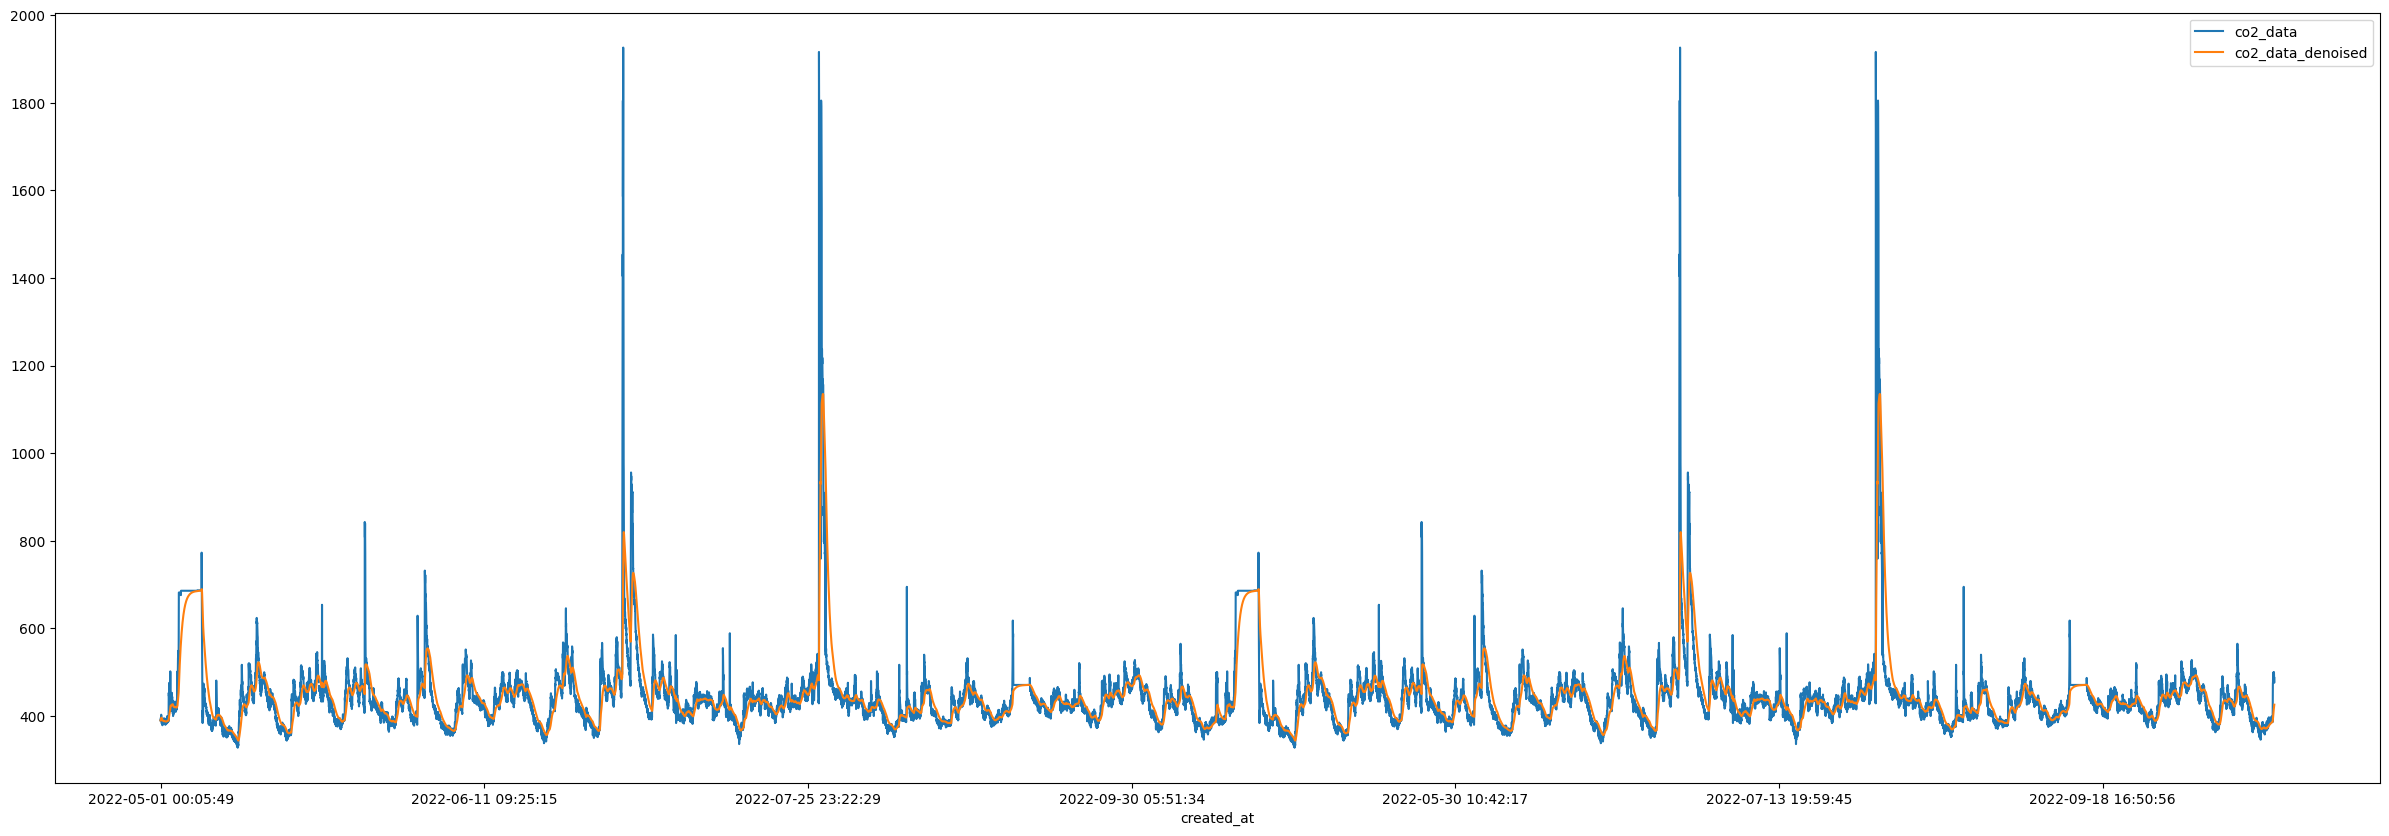

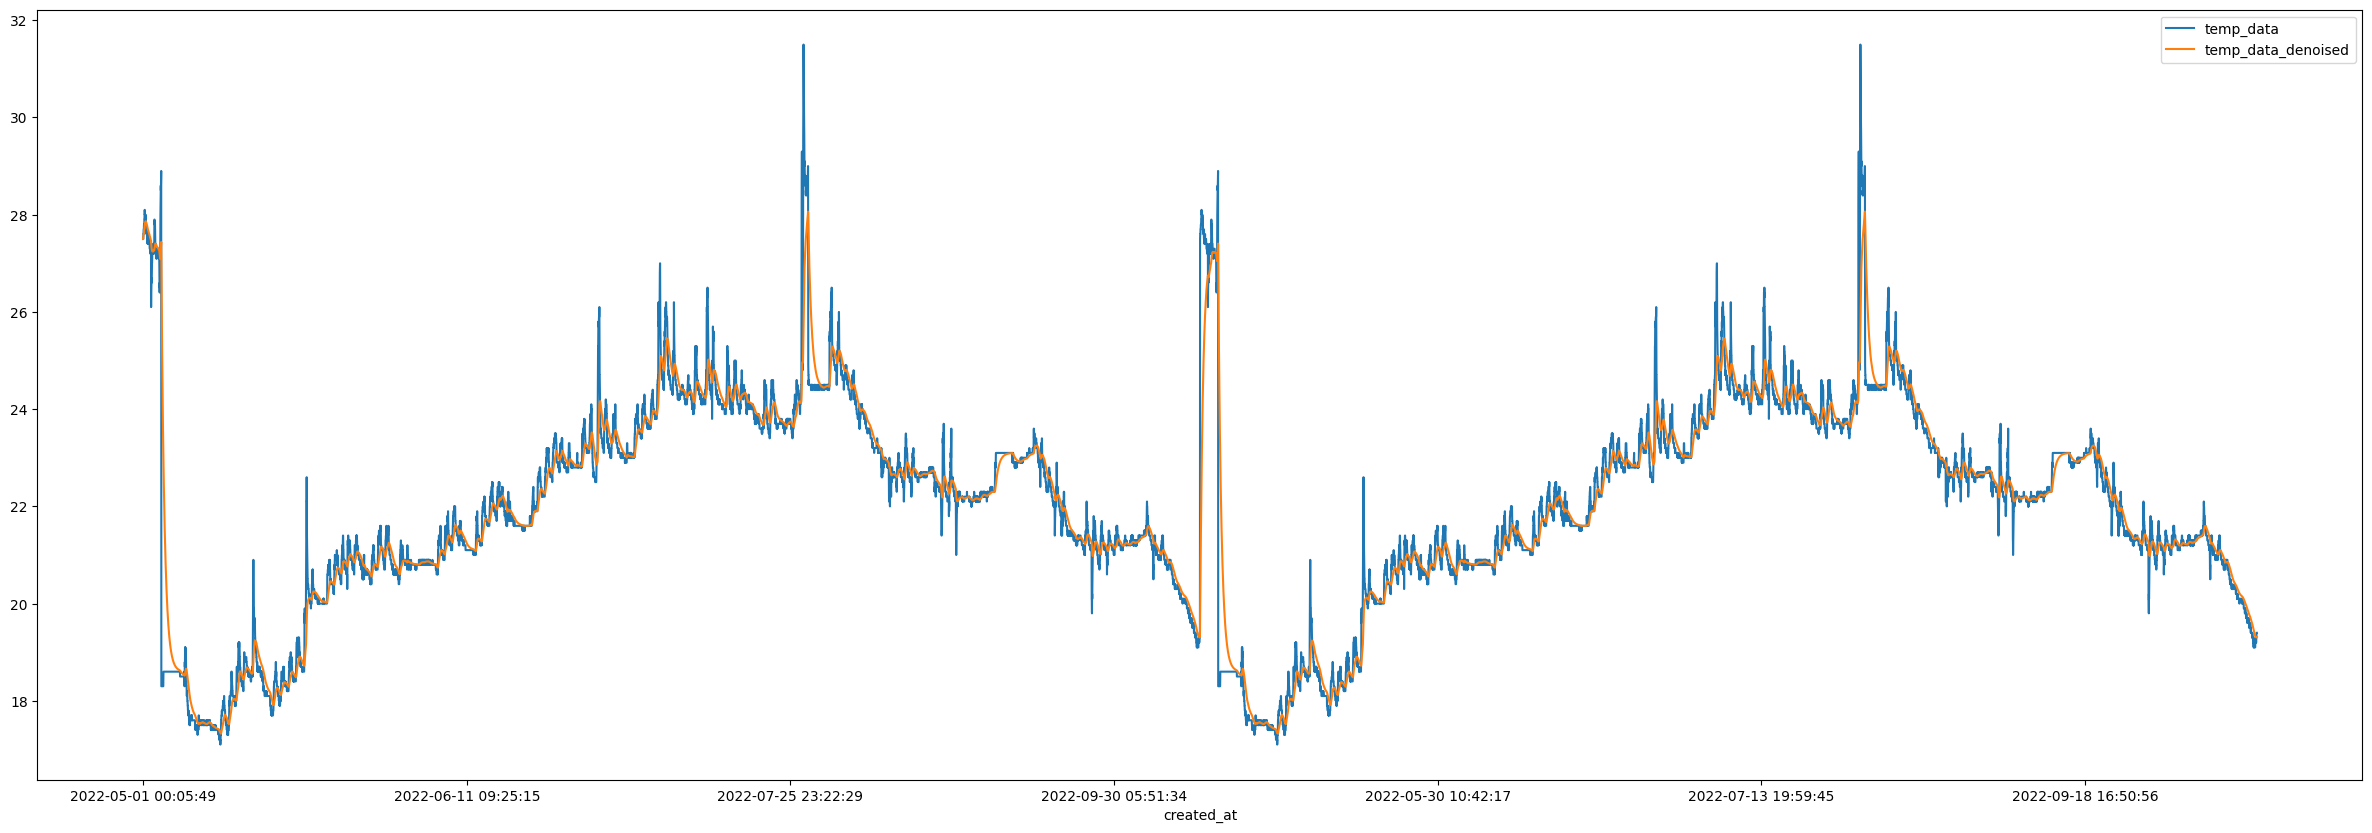

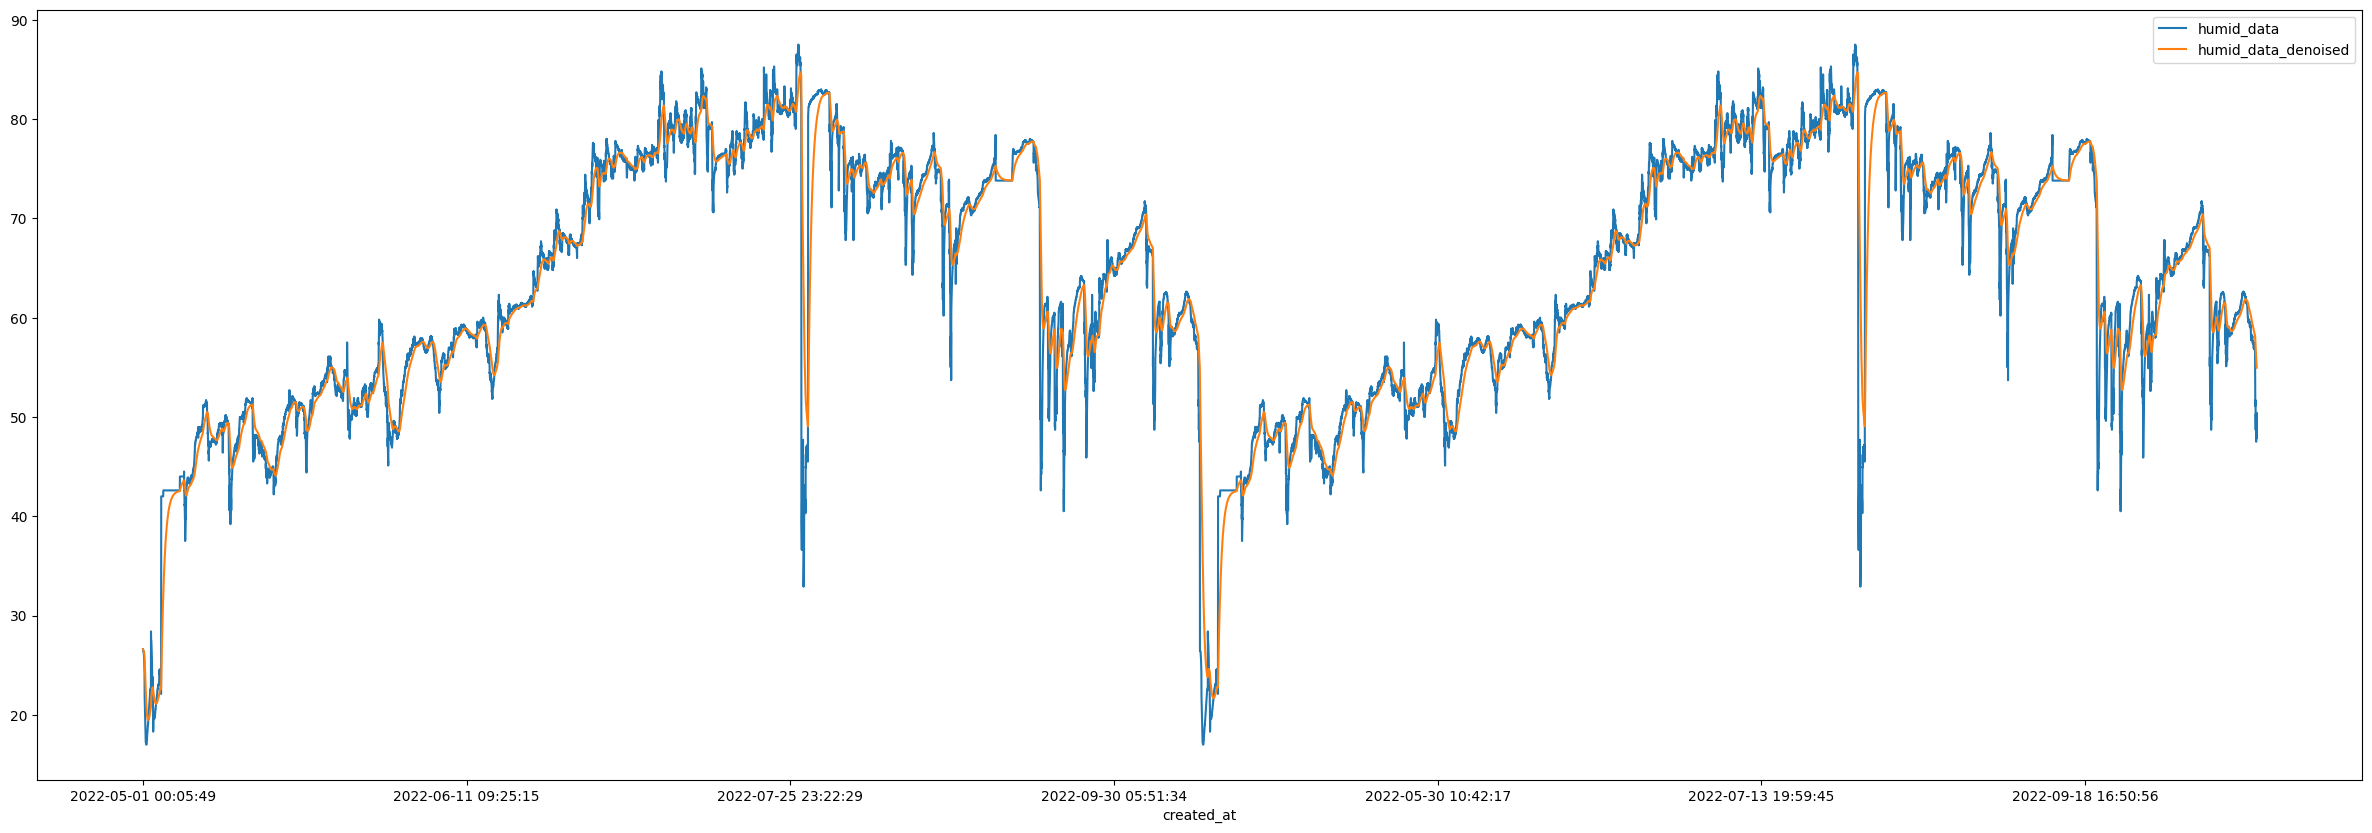

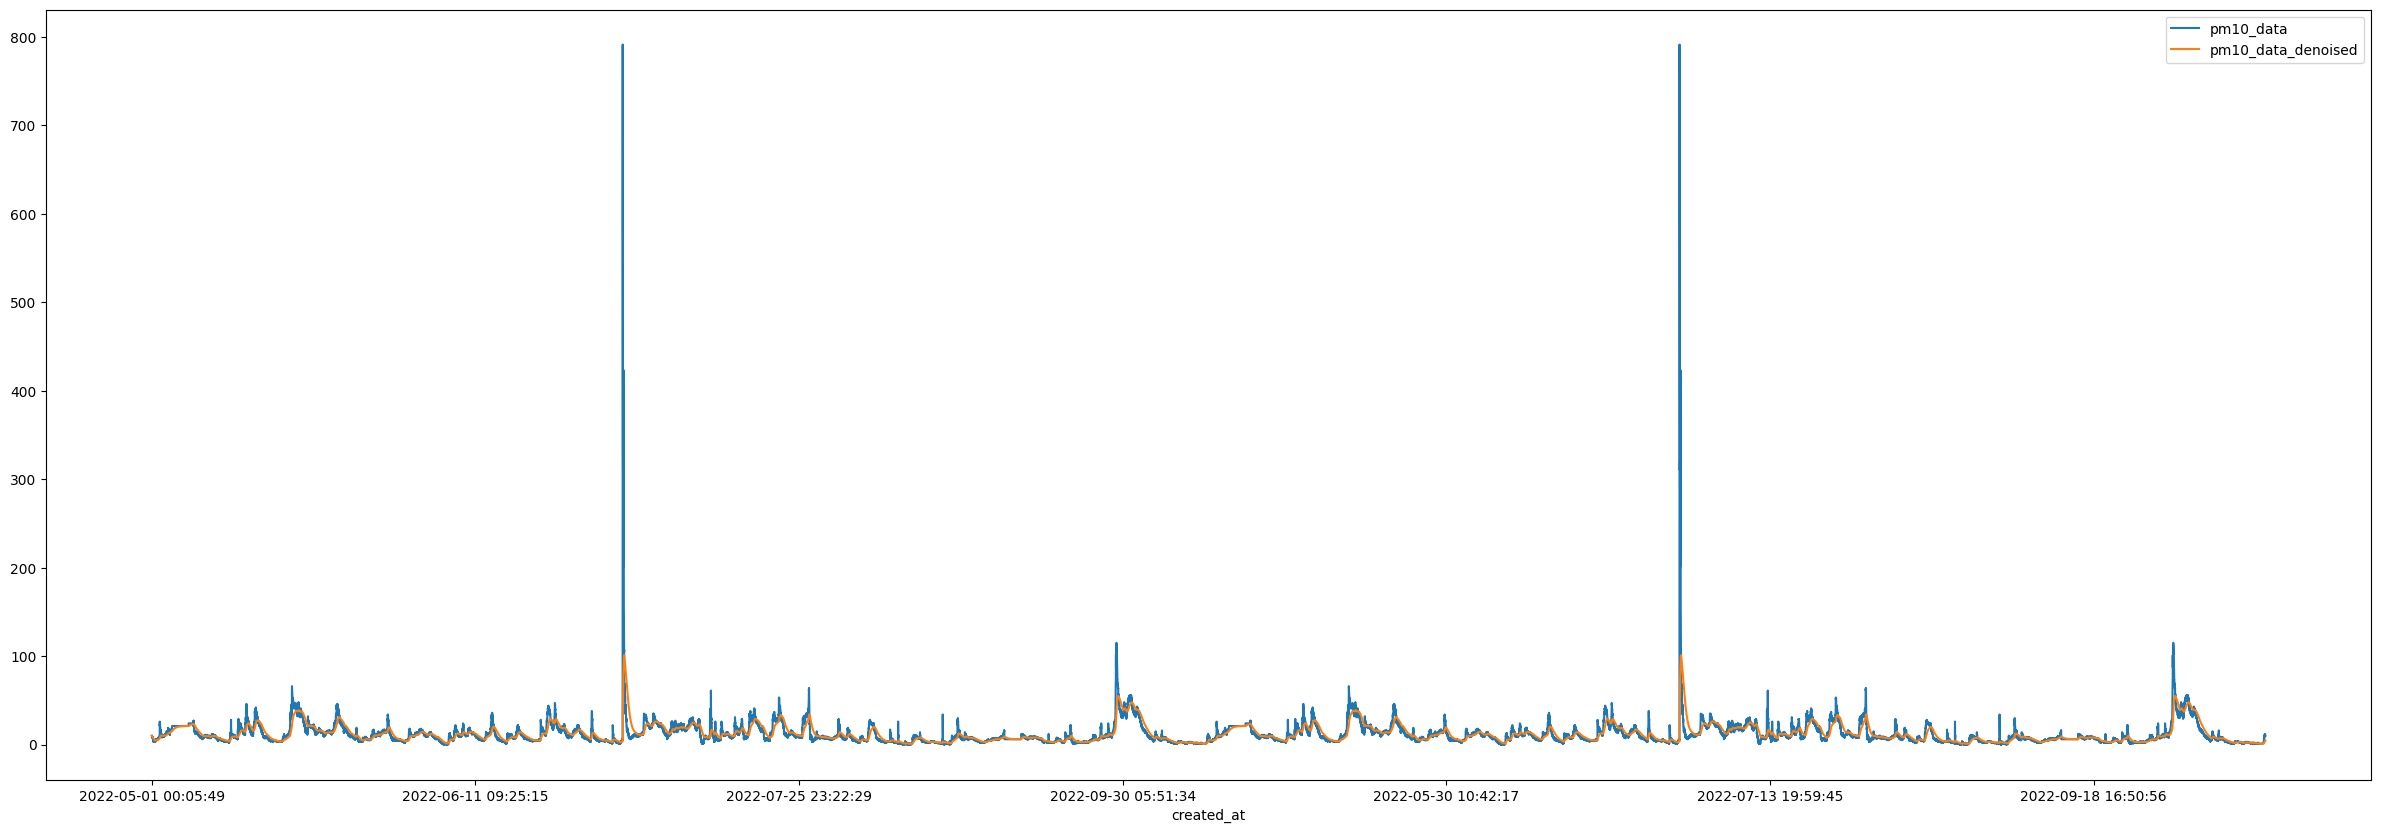

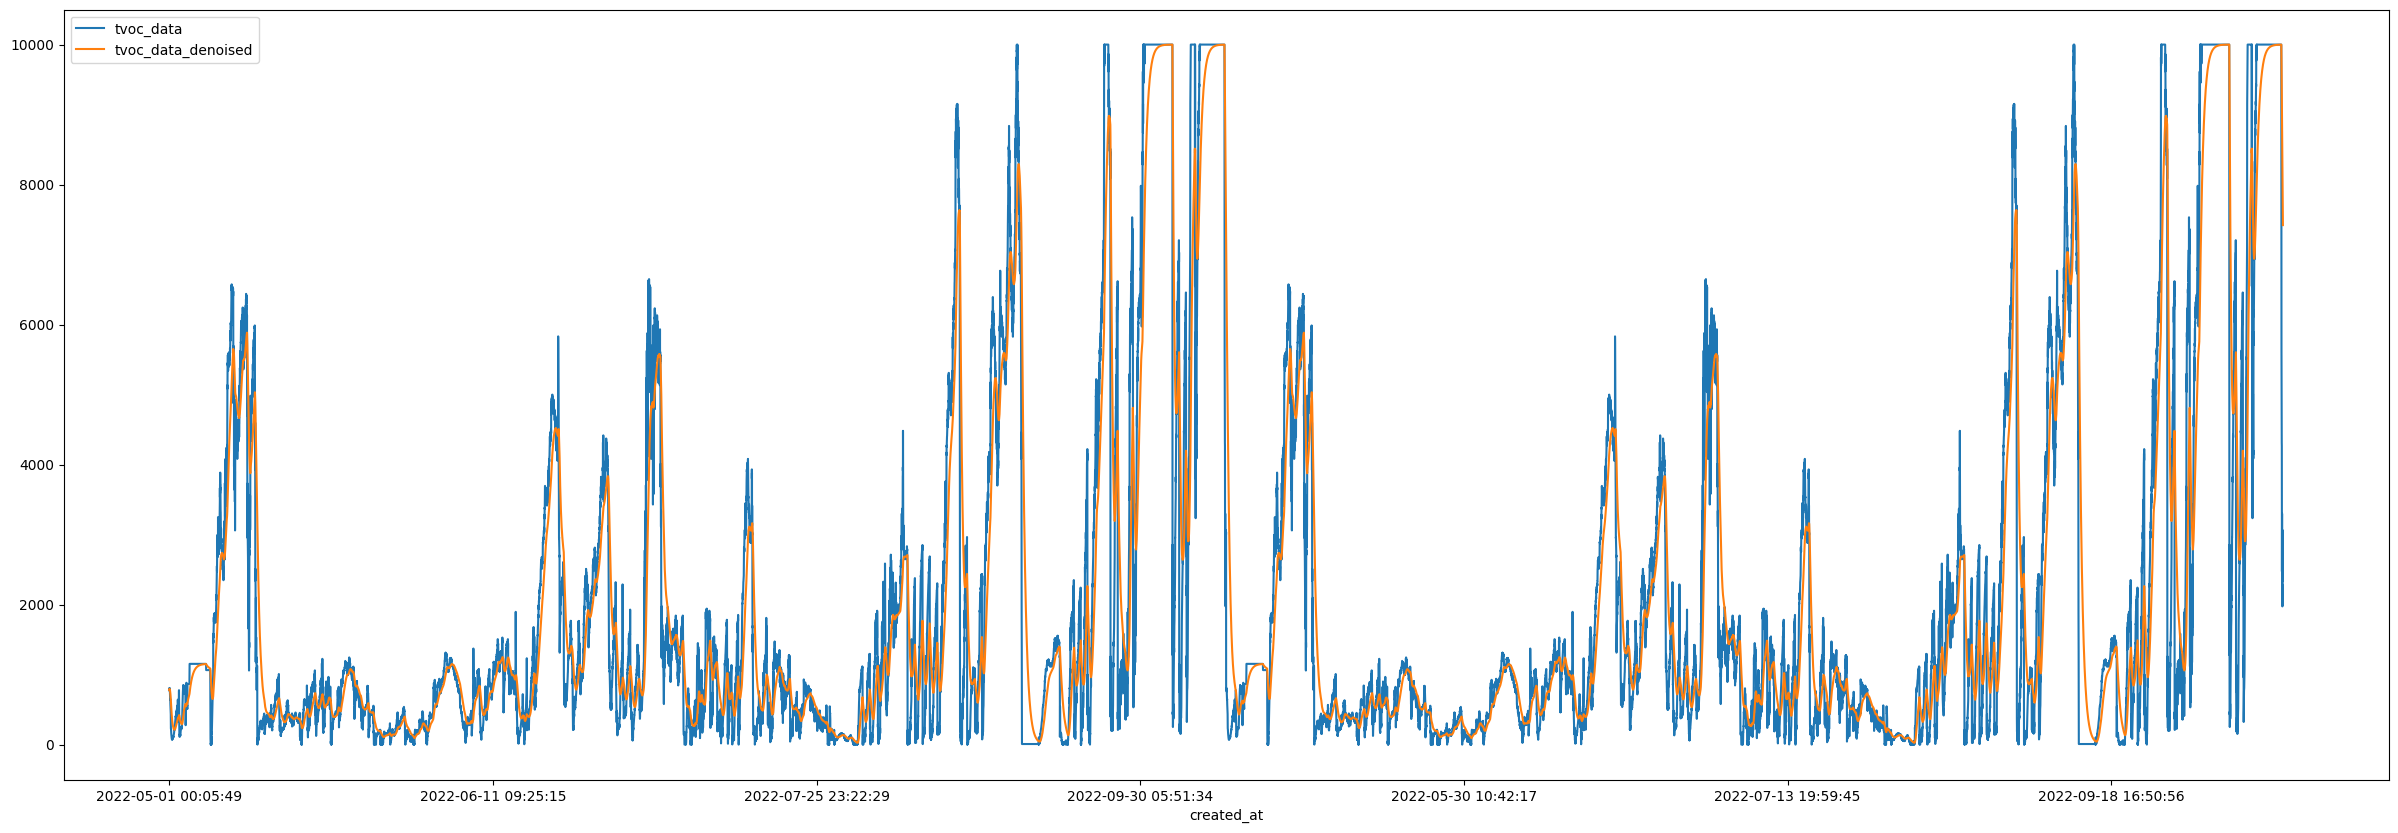

In [243]:
# denoise
for name in data_column_list:
    ema = pd.DataFrame(origin_df_copy[name]).ewm(com).mean()
    ema_df[name+'_denoised'] = ema[name]
    ema_df.plot(y=[name, name+'_denoised'], figsize=(30,10))

In [244]:
denoised_column_list = []
for e in data_col_list:
    denoised_column_list.append(e+'_denoised')
denoised_column_list

['co2_data_denoised',
 'temp_data_denoised',
 'humid_data_denoised',
 'pm10_data_denoised',
 'tvoc_data_denoised']

In [245]:
cor_dict = {}
for i in range(0, len(denoised_column_list)):
    cor_dict[denoised_column_list[i]] = {}

In [246]:
for i in range(0, len(denoised_column_list)):
    for j in range(i+1, len(denoised_column_list)):
        cor = pearsonr(ema_df[denoised_column_list[i]],ema_df[denoised_column_list[j]])[0]
        cor_dict[denoised_column_list[i]][denoised_column_list[j]] = cor
        cor_dict[denoised_column_list[j]][denoised_column_list[i]] = cor
        
print(cor_dict)        

{'co2_data_denoised': {'temp_data_denoised': 0.12576718478146198, 'humid_data_denoised': -0.07505176750549004, 'pm10_data_denoised': 0.3454798572653068, 'tvoc_data_denoised': -0.2360609771526792}, 'temp_data_denoised': {'co2_data_denoised': 0.12576718478146198, 'humid_data_denoised': 0.5963101426445079, 'pm10_data_denoised': -0.022234353063998992, 'tvoc_data_denoised': -0.2276550728251503}, 'humid_data_denoised': {'co2_data_denoised': -0.07505176750549004, 'temp_data_denoised': 0.5963101426445079, 'pm10_data_denoised': 0.04184364093972079, 'tvoc_data_denoised': 0.04209754062231125}, 'pm10_data_denoised': {'co2_data_denoised': 0.3454798572653068, 'temp_data_denoised': -0.022234353063998992, 'humid_data_denoised': 0.04184364093972079, 'tvoc_data_denoised': -0.05861180101256864}, 'tvoc_data_denoised': {'co2_data_denoised': -0.2360609771526792, 'temp_data_denoised': -0.2276550728251503, 'humid_data_denoised': 0.04209754062231125, 'pm10_data_denoised': -0.05861180101256864}}


In [247]:
# curr_col_denoised = 'co2_data_denoised'
# curr_col = 'co2_data'
# lim = 0.3
# curr_dict = cor_dict[curr_col_denoised]
# train_col = []
# train_col.append(curr_col_denoised)
# for key in curr_dict:
#     if(abs(curr_dict[key])>lim):
#         train_col.append(key)
# train_col

In [269]:
train_df = ema_df[train_col]
train_df

,pm10_data_denoised,co2_data_denoised
created_at,,
2022-05-01 00:05:49,10.000000,390.000000
2022-05-01 00:15:49,9.495050,390.000000
2022-05-01 00:25:49,9.326755,389.660044
2022-05-01 00:35:49,9.242624,391.292420
2022-05-01 00:45:49,9.192158,391.023599
...,...,...
2022-10-11 13:24:55,4.054108,421.460973
2022-10-11 13:34:55,4.190302,422.589189
2022-10-11 13:44:55,4.323825,423.695283


In [272]:
test = ema_df.iloc[2444:2445,:]
test.index

Index(['2022-05-19 15:48:43'], dtype='object', name='created_at')

In [249]:
# forecasting_model = VAR(train_df)
# results = forecasting_model.fit(2000)
# results.summary()

In [250]:
# forecast_dict = {}
# for idx in null_index_dict[curr_col]:
#     y = train_df.values[idx-2000:idx]
#     forecast = pd.DataFrame(results.forecast(y = y, steps=1), index = test.index, columns= [train_col])
#     forecast_dict[idx] = float(forecast['co2_data_denoised'].iloc[0])
# forecast_dict


In [251]:
res_df = origin_df.copy()

In [252]:
# for idx in forecast_dict:
#     res_df.loc[idx, curr_col] = forecast_dict[idx]      
# res_df.iloc[na_index]

In [253]:
# origin_df.iloc[na_index]

In [273]:
def forecast(curr_col):
    lim = 0.3
    ar = 100
    curr_col_denoised = curr_col+'_denoised'
    curr_dict = cor_dict[curr_col_denoised]
    train_col = []
    train_col.append(curr_col_denoised)
    print(curr_dict)
    for key in curr_dict:
        if(abs(curr_dict[key])>lim):
            train_col.append(key)
    print(train_col)
    train_df = ema_df[train_col]
    forecasting_model = VAR(train_df)
    results = forecasting_model.fit(ar)
    return_dict = {}
    return_dict[curr_col] = {}
    for idx in null_index_dict[curr_col]:
        if(idx < ar):
            return_dict[curr_col][idx] = ema_df.loc[idx, curr_col_denoised]
            break
        y = train_df.values[idx-ar:idx]
        test = ema_df.iloc[idx:idx+1,:]
        forecast_res = pd.DataFrame(results.forecast(y = y, steps=1), index = list(test[idx_col_name]), columns= [train_col])
#         return_dict[curr_col][idx] = float(forecast_res[curr_col_denoised].iloc[0])
        res_df.loc[idx, curr_col] = float(forecast_res[curr_col_denoised].iloc[0]) 
#     return return_dict
    

In [274]:
# import multiprocessing
# if __name__ == '__main__':
#     pool = multiprocessing.Pool(processes= len(null_index_dict))
#     res = pool.map(forecast, null_index_dict)
#     pool.close()
#     pool.join()
# print(res)
# # res_df.iloc[na_index]

In [275]:
for curr_col in null_index_dict:
    forecast(curr_col)

{'temp_data_denoised': 0.12576718478146198, 'humid_data_denoised': -0.07505176750549004, 'pm10_data_denoised': 0.3454798572653068, 'tvoc_data_denoised': -0.2360609771526792}
['co2_data_denoised', 'pm10_data_denoised']


/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'co2_data_denoised': 0.12576718478146198, 'humid_data_denoised': 0.5963101426445079, 'pm10_data_denoised': -0.022234353063998992, 'tvoc_data_denoised': -0.2276550728251503}
['temp_data_denoised', 'humid_data_denoised']


/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'co2_data_denoised': -0.07505176750549004, 'temp_data_denoised': 0.5963101426445079, 'pm10_data_denoised': 0.04184364093972079, 'tvoc_data_denoised': 0.04209754062231125}
['humid_data_denoised', 'temp_data_denoised']


/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'co2_data_denoised': 0.3454798572653068, 'temp_data_denoised': -0.022234353063998992, 'humid_data_denoised': 0.04184364093972079, 'tvoc_data_denoised': -0.05861180101256864}
['pm10_data_denoised', 'co2_data_denoised']


/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [224]:
for d in res:
    for key in d:
        for idx in d[key]:
            res_df.loc[idx, key] = d[key][idx]    

In [276]:
res_df.iloc[na_index]

,co2_data,humid_data,created_at,pm10_data,tvoc_data,temp_data
2444,490.798105,51.300000,2022-05-19 15:48:43,22.000000,713.0,18.700000
3005,511.000000,53.490107,2022-05-24 12:01:42,19.000000,463.0,20.900000
3135,426.000000,54.500000,2022-05-25 19:31:39,9.689163,478.0,20.700000
3459,397.000000,50.600000,2022-05-28 15:01:49,9.000000,150.0,20.697606
3645,392.881394,58.700000,2022-05-30 04:52:14,34.000000,60.0,21.500000
18771,490.798105,51.300000,2022-05-19 15:48:43,22.000000,713.0,18.700000
19332,511.000000,53.490107,2022-05-24 12:01:42,19.000000,463.0,20.900000
19462,426.000000,54.500000,2022-05-25 19:31:39,9.689163,478.0,20.700000
19786,397.000000,50.600000,2022-05-28 15:01:49,9.000000,150.0,20.697606
19972,392.881394,58.700000,2022-05-30 04:52:14,34.000000,60.0,21.500000


In [4]:
origin_df


,co2_data,humid_data,created_at,pm10_data,tvoc_data,temp_data
0,390.0,26.6,2022-05-01 00:05:49,10.0,780.0,27.5
1,390.0,26.5,2022-05-01 00:15:49,9.0,785.0,27.5
2,389.0,26.5,2022-05-01 00:25:49,9.0,805.0,27.6
3,396.0,26.4,2022-05-01 00:35:49,9.0,808.0,27.6
4,390.0,26.4,2022-05-01 00:45:49,9.0,793.0,27.6
...,...,...,...,...,...,...
32649,488.0,48.0,2022-10-11 13:24:55,11.0,2344.0,19.4
32650,479.0,47.8,2022-10-11 13:34:55,11.0,2337.0,19.4
32651,479.0,50.3,2022-10-11 13:44:55,11.0,3061.0,19.4
32652,476.0,50.4,2022-10-11 13:54:55,11.0,2999.0,19.4


In [6]:
 num_type_col = column_df.where(column_df['type'] == 'DOUBLE').dropna()

In [7]:
num_type_col

,name,type
1,co2_data,DOUBLE
2,temp_data,DOUBLE
3,humid_data,DOUBLE
4,pm10_data,DOUBLE
5,tvoc_data,DOUBLE


In [8]:
data_col_list = list(num_type_col['name'])
data_col_list

['co2_data', 'temp_data', 'humid_data', 'pm10_data', 'tvoc_data']

In [15]:
std = origin_df.mean()

/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [16]:
std_dict = {}
for i in range(0, len(data_col_list)):
    std_dict[data_col_list[i]] = std[data_col_list[i]]
std_dict   

{'co2_data': 445.9614701378254,
 'temp_data': 22.005671934337865,
 'humid_data': 63.90823839274776,
 'pm10_data': 12.30754624525297,
 'tvoc_data': 2096.35015618301}